<a href="https://colab.research.google.com/github/larissavaladao/py6s_harmonize_sample/blob/main/manage_data/data_analysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importar pacotes

In [1]:
import pandas as pd
import seaborn as sns

# Importar dados

In [37]:
df_ld8 = pd.read_csv('C:/Users/l_v_v/Documents/GitHub/py6s_harmonize_sample/datasets/Landsat Sampling/Merged Landsat Data/merge_LD8prio_data.csv').drop(['Unnamed: 0'],axis=1)

In [38]:
df_ld8.dtypes

CHLOROPHYLL           float64
CHLOROPHYLL_A         float64
CHLOROPHYLL_B          object
CLOUD_COVER           float64
DEPTH_CLASS             int64
DOC                   float64
ID                      int64
LATITUDE              float64
LOCATION               object
LONGITUDE             float64
MISSION                object
N_TOTAL               float64
N_TOTAL_DISSOLVED     float64
POC                    object
P_ORGANIC              object
P_TOTAL               float64
SAMPLE_SITE             int64
SAMPLING_DEPTH        float64
SILICA                float64
SPM                   float64
TOC                   float64
TOTAL_DEPTH           float64
TURBIDITY              object
WATER_PERIOD           object
blue_max              float64
blue_mean             float64
blue_median           float64
blue_min              float64
blue_stdDev           float64
count_pixel             int64
datetime               object
dif_date_point        float64
green_max             float64
green_mean

In [39]:
df_minDate = pd.read_csv('C:/Users/l_v_v/Documents/GitHub/py6s_harmonize_sample/datasets/Landsat Sampling/Merged Landsat Data/merge_min_data.csv').drop(['Unnamed: 0'],axis=1)

In [53]:
df_minDate.dtypes

CHLOROPHYLL           float64
CHLOROPHYLL_A         float64
CHLOROPHYLL_B         float64
CLOUD_COVER           float64
DEPTH_CLASS             int64
DOC                   float64
ID                      int64
LATITUDE              float64
LOCATION               object
LONGITUDE             float64
MISSION                object
N_TOTAL               float64
N_TOTAL_DISSOLVED     float64
POC                   float64
P_ORGANIC             float64
P_TOTAL               float64
SAMPLE_SITE             int64
SAMPLING_DEPTH        float64
SILICA                float64
SPM                   float64
TOC                   float64
TOTAL_DEPTH           float64
TURBIDITY             float64
WATER_PERIOD           object
blue_max              float64
blue_mean             float64
blue_median           float64
blue_min              float64
blue_stdDev           float64
count_pixel             int64
datetime               object
dif_date_point        float64
green_max             float64
green_mean

In [51]:
df_minDate = df_minDate.replace(['< 0,01','< 0,001','< 0,0001','< LD'],0).copy()

df_ld8 = df_ld8.replace(['< 0,01','< 0,001','< 0,0001','< LD'],0).copy()


In [52]:
col_types = {'CHLOROPHYLL_B': 'float64',
 'POC': 'float64',
 'P_ORGANIC': 'float64',
 'P_TOTAL': 'float64',
 'TURBIDITY': 'float64'}
df_minDate = df_minDate.astype(col_types)
df_ld8 = df_ld8.astype(col_types)

# visualizar dados SPM

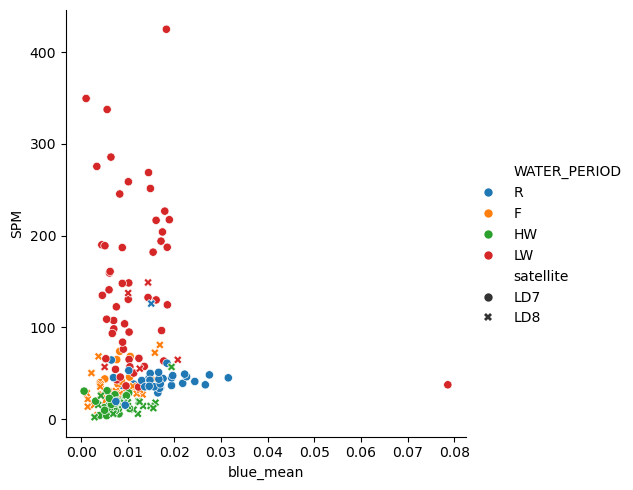

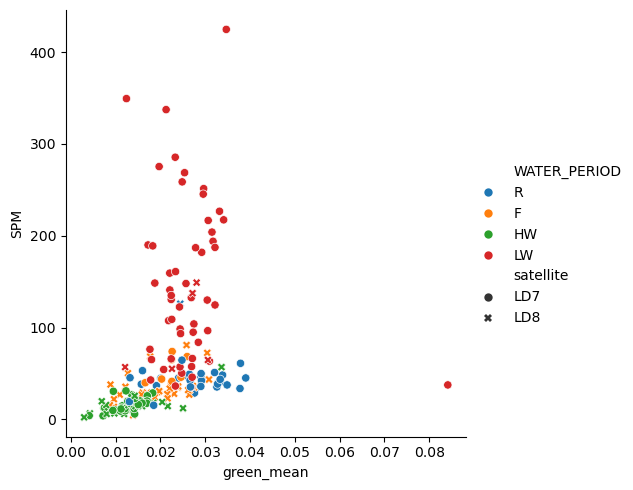

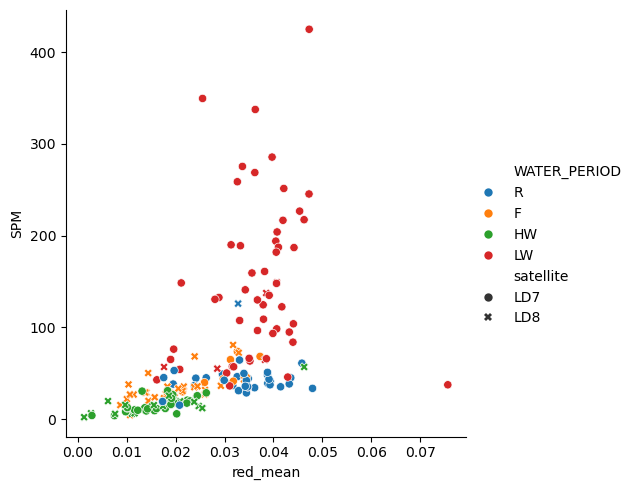

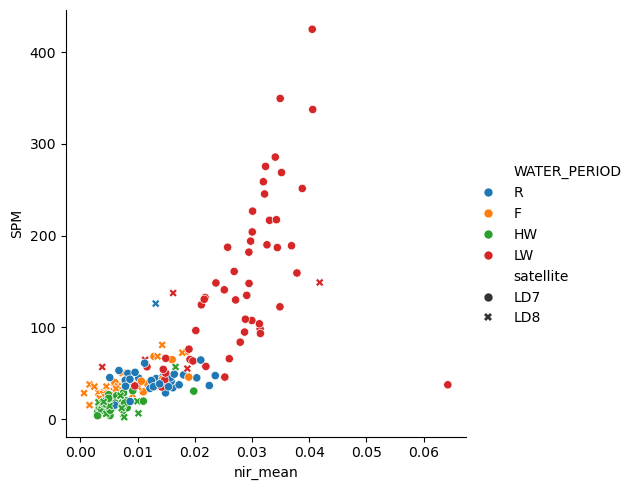

In [54]:
sns.relplot(data=df_minDate, x="blue_mean", y="SPM", hue="WATER_PERIOD", style='satellite')
sns.relplot(data=df_minDate, x="green_mean", y="SPM", hue="WATER_PERIOD", style='satellite')
sns.relplot(data=df_minDate, x="red_mean", y="SPM", hue="WATER_PERIOD", style='satellite')
sns.relplot(data=df_minDate, x="nir_mean", y="SPM", hue="WATER_PERIOD", style='satellite')

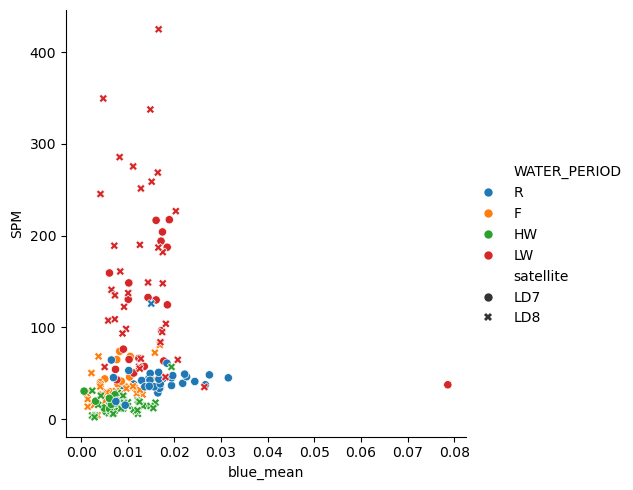

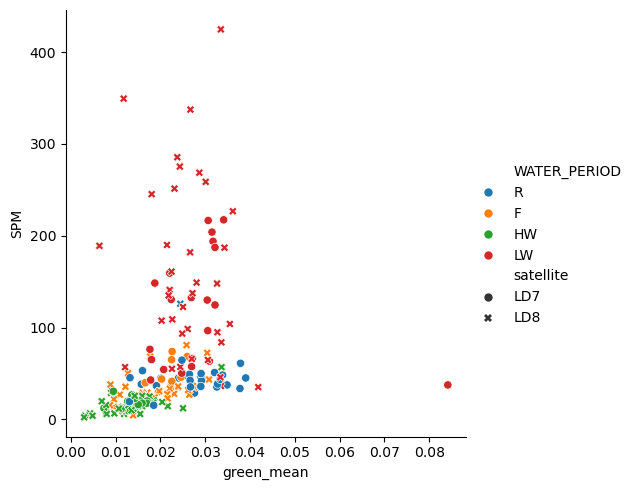

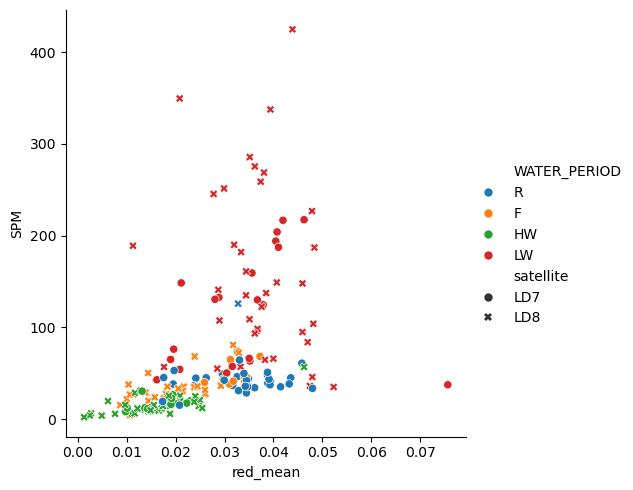

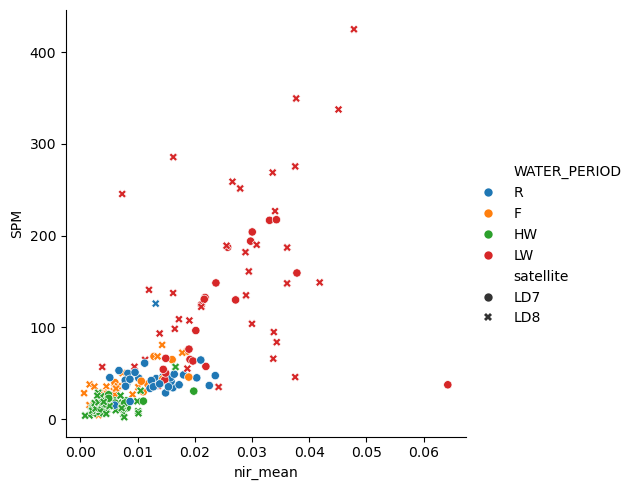

In [55]:
sns.relplot(data=df_ld8, x="blue_mean", y="SPM", hue="WATER_PERIOD", style='satellite')
sns.relplot(data=df_ld8, x="green_mean", y="SPM", hue="WATER_PERIOD", style='satellite')
sns.relplot(data=df_ld8, x="red_mean", y="SPM", hue="WATER_PERIOD", style='satellite')
sns.relplot(data=df_ld8, x="nir_mean", y="SPM", hue="WATER_PERIOD", style='satellite')

### retirar outlier

In [56]:
df_ld8_clean = df_ld8.loc[df_ld8['ID'] != 232].copy()
df_minDate_clean = df_minDate.loc[df_minDate['ID'] != 232].copy()

In [58]:
df_ld8_clean.to_csv('C:/Users/l_v_v/Documents/GitHub/py6s_harmonize_sample/datasets/Landsat Sampling/Merged Landsat Data/Drop Outlier Data/clean_LD8prio_data.csv')
df_minDate_clean.to_csv('C:/Users/l_v_v/Documents/GitHub/py6s_harmonize_sample/datasets/Landsat Sampling/Merged Landsat Data/Drop Outlier Data/clean_min_data.csv')

### visualizar distribuições e regressões SPM

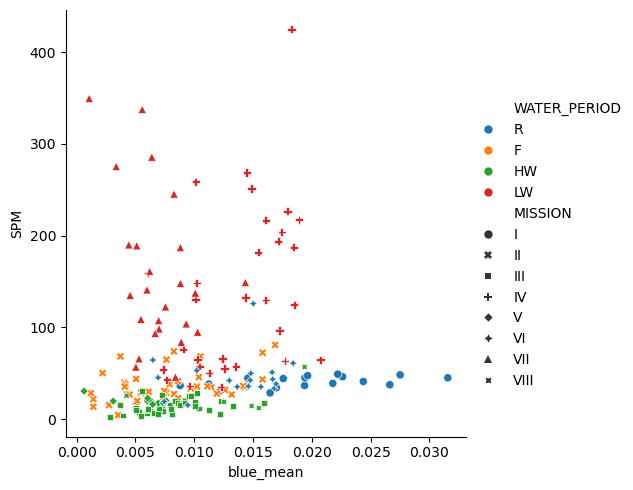

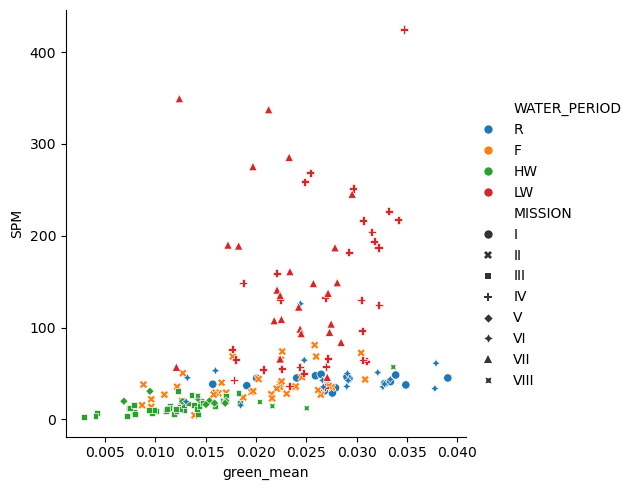

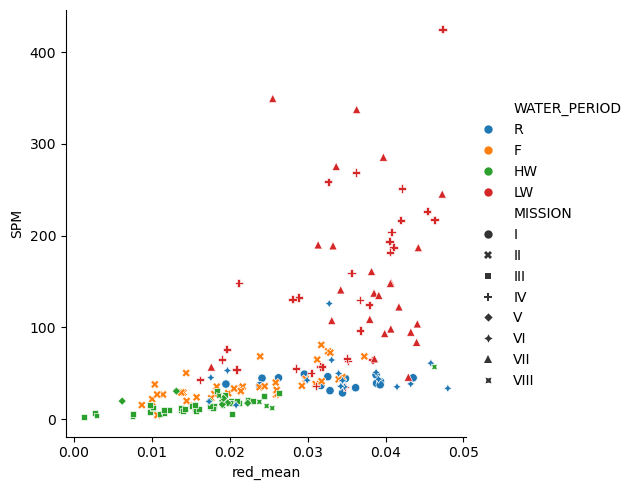

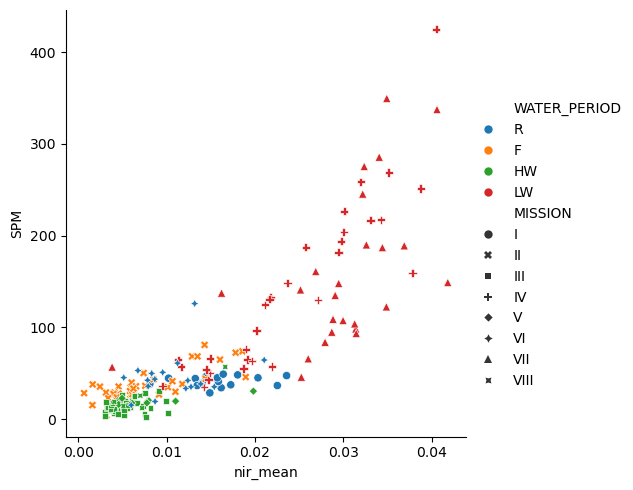

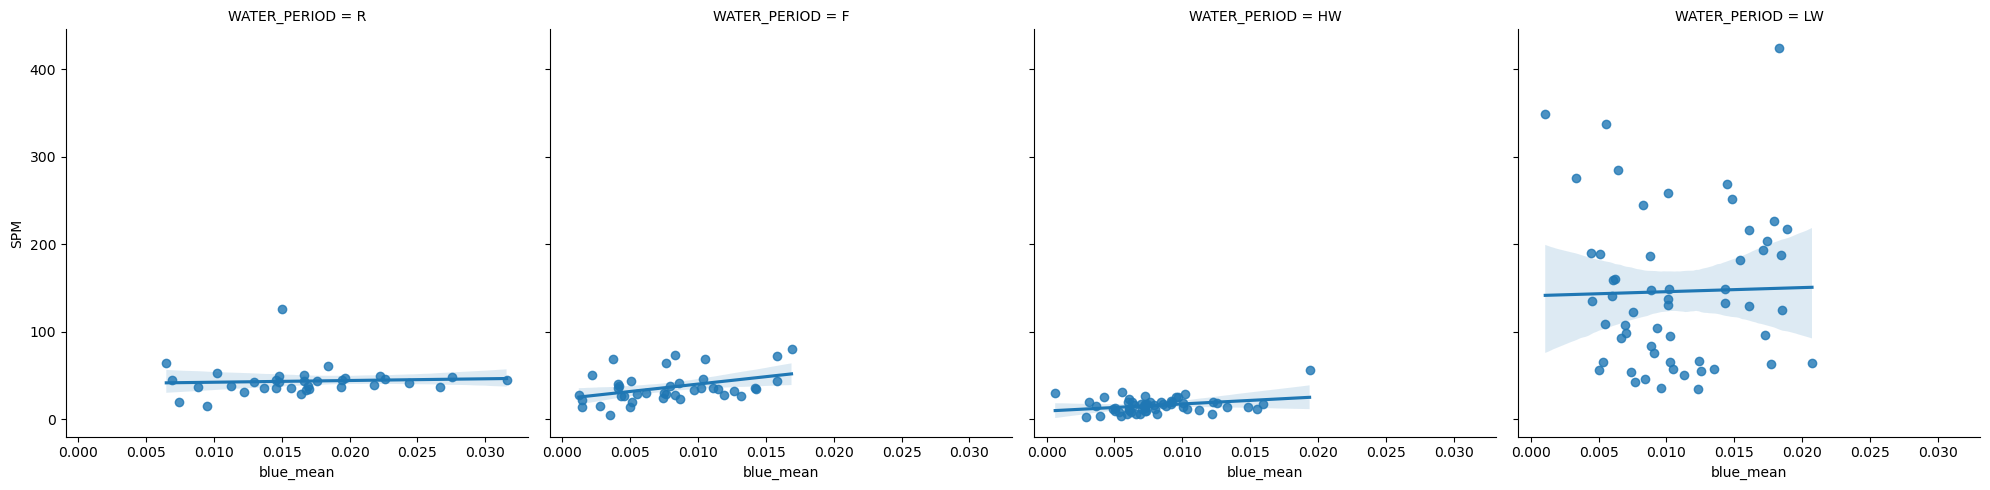

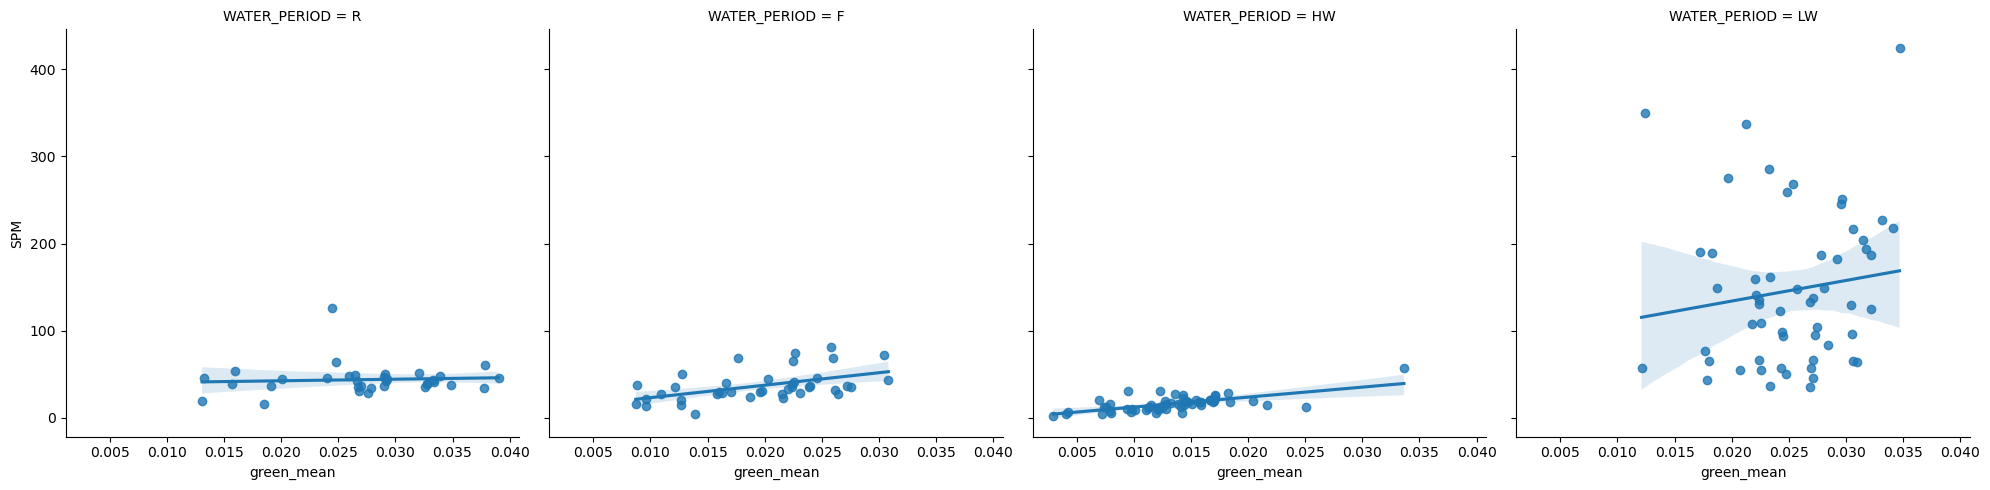

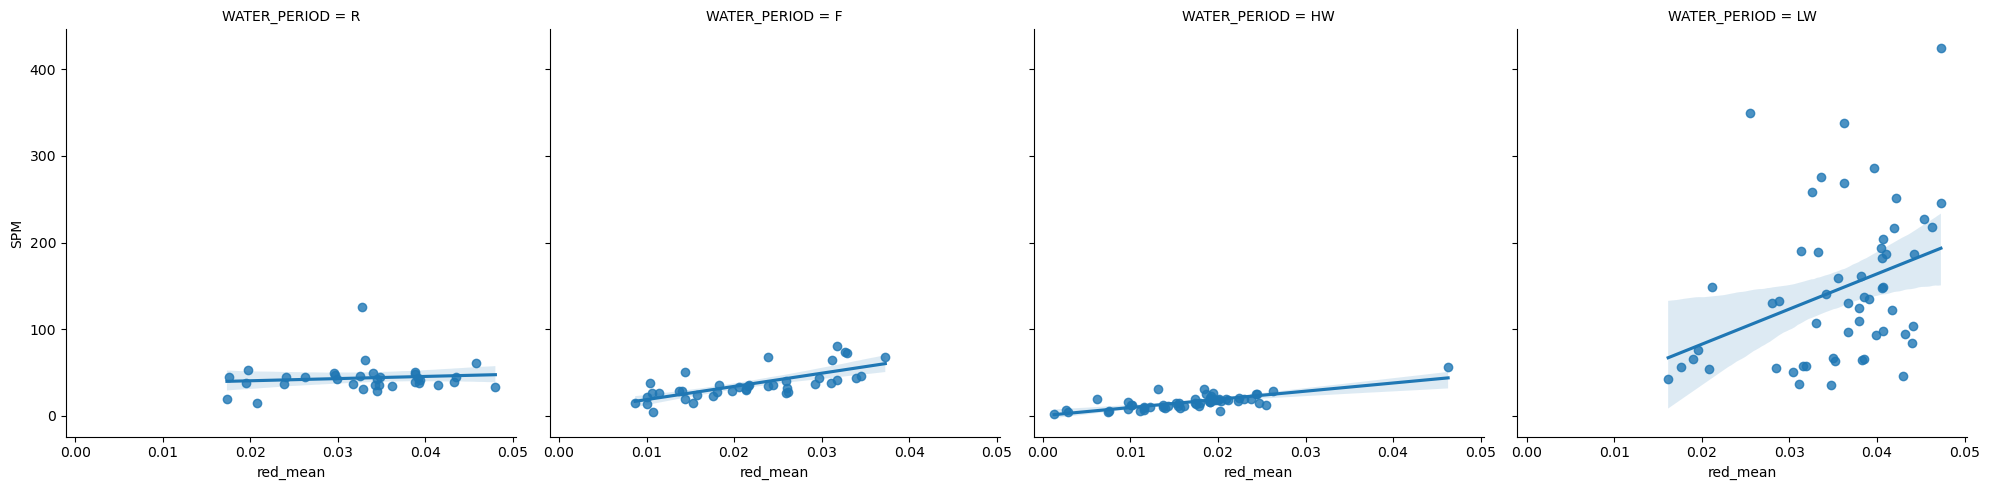

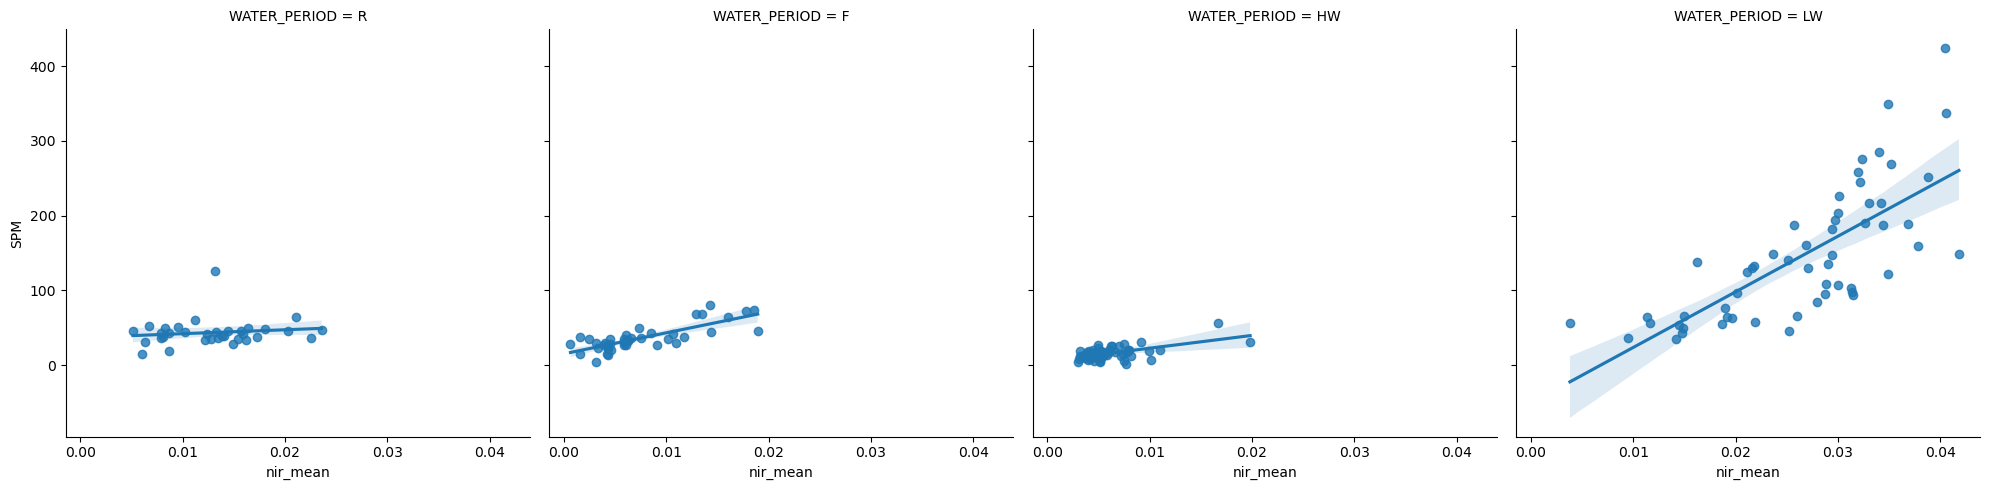

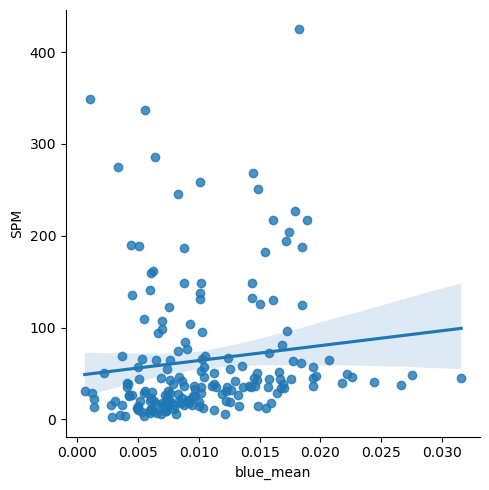

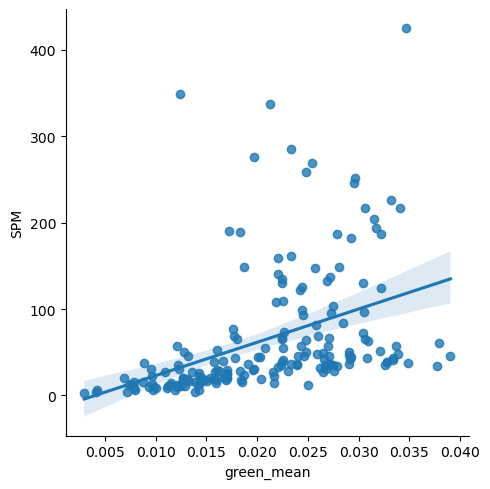

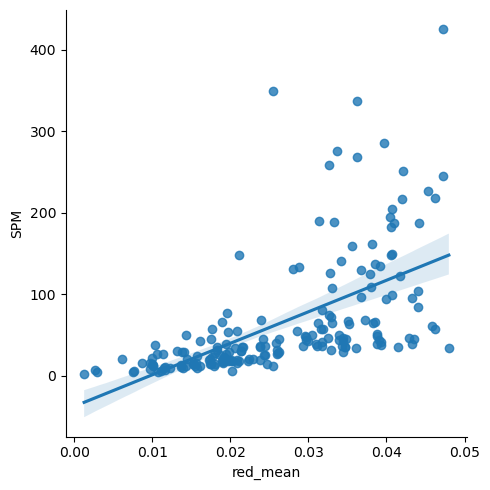

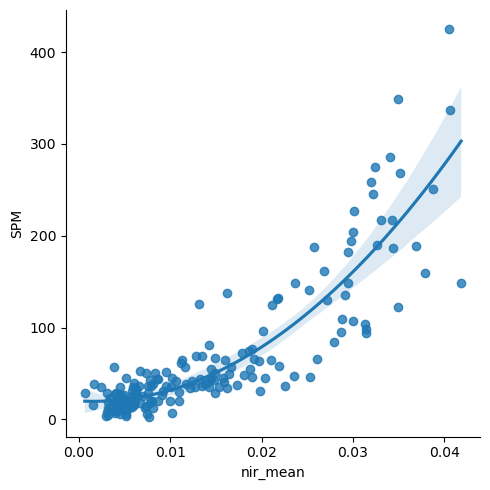

In [114]:
cols = ['SPM']

for i in cols:
    sns.relplot(data=df_minDate_clean, x="blue_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.relplot(data=df_minDate_clean, x="green_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.relplot(data=df_minDate_clean, x="red_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.relplot(data=df_minDate_clean, x="nir_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.lmplot(data=df_minDate_clean, x="blue_mean", y=i,order=1, col="WATER_PERIOD")
    sns.lmplot(data=df_minDate_clean, x="green_mean", y=i,order=1, col="WATER_PERIOD")
    sns.lmplot(data=df_minDate_clean, x="red_mean", y=i,order=1, col="WATER_PERIOD")
    sns.lmplot(data=df_minDate_clean, x="nir_mean", y=i,order=1, col="WATER_PERIOD")
    sns.lmplot(data=df_minDate_clean, x="blue_mean", y=i,order=1)
    sns.lmplot(data=df_minDate_clean, x="green_mean", y=i,order=1)
    sns.lmplot(data=df_minDate_clean, x="red_mean", y=i,order=1)
    sns.lmplot(data=df_minDate_clean, x="nir_mean", y=i,order=2 )

# Clorofila

c:\Users\l_v_v\anaconda3\envs\earth_engine\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


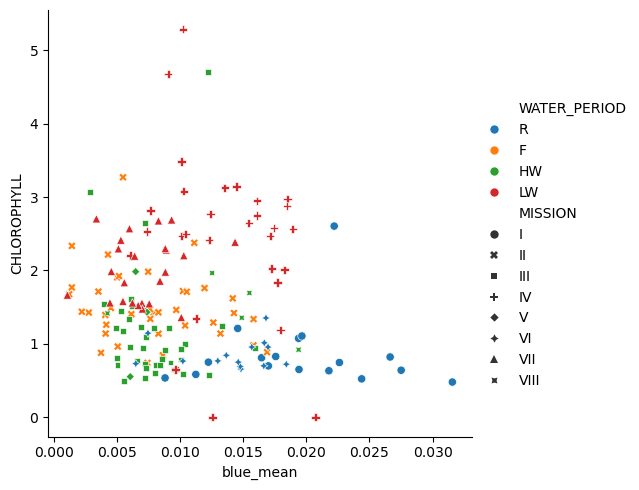

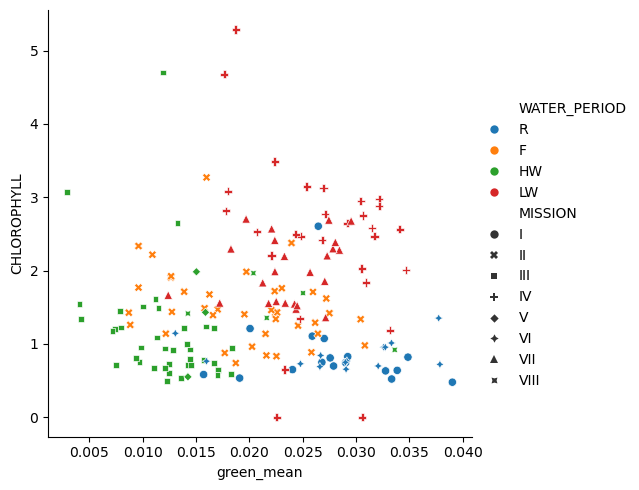

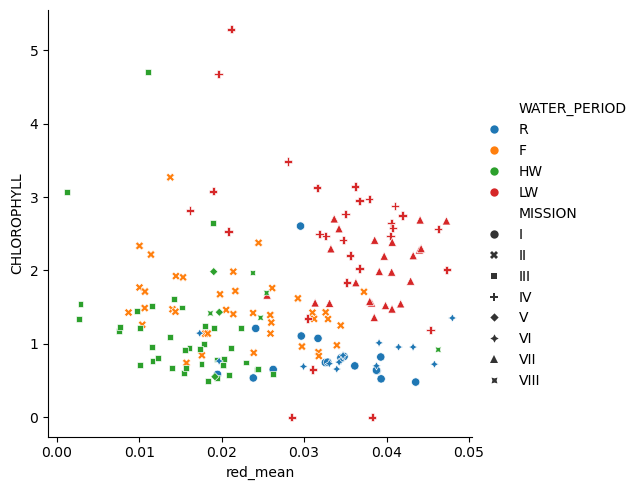

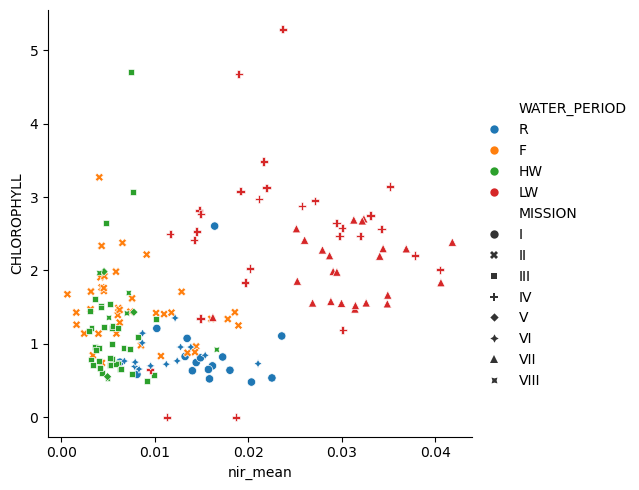

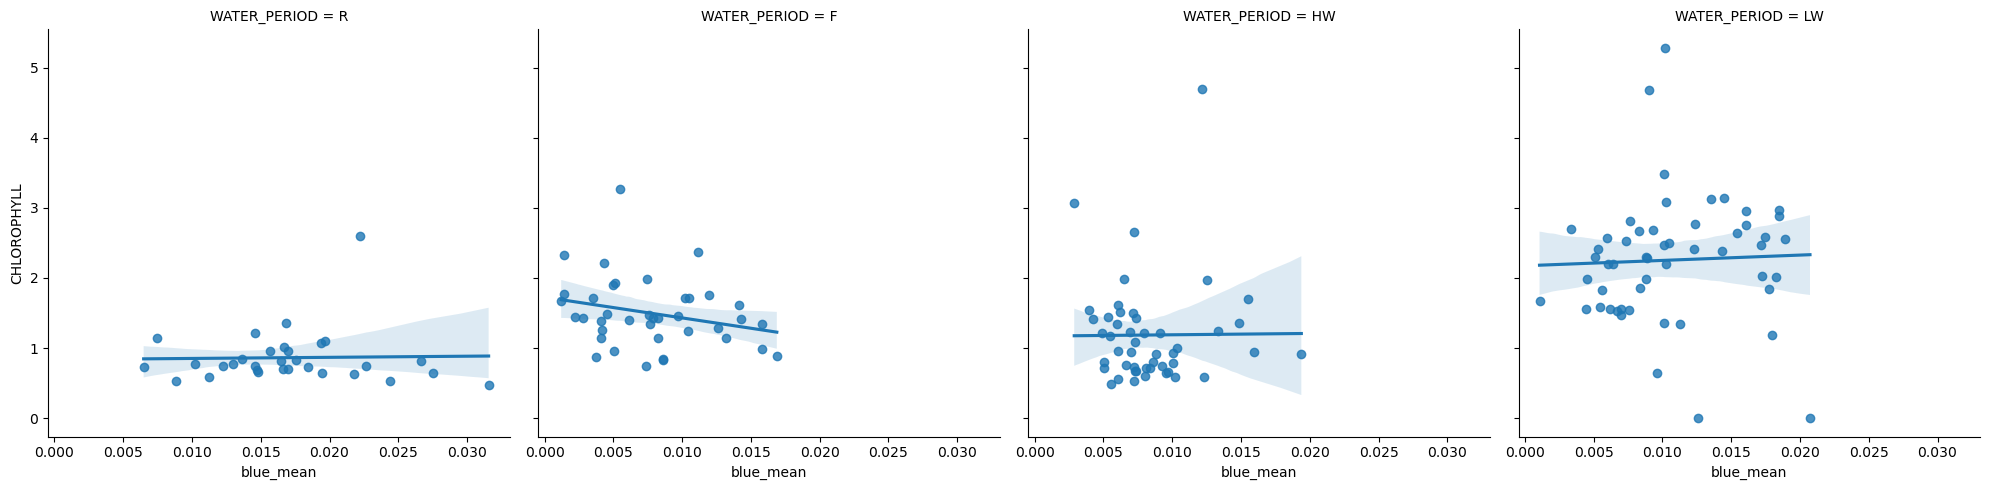

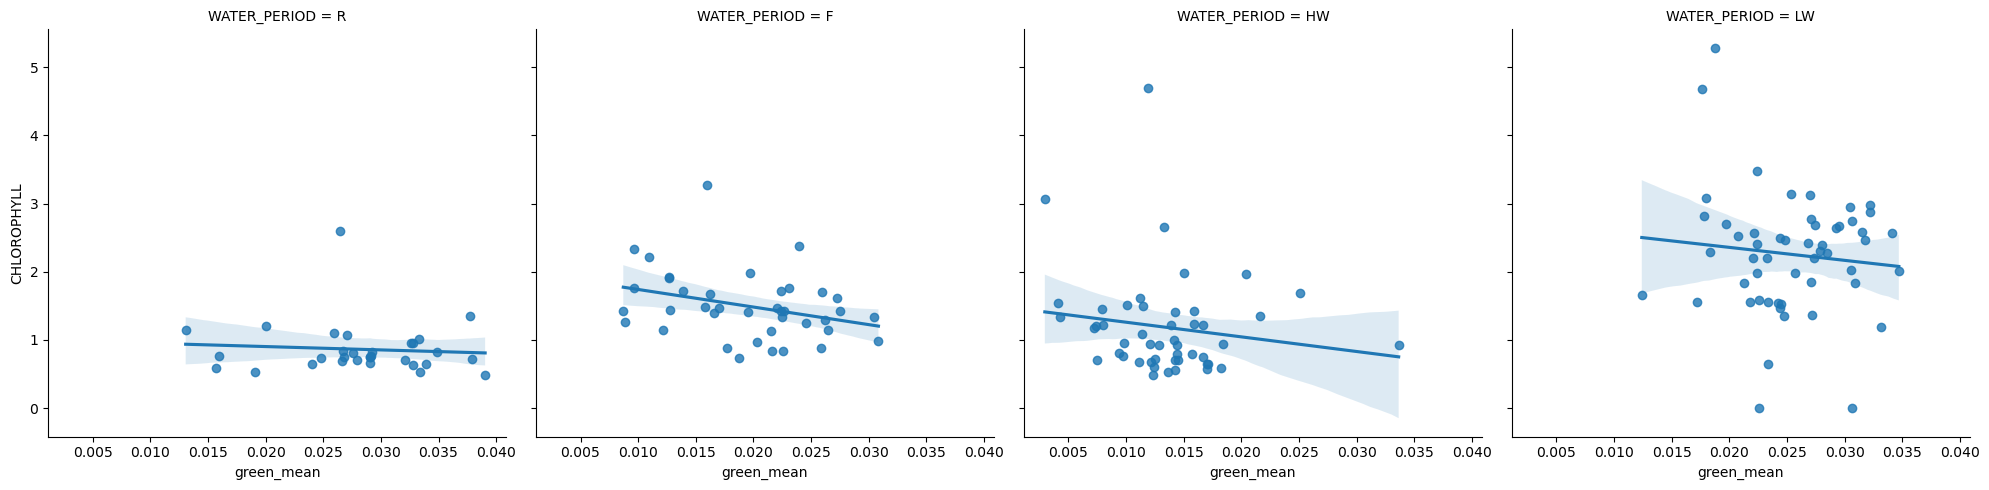

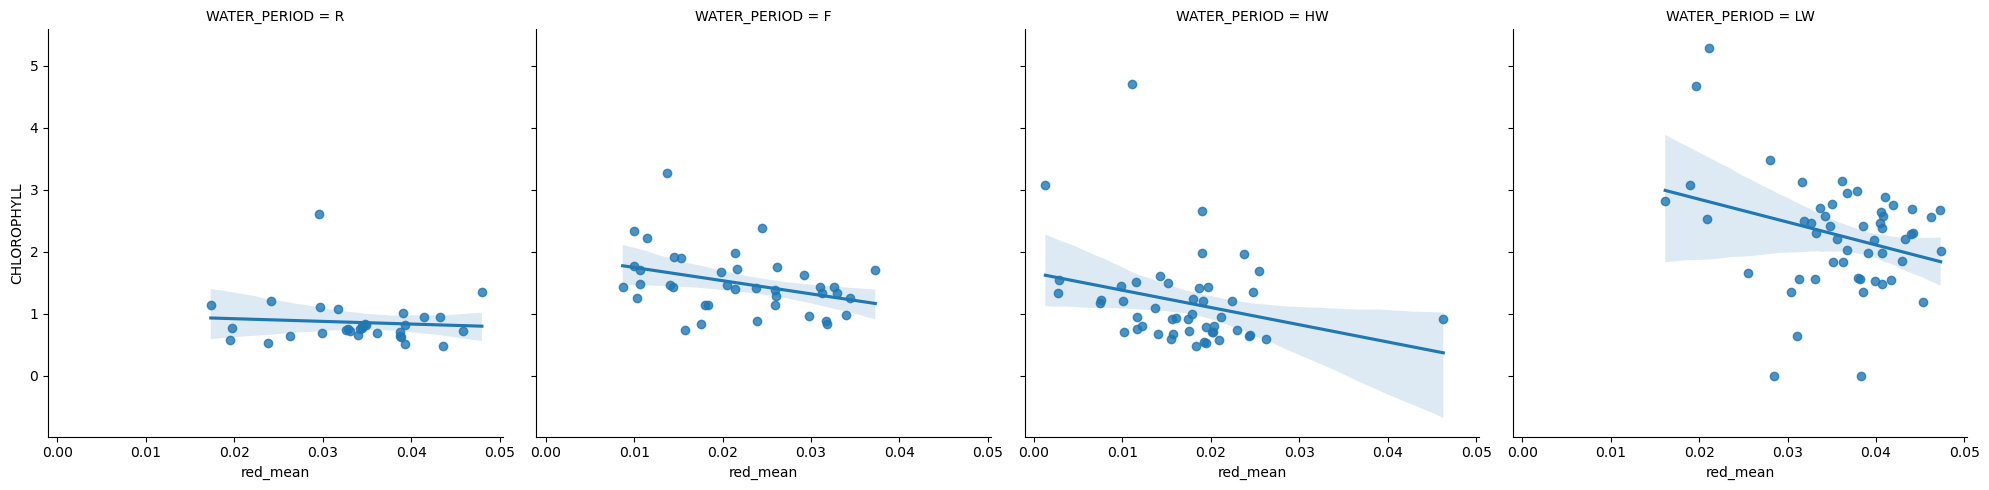

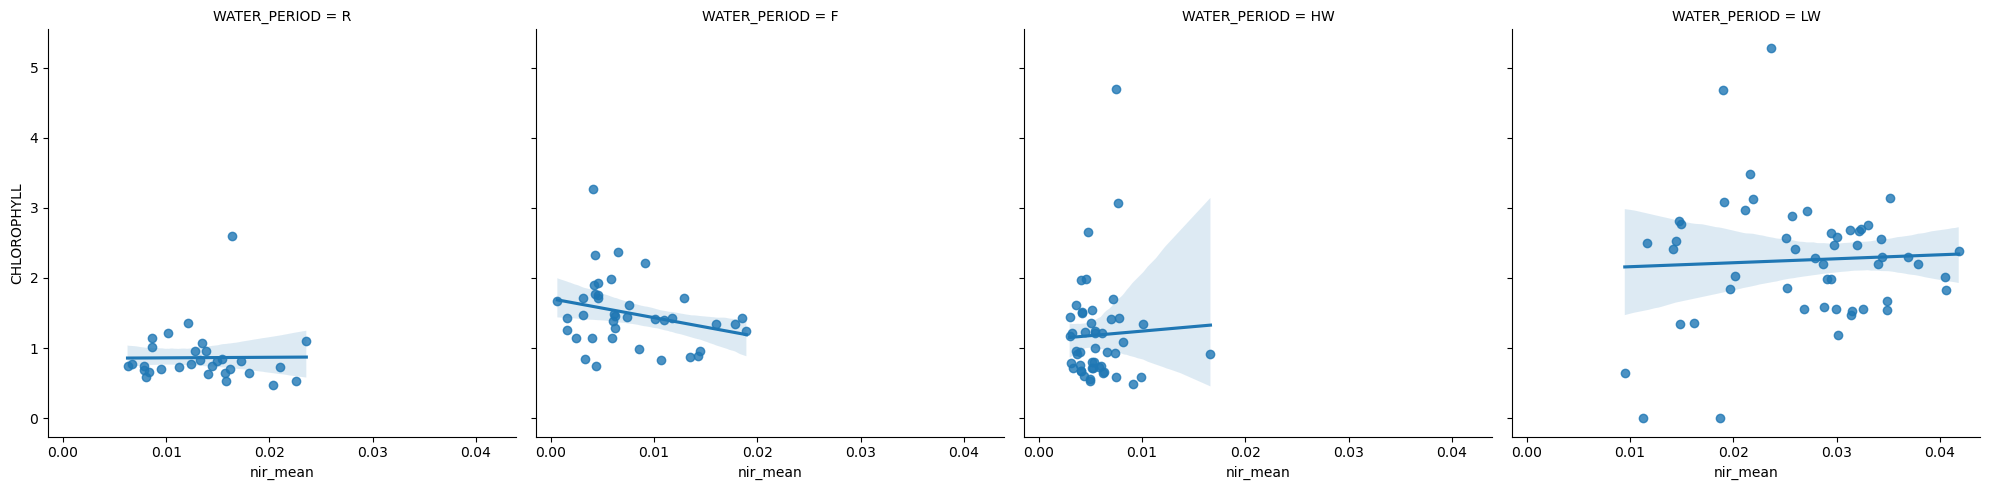

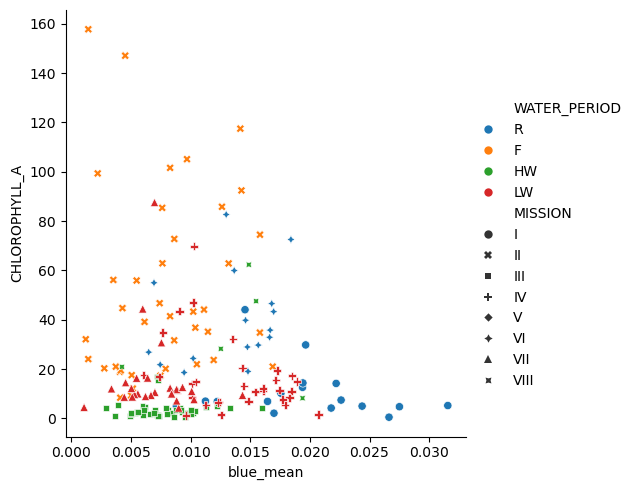

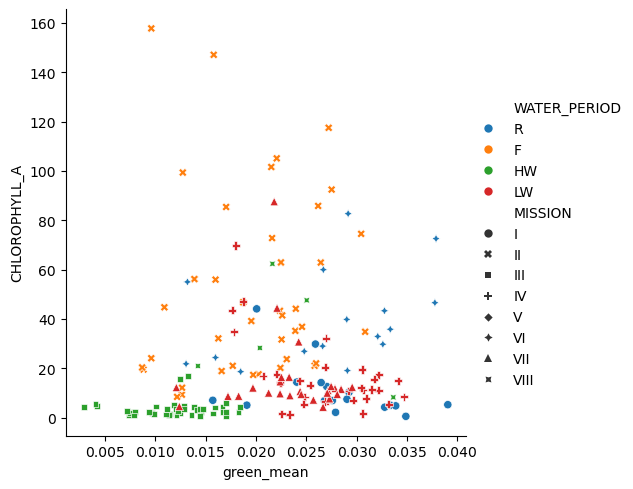

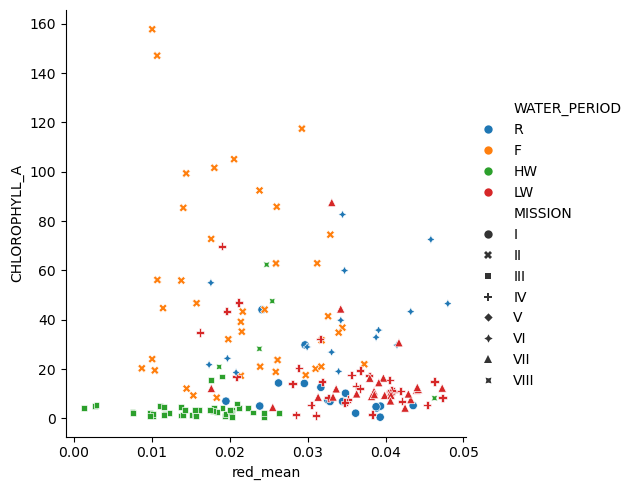

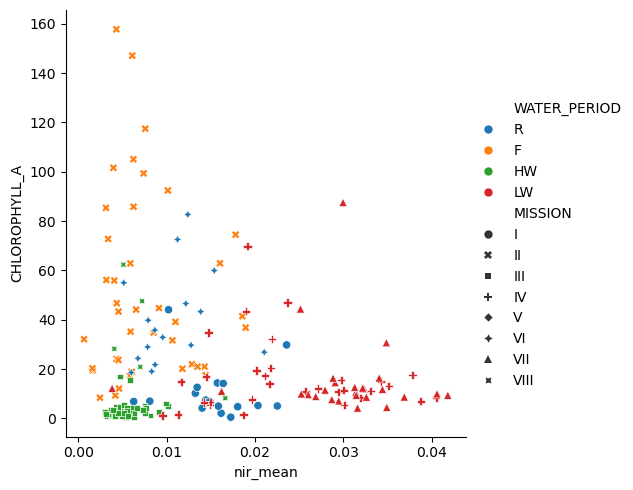

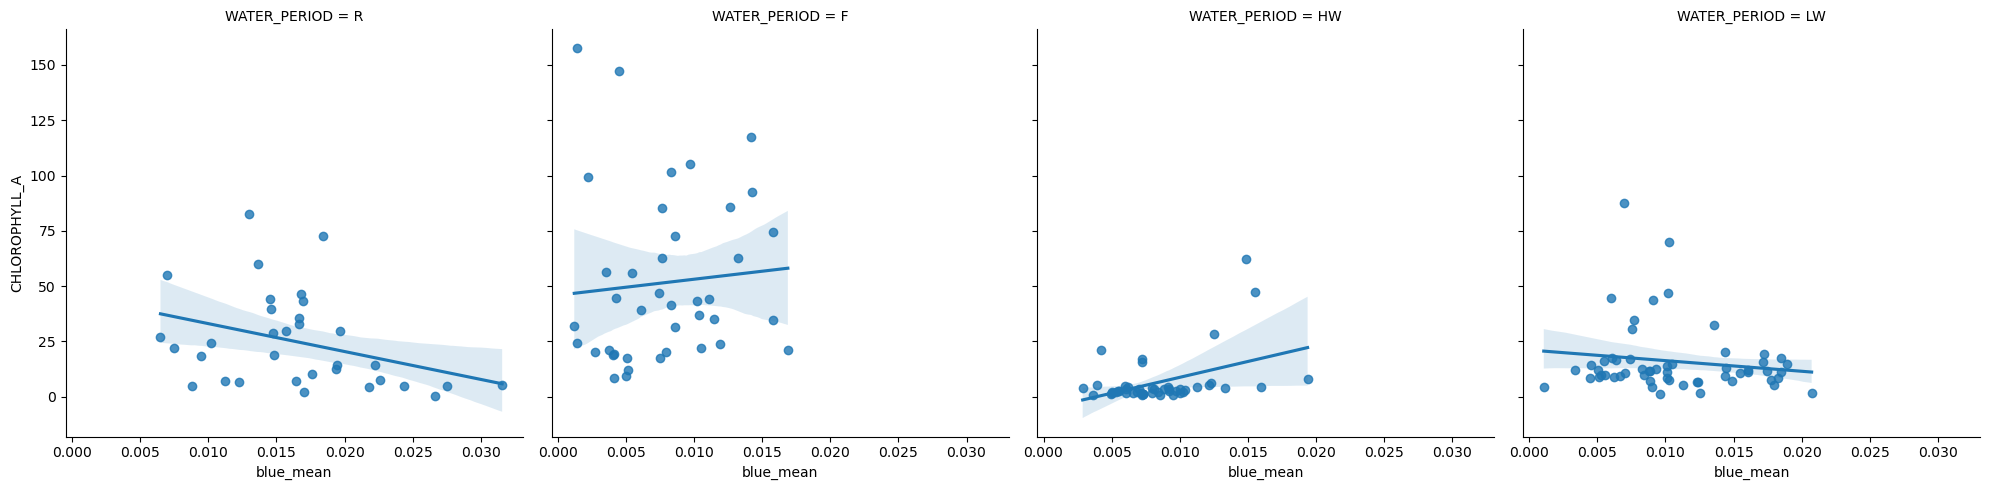

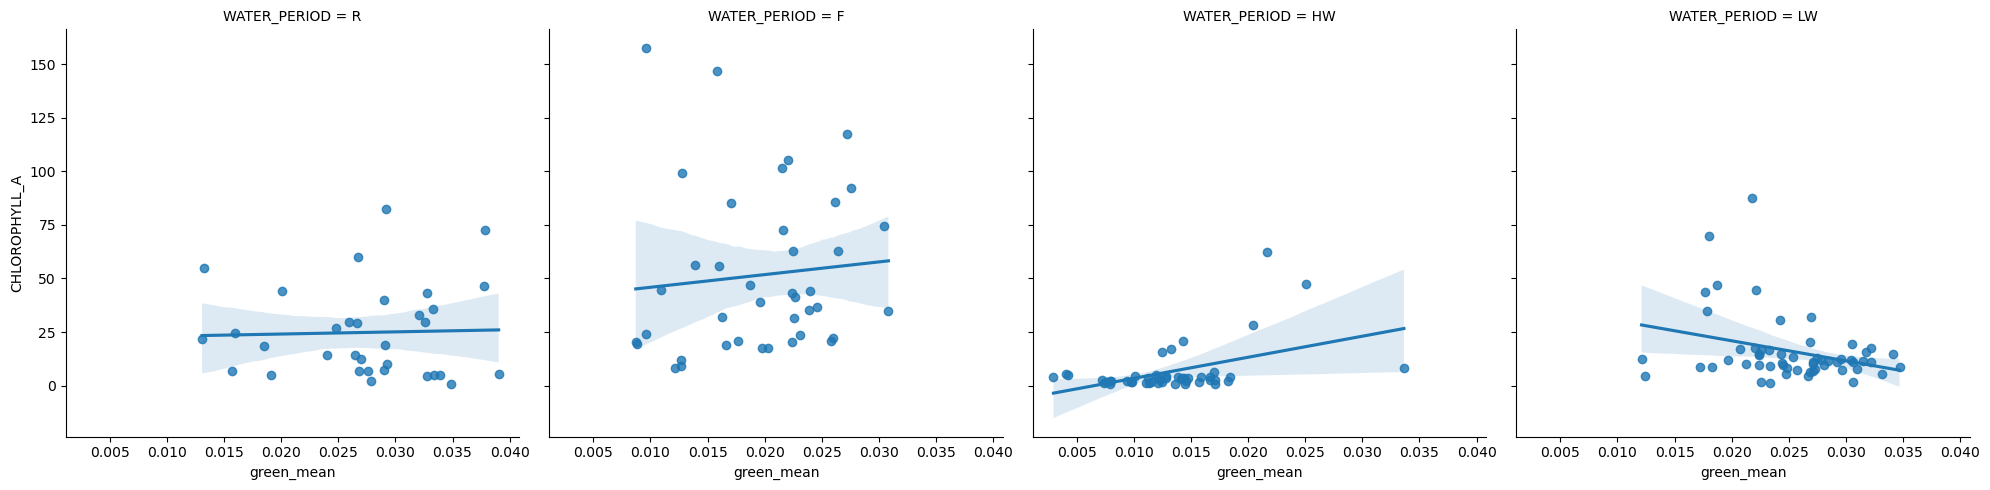

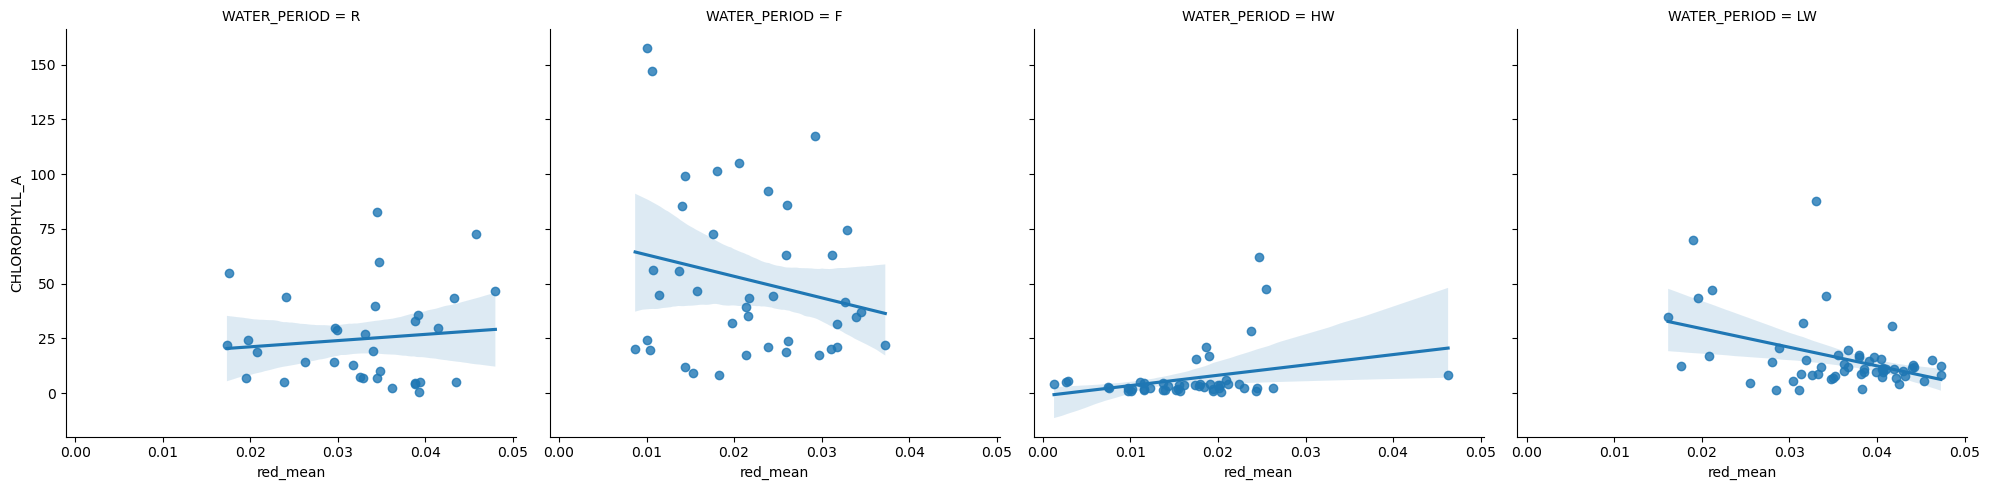

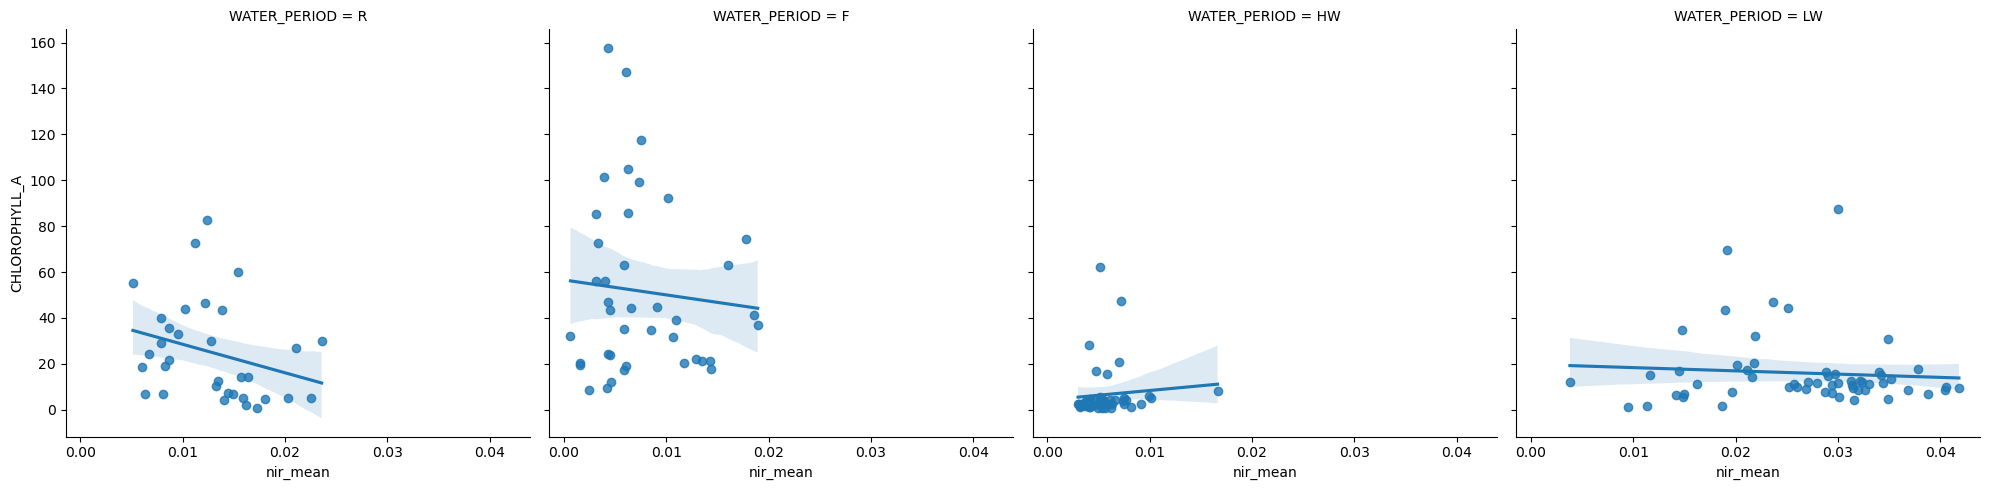

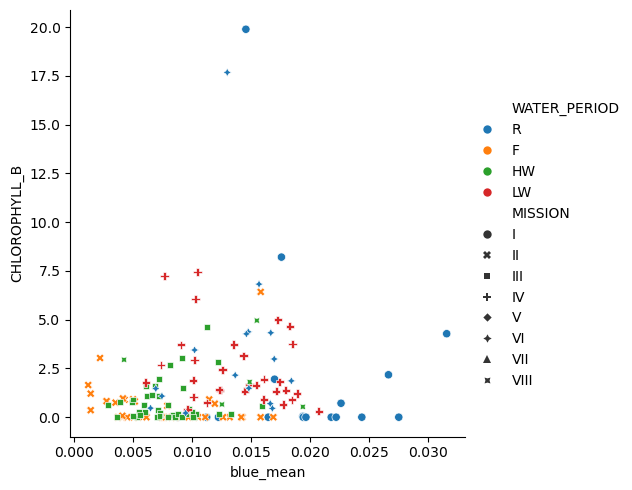

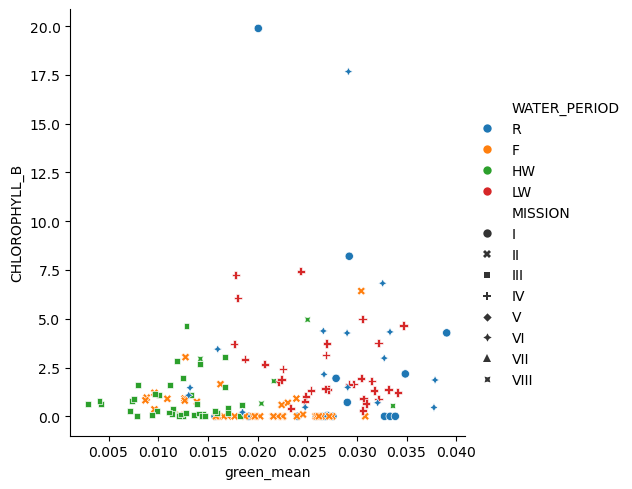

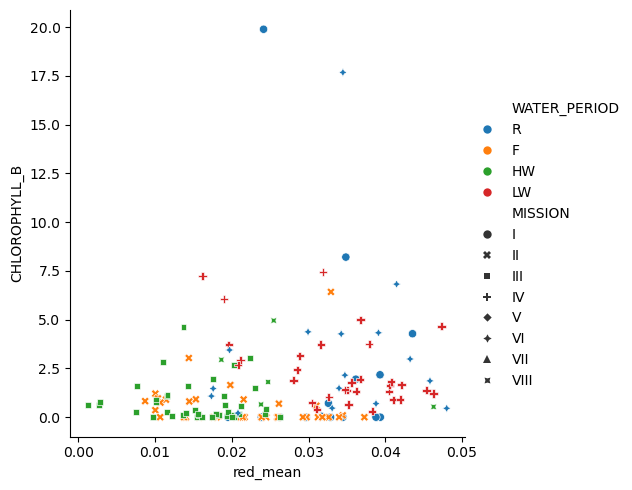

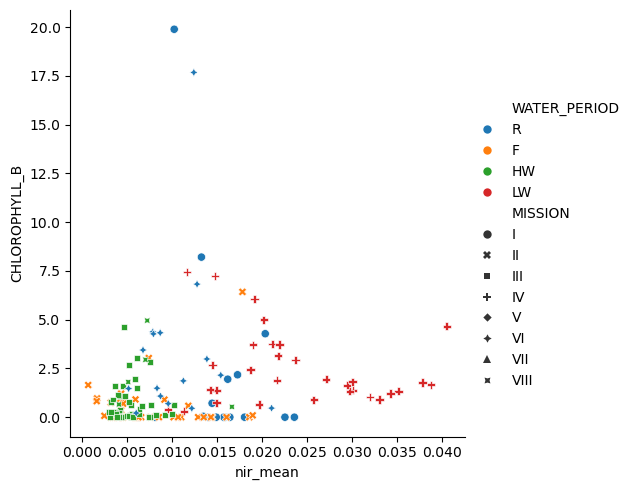

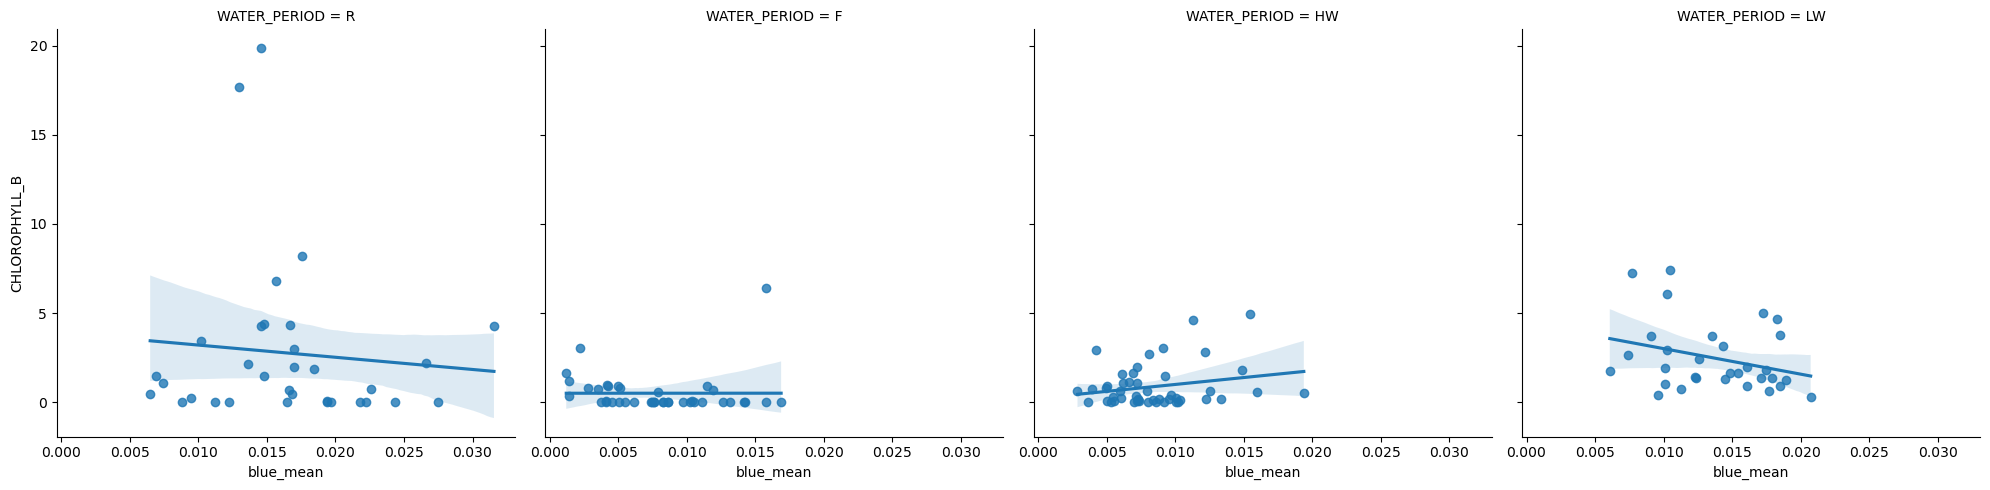

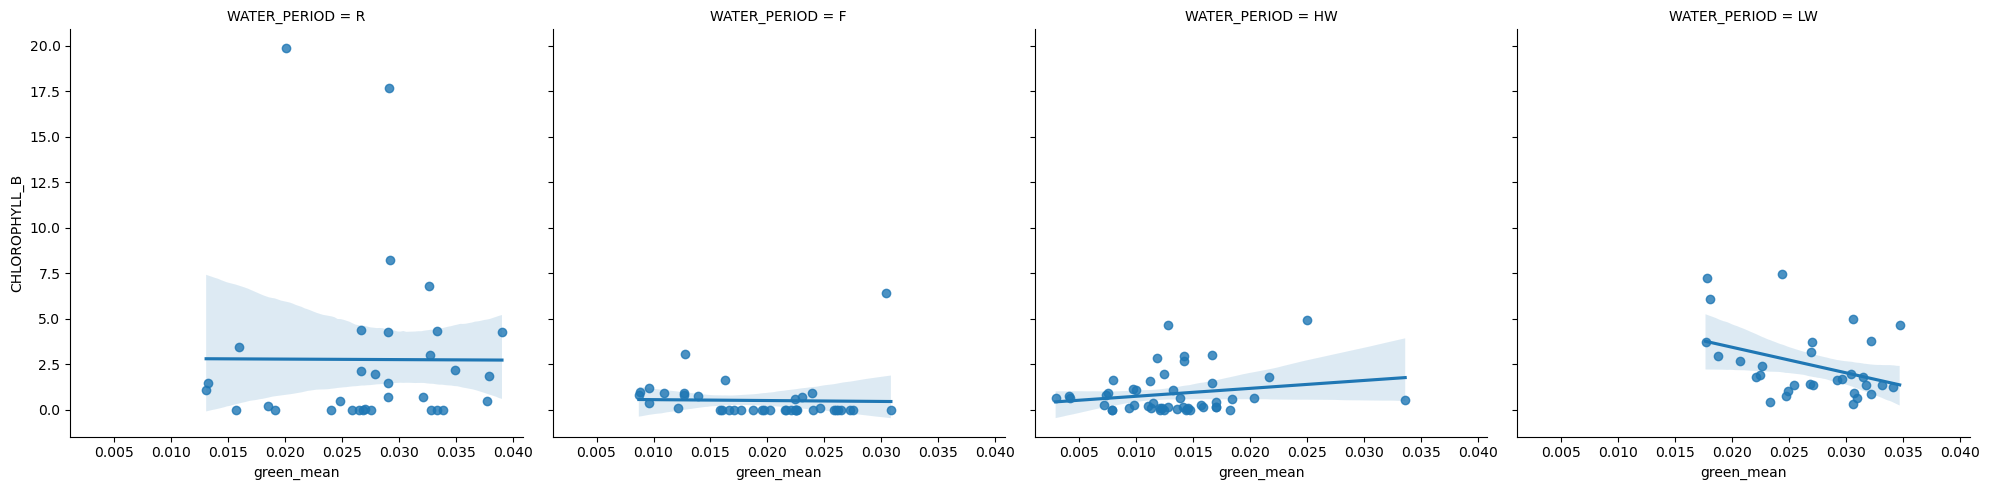

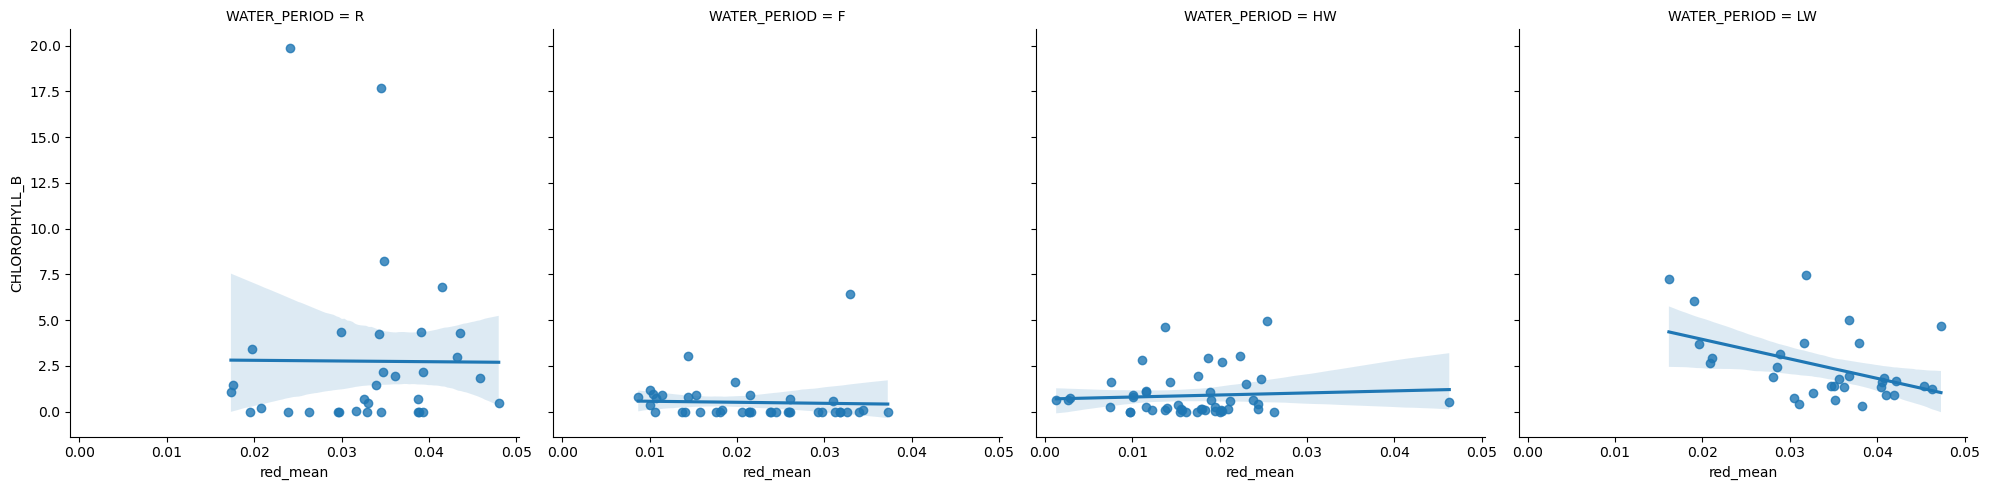

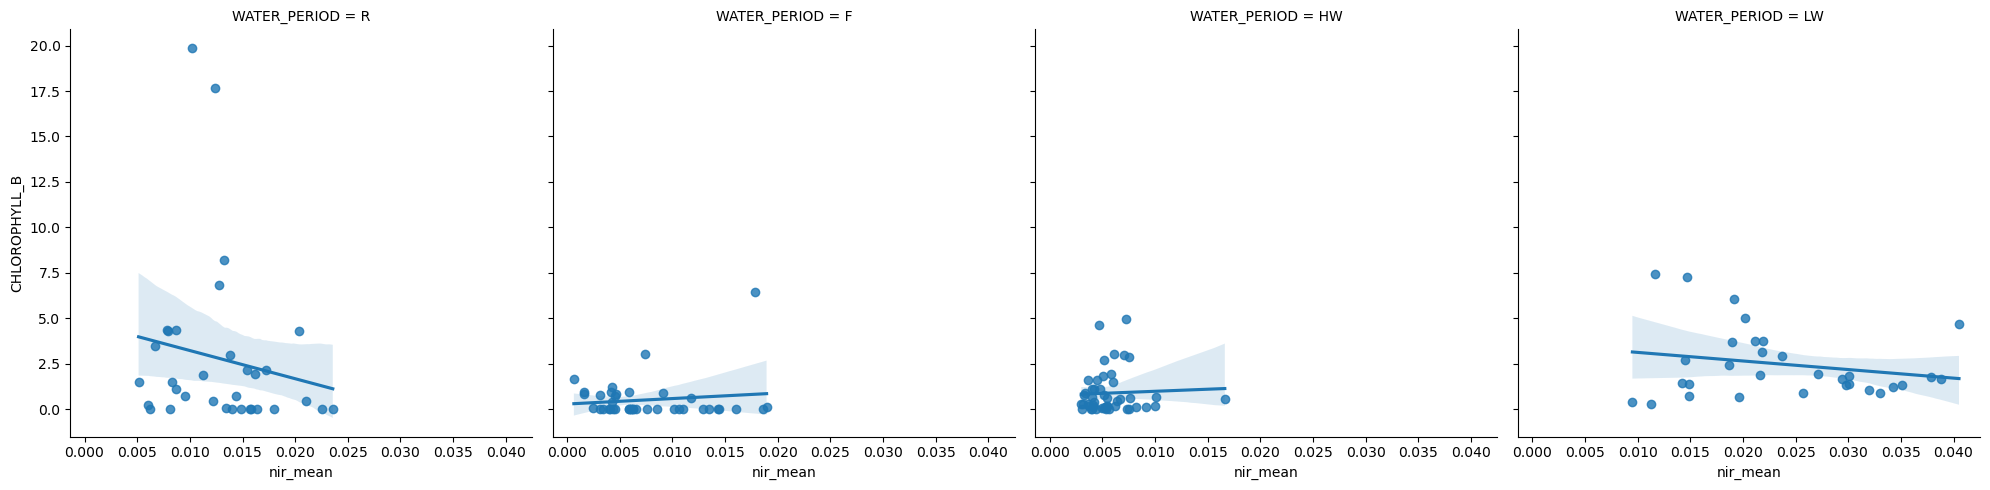

In [108]:
cols = ['CHLOROPHYLL', 'CHLOROPHYLL_A', 'CHLOROPHYLL_B']

for i in cols:
    sns.relplot(data=df_minDate_clean, x="blue_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.relplot(data=df_minDate_clean, x="green_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.relplot(data=df_minDate_clean, x="red_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.relplot(data=df_minDate_clean, x="nir_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.lmplot(data=df_minDate_clean, x="blue_mean", y=i,order=1, col="WATER_PERIOD")
    sns.lmplot(data=df_minDate_clean, x="green_mean", y=i,order=1, col="WATER_PERIOD")
    sns.lmplot(data=df_minDate_clean, x="red_mean", y=i,order=1, col="WATER_PERIOD")
    sns.lmplot(data=df_minDate_clean, x="nir_mean", y=i,order=1, col="WATER_PERIOD")


# Carbono Organico

c:\Users\l_v_v\anaconda3\envs\earth_engine\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


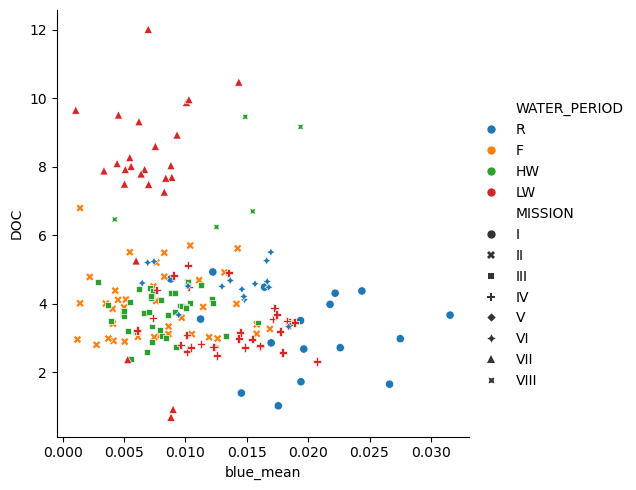

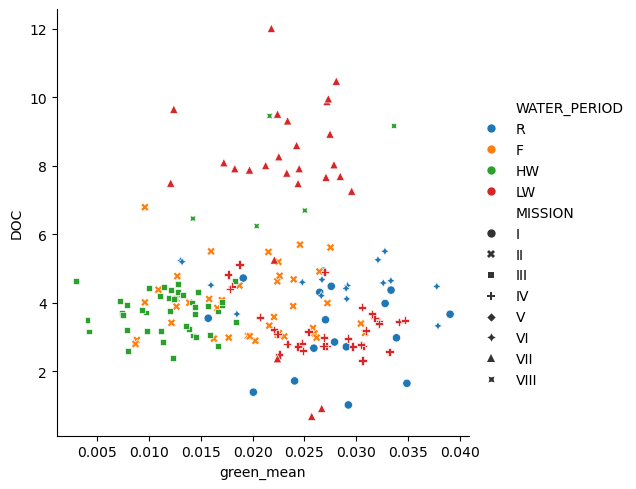

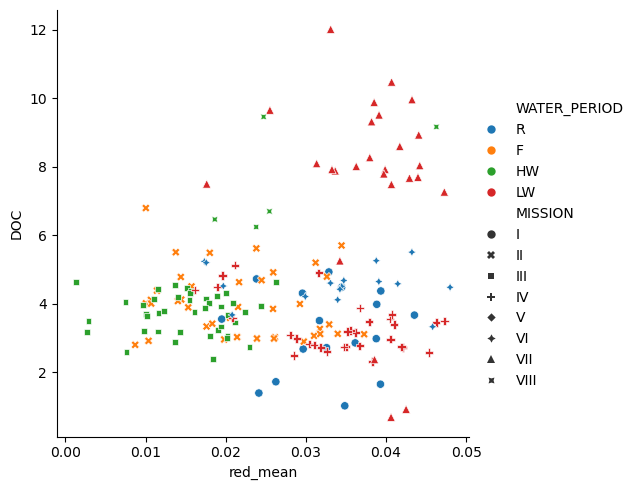

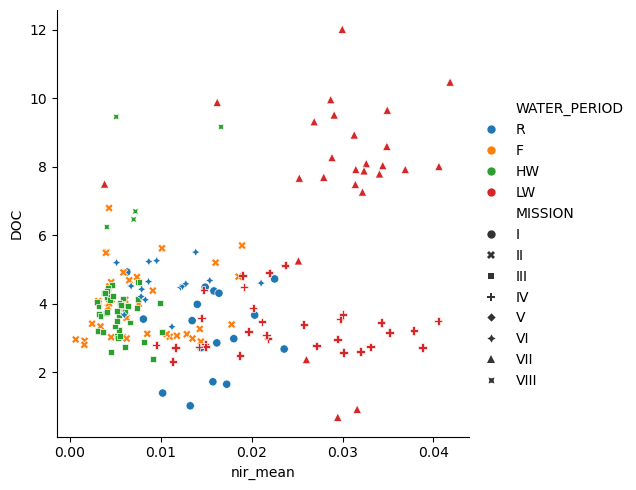

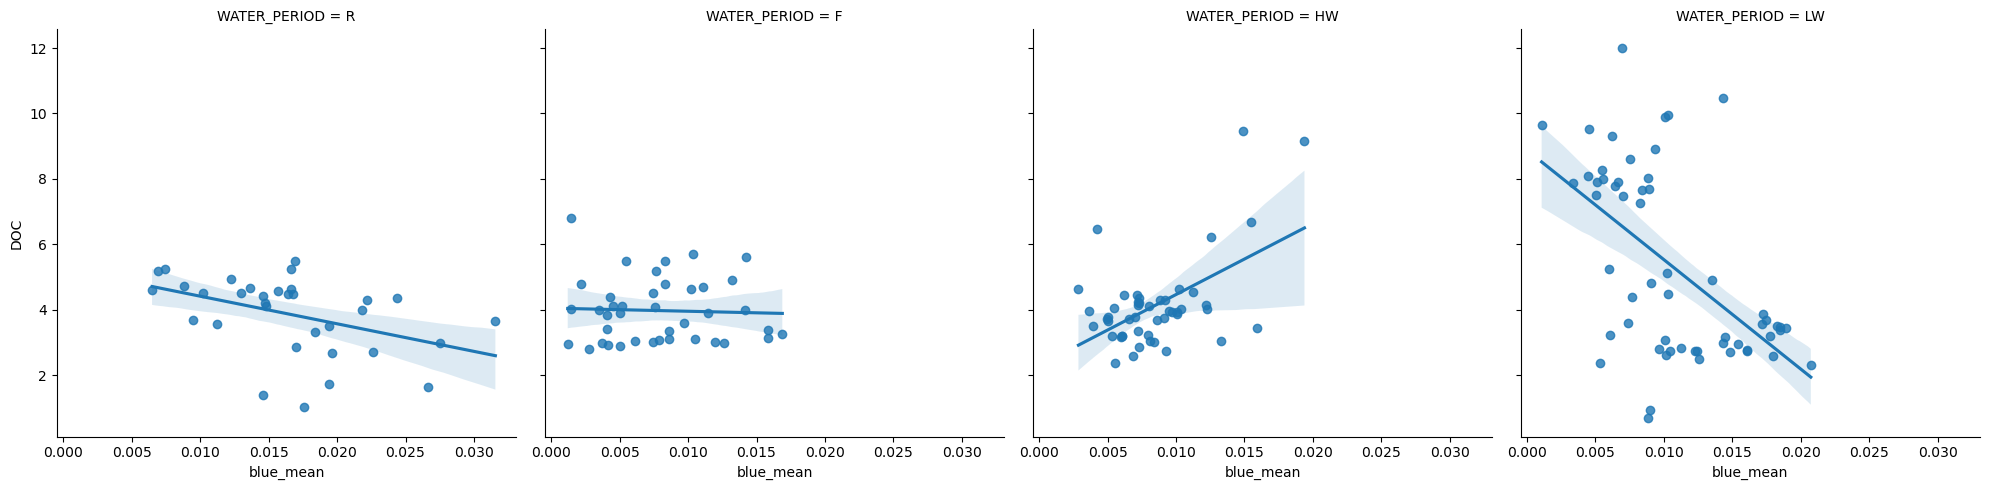

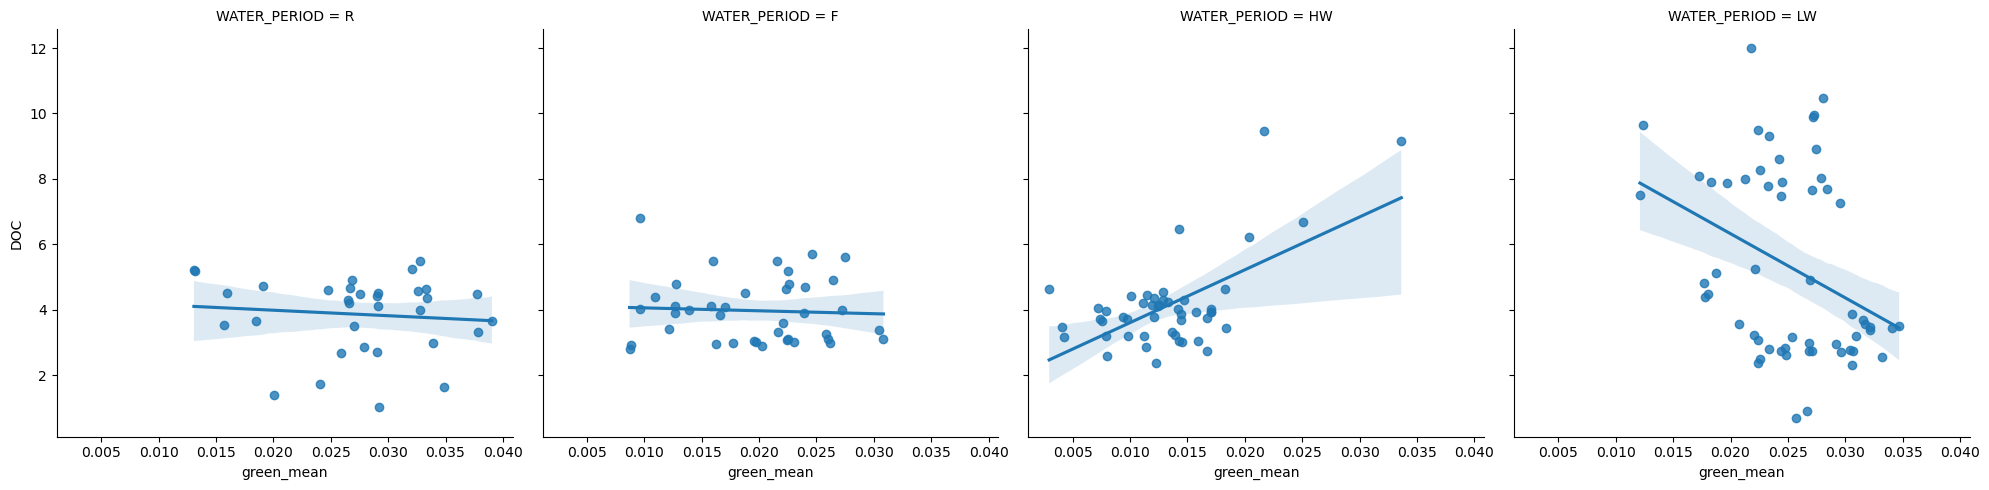

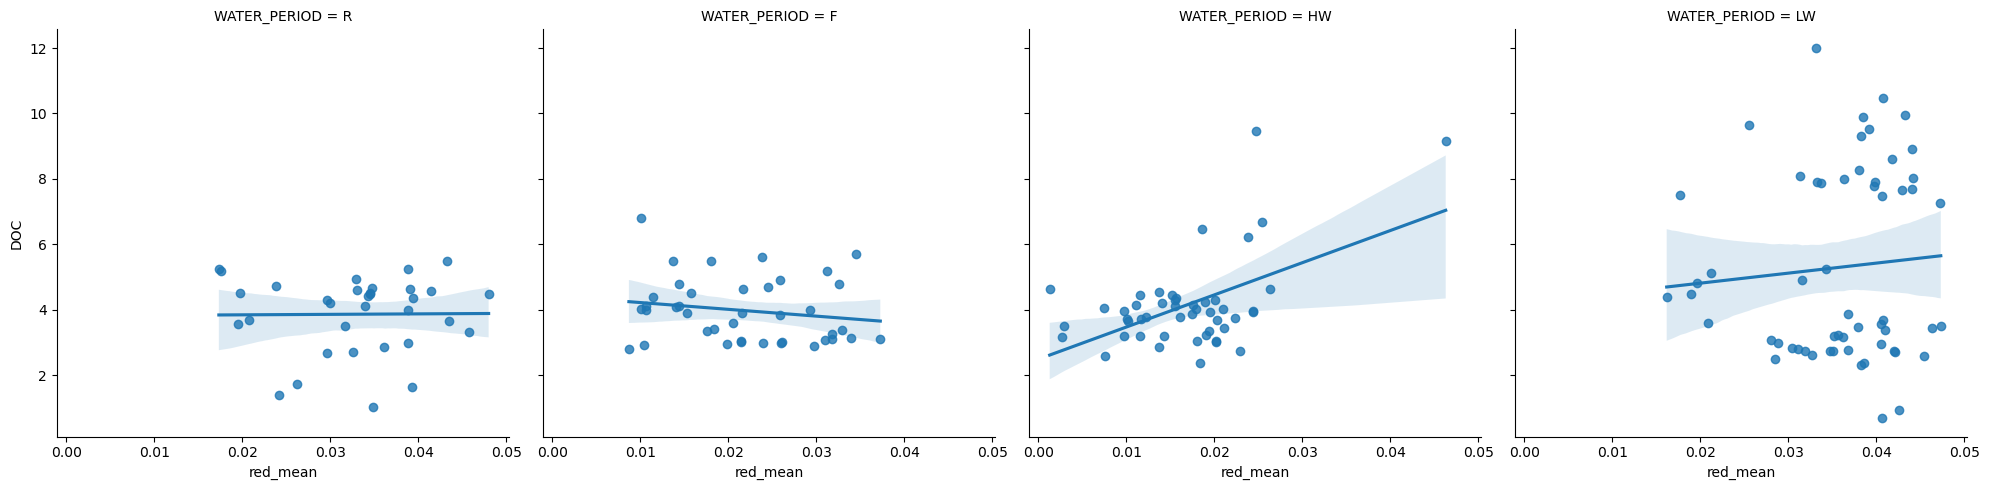

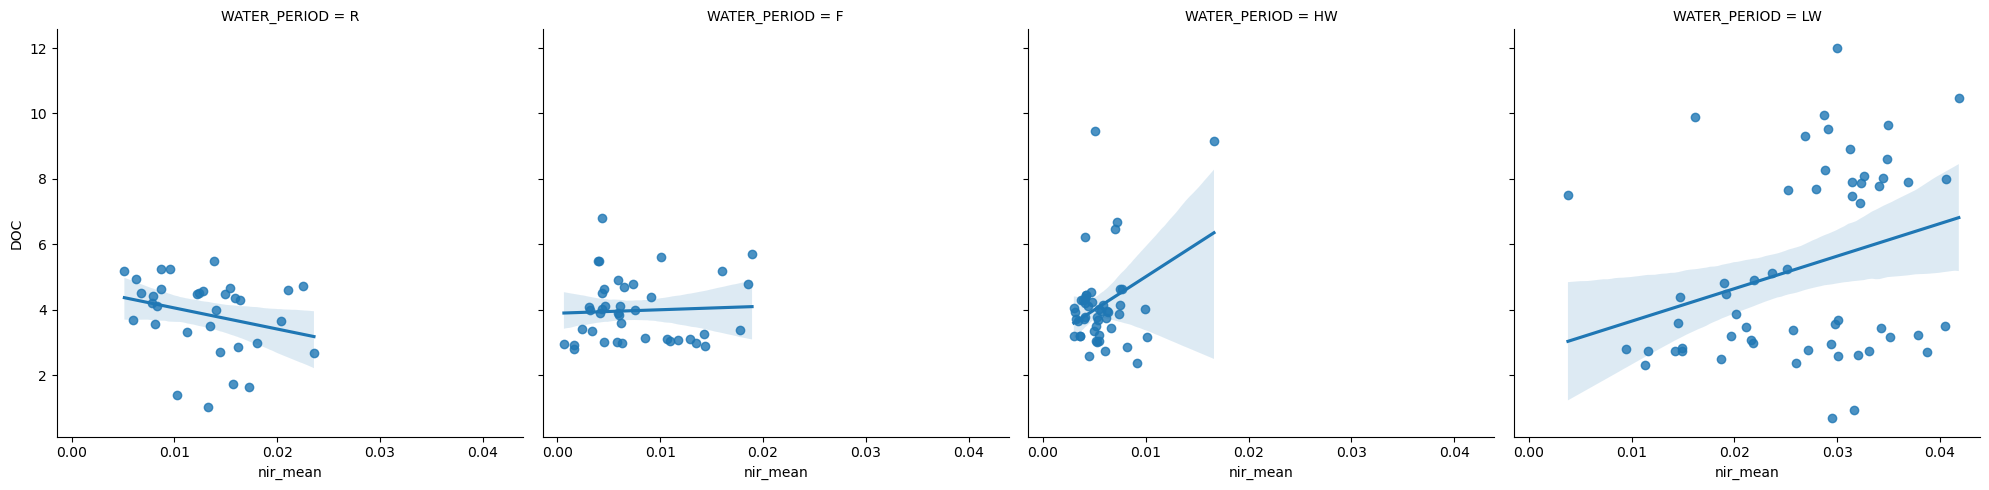

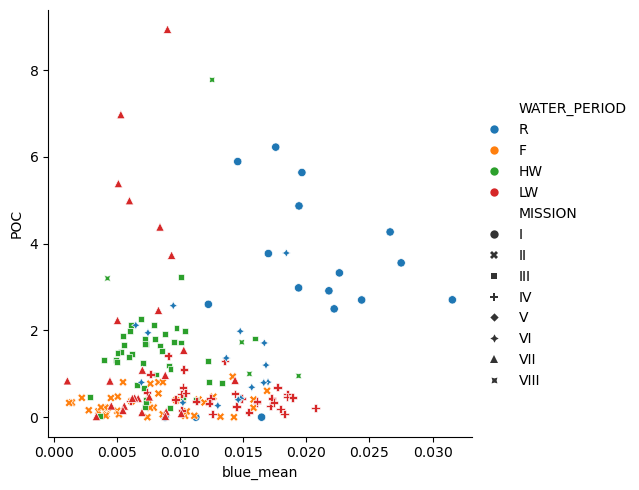

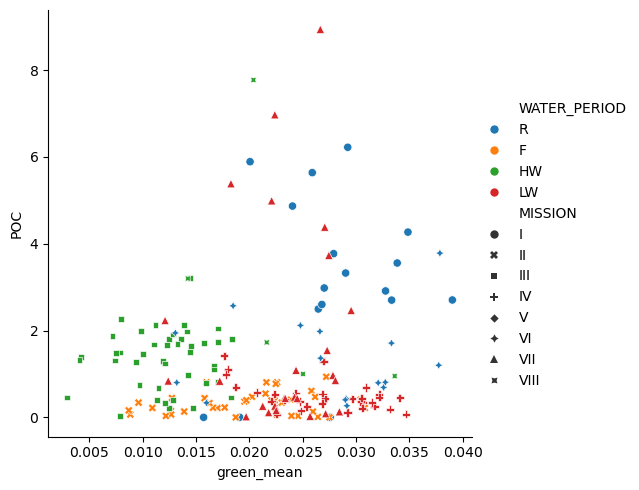

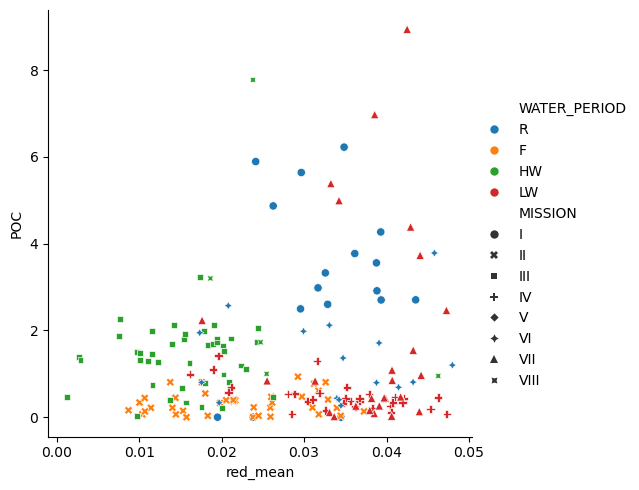

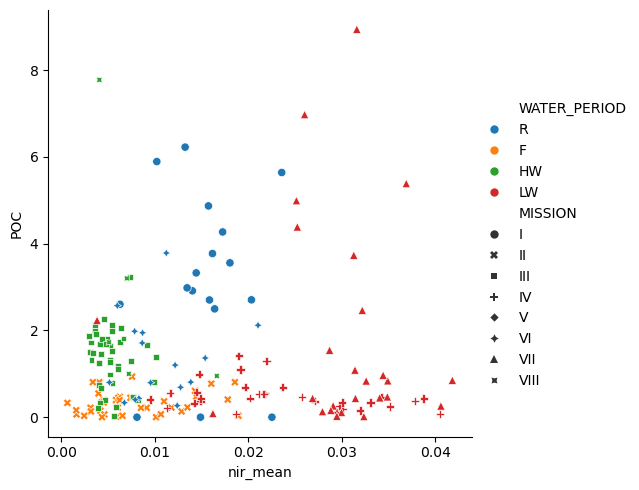

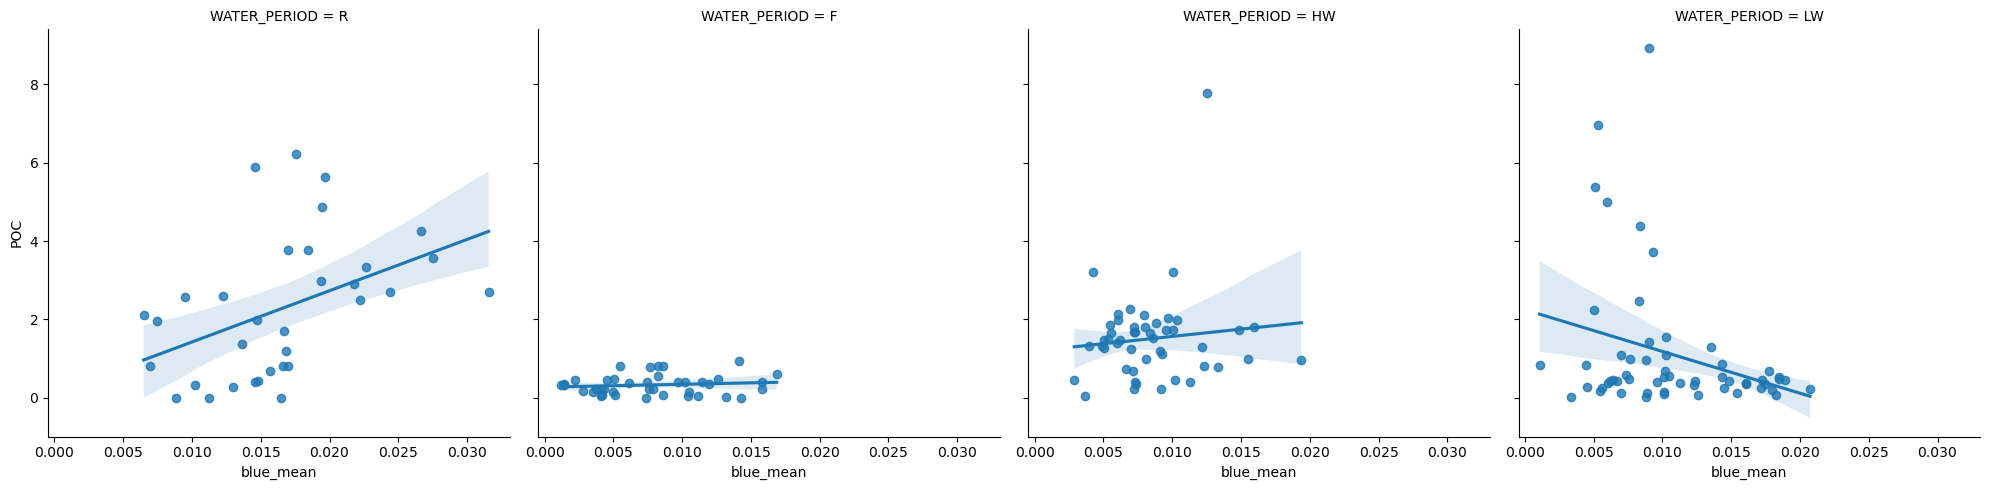

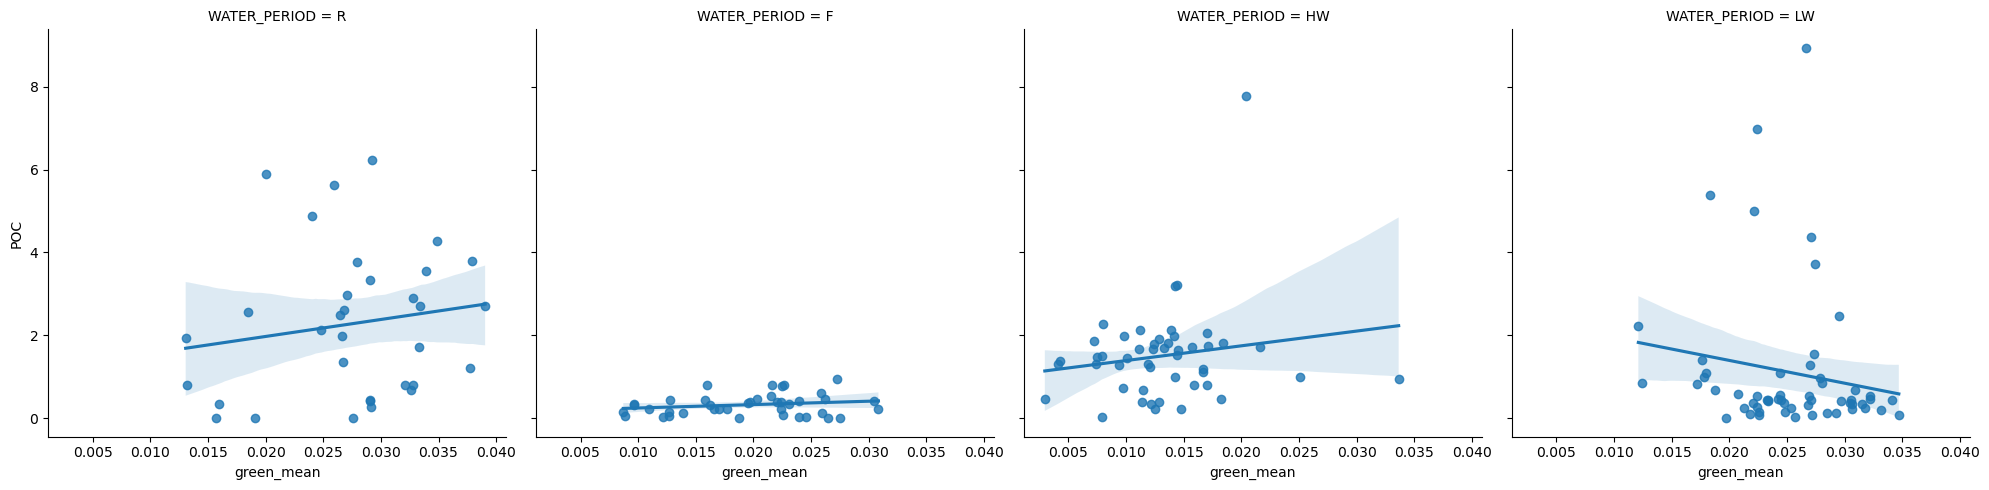

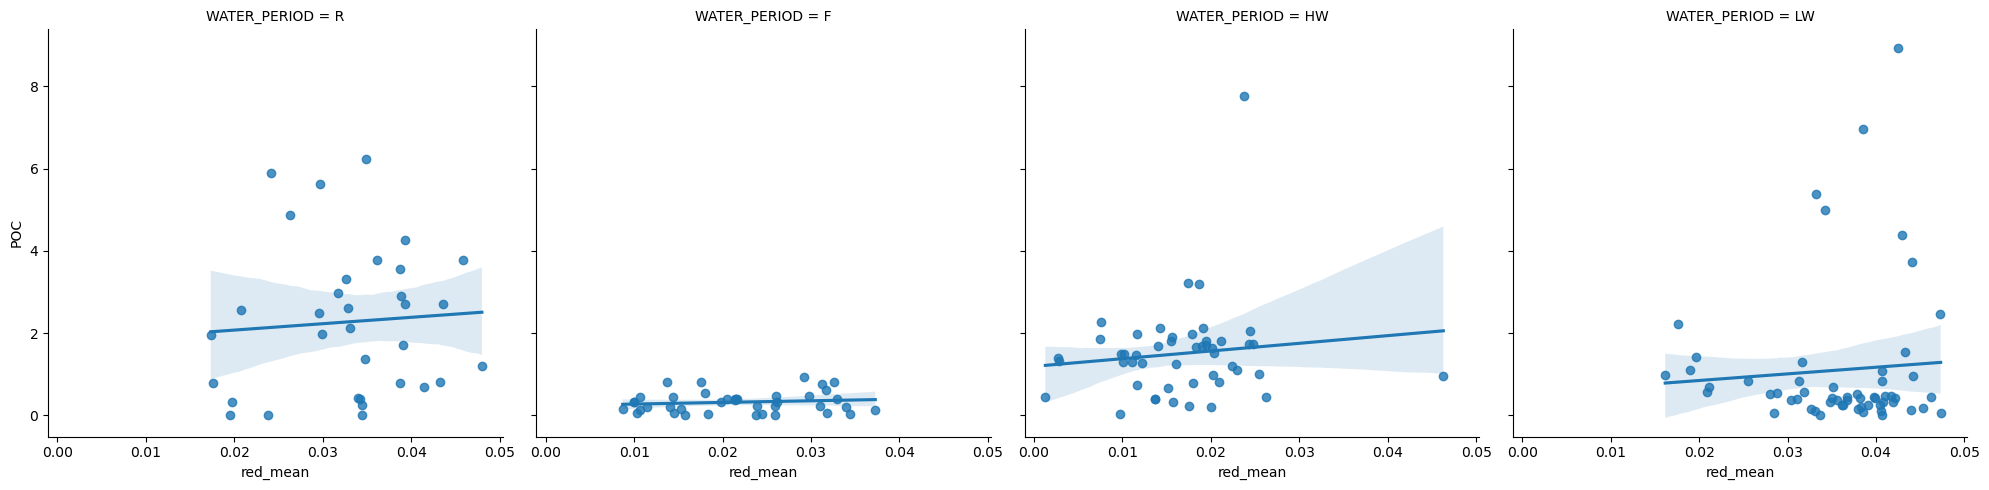

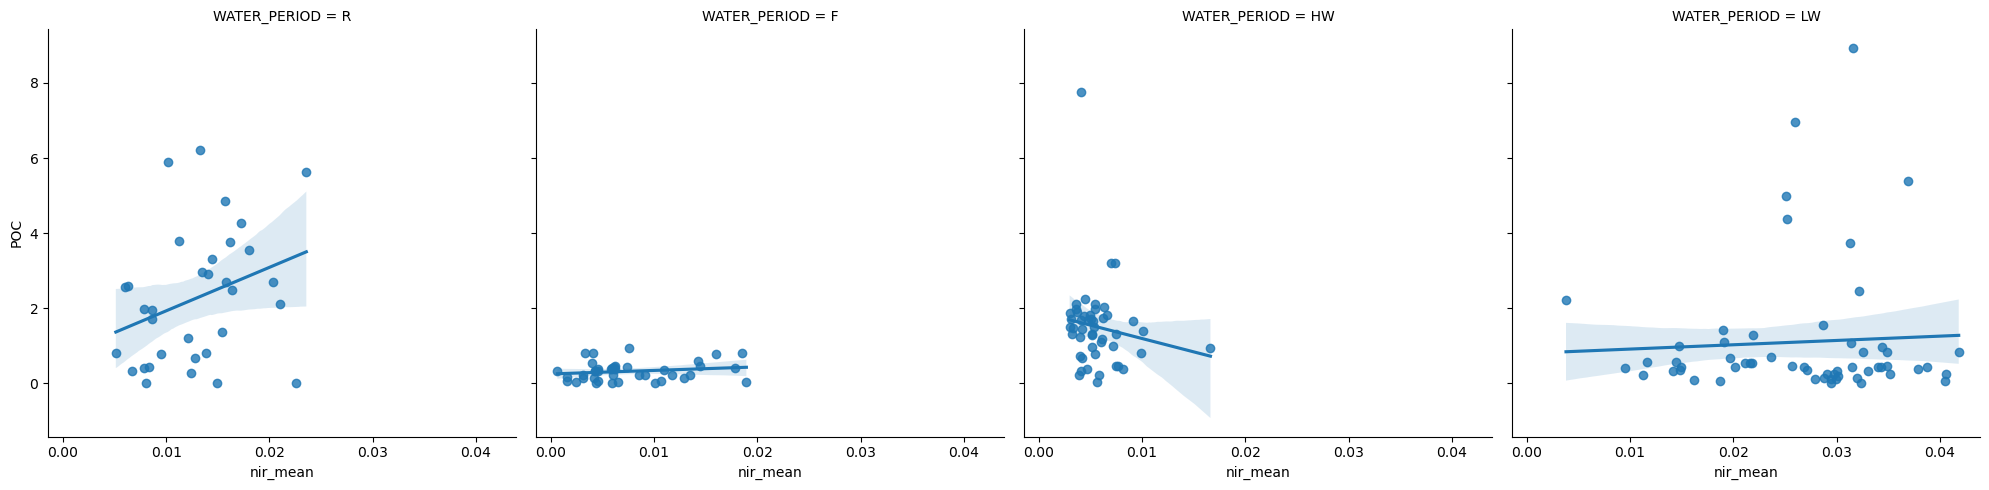

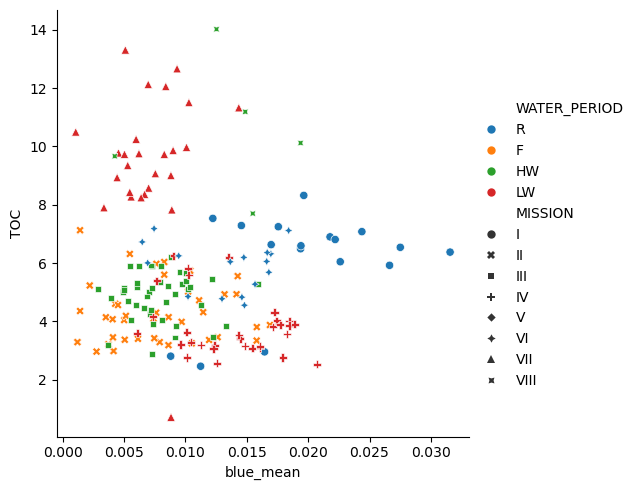

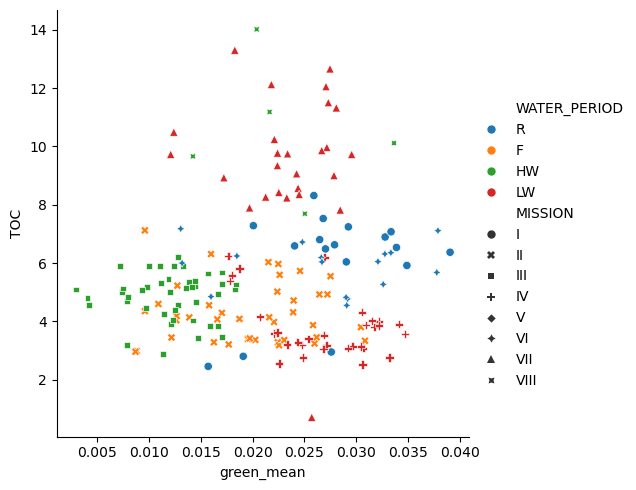

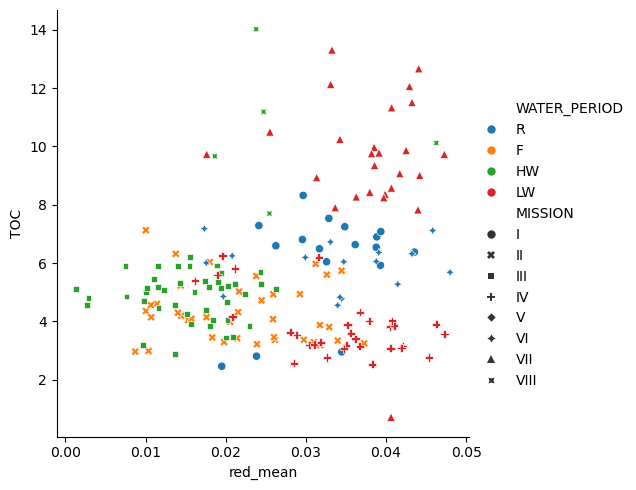

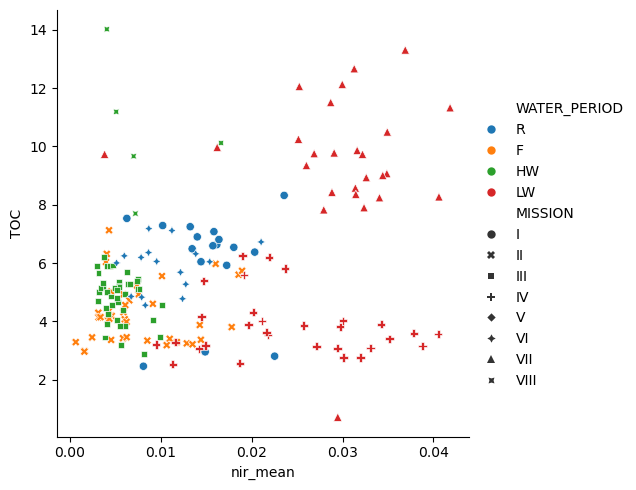

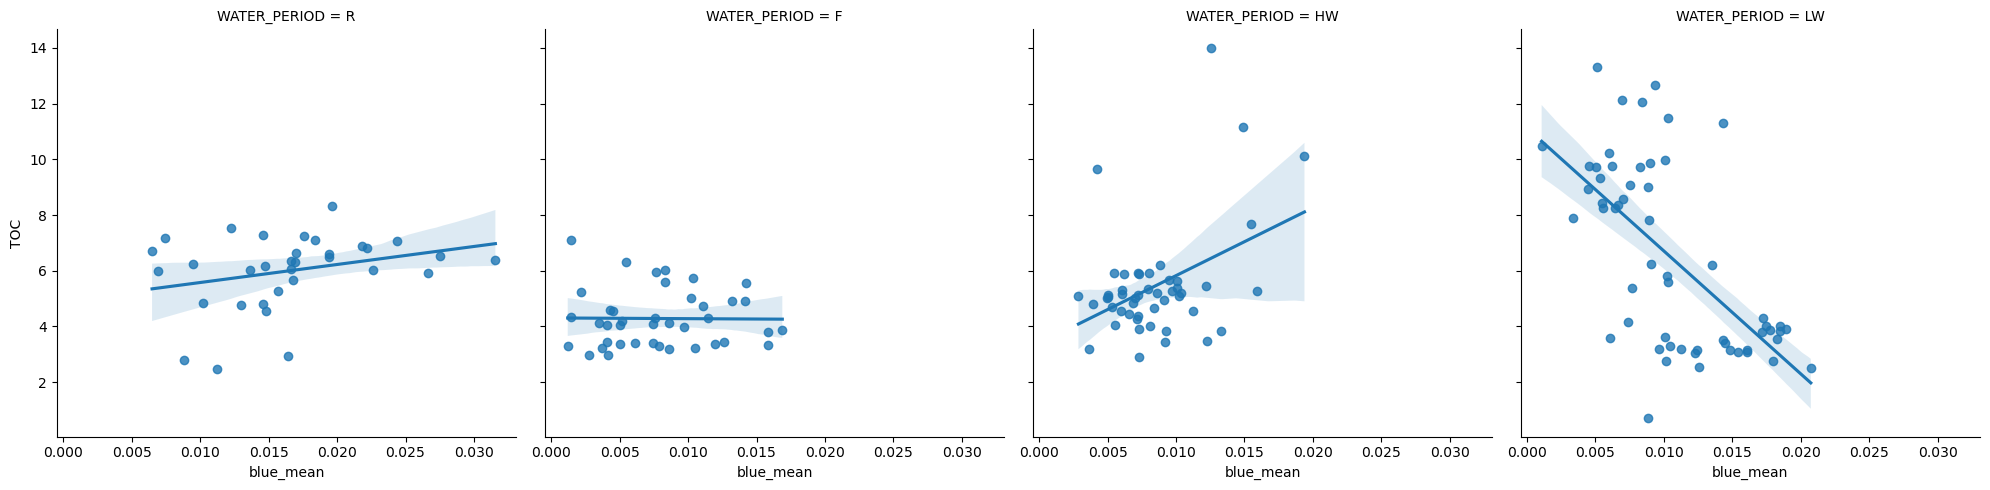

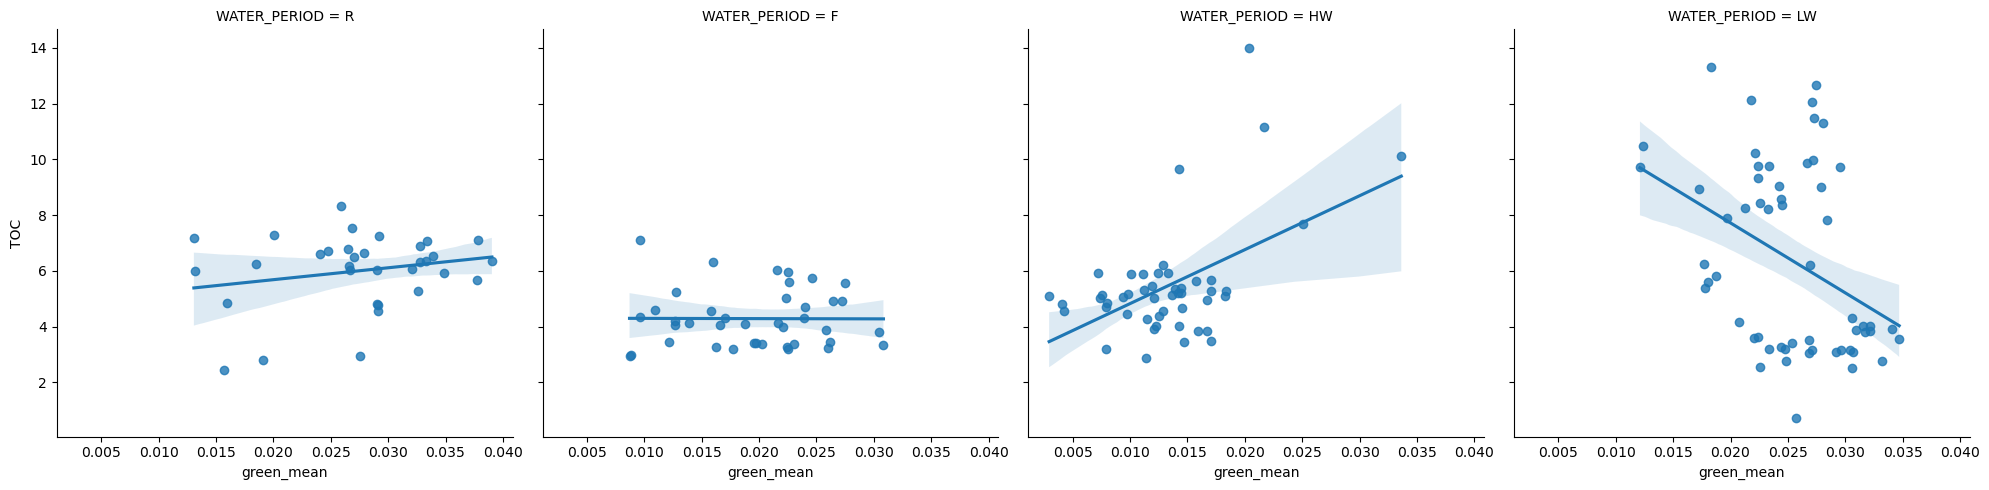

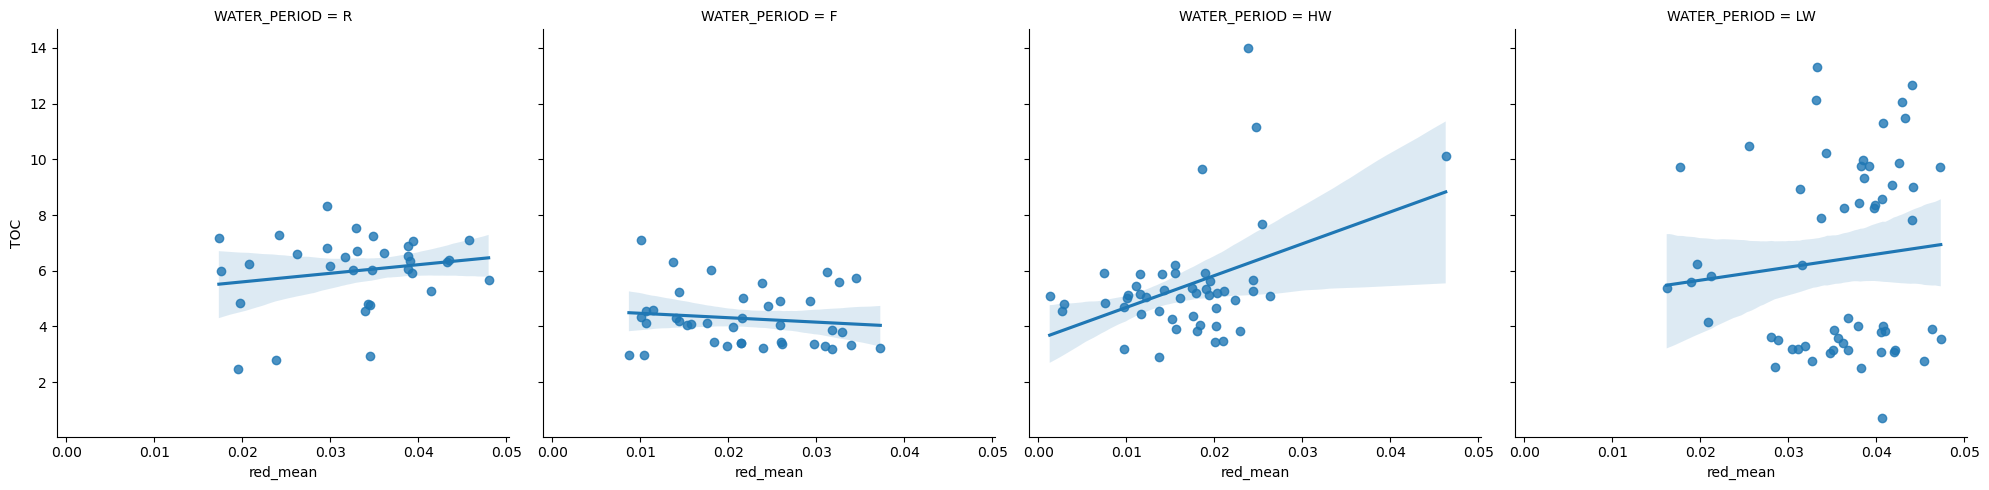

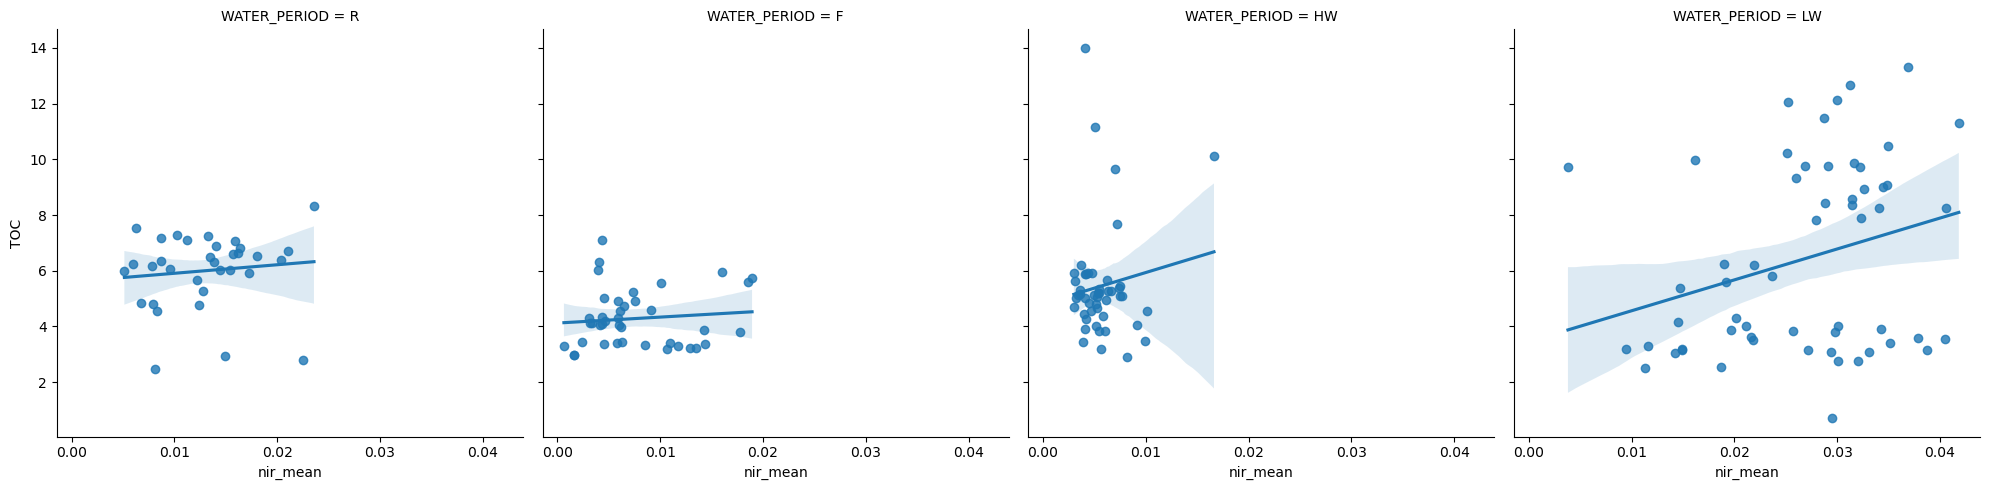

In [109]:
cols = ['DOC', 'POC', 'TOC']

for i in cols:
    sns.relplot(data=df_minDate_clean, x="blue_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.relplot(data=df_minDate_clean, x="green_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.relplot(data=df_minDate_clean, x="red_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.relplot(data=df_minDate_clean, x="nir_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.lmplot(data=df_minDate_clean, x="blue_mean", y=i,order=1, col="WATER_PERIOD")
    sns.lmplot(data=df_minDate_clean, x="green_mean", y=i,order=1, col="WATER_PERIOD")
    sns.lmplot(data=df_minDate_clean, x="red_mean", y=i,order=1, col="WATER_PERIOD")
    sns.lmplot(data=df_minDate_clean, x="nir_mean", y=i,order=1, col="WATER_PERIOD")

# Nitrogenio

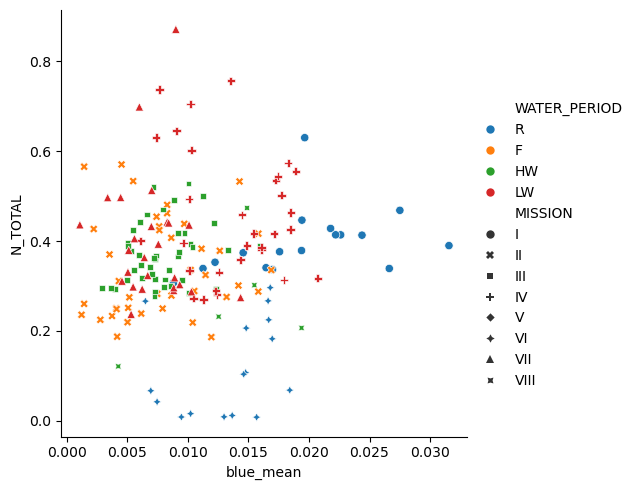

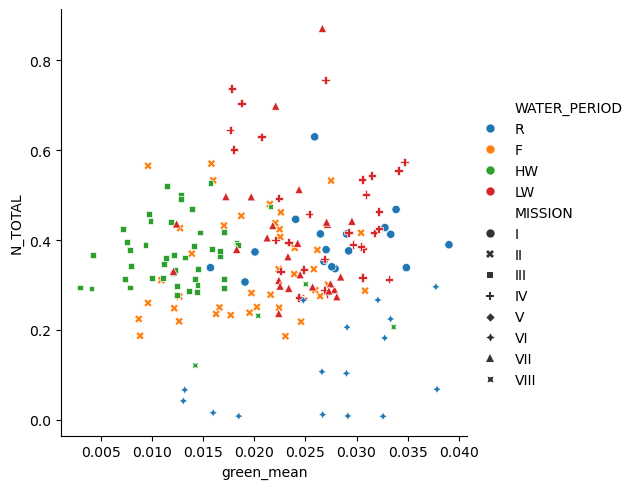

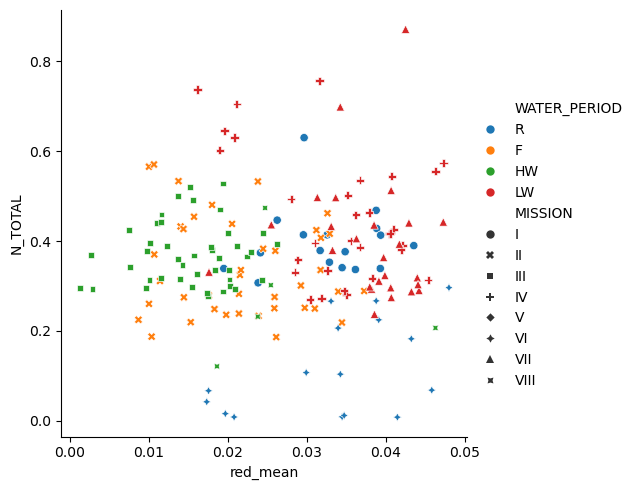

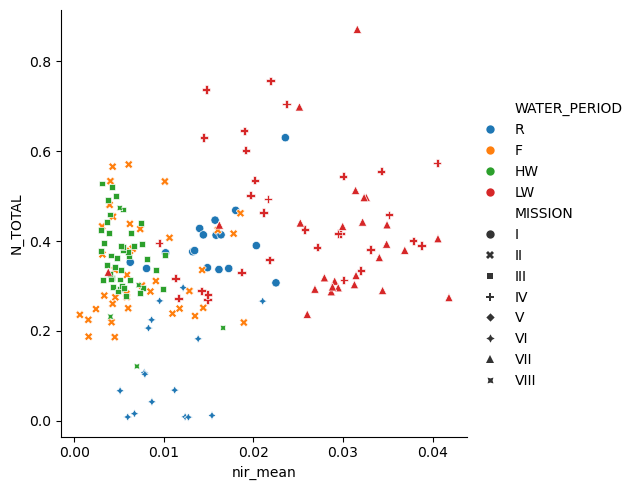

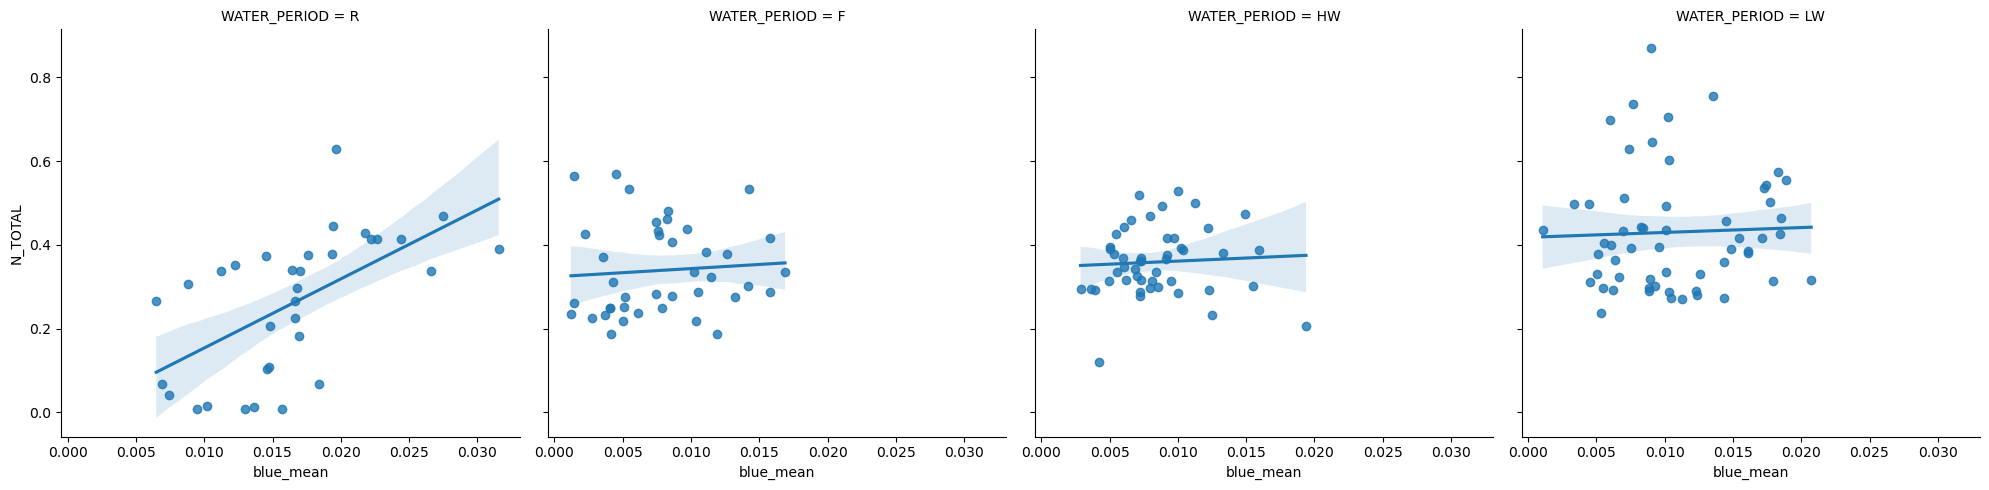

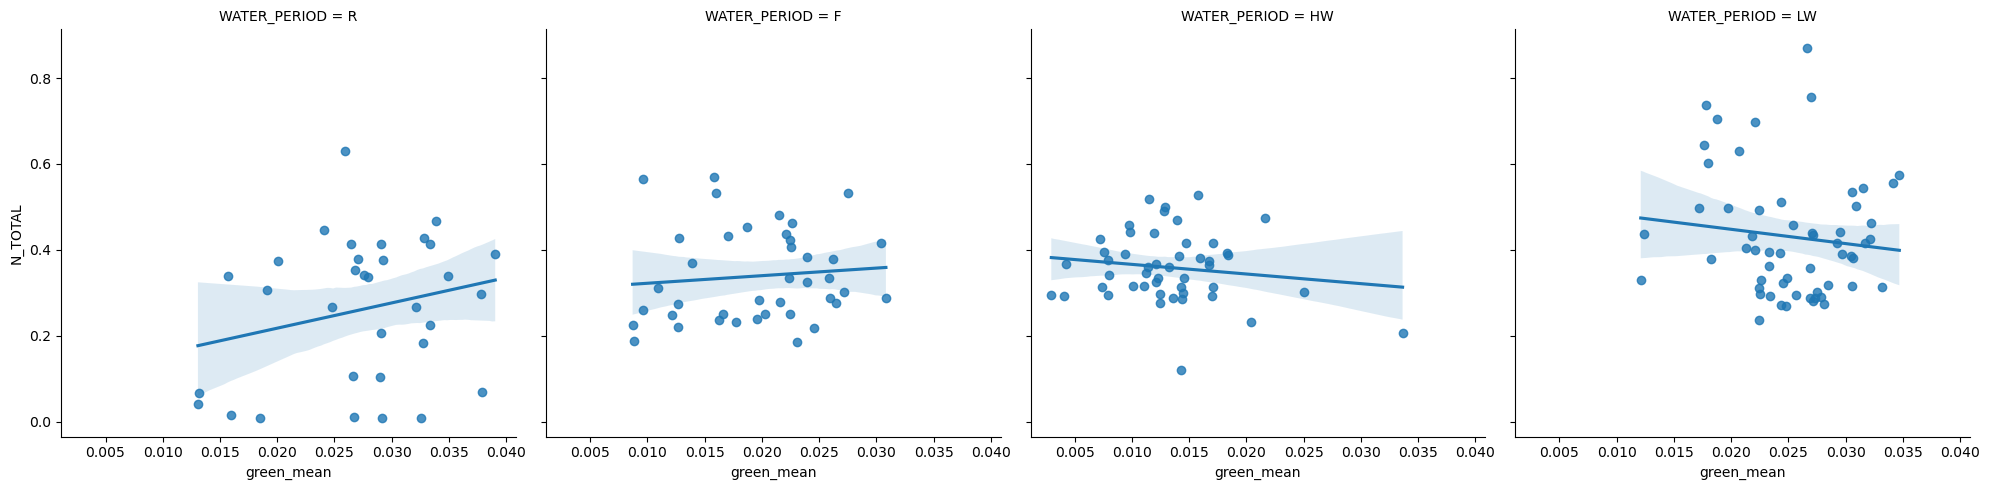

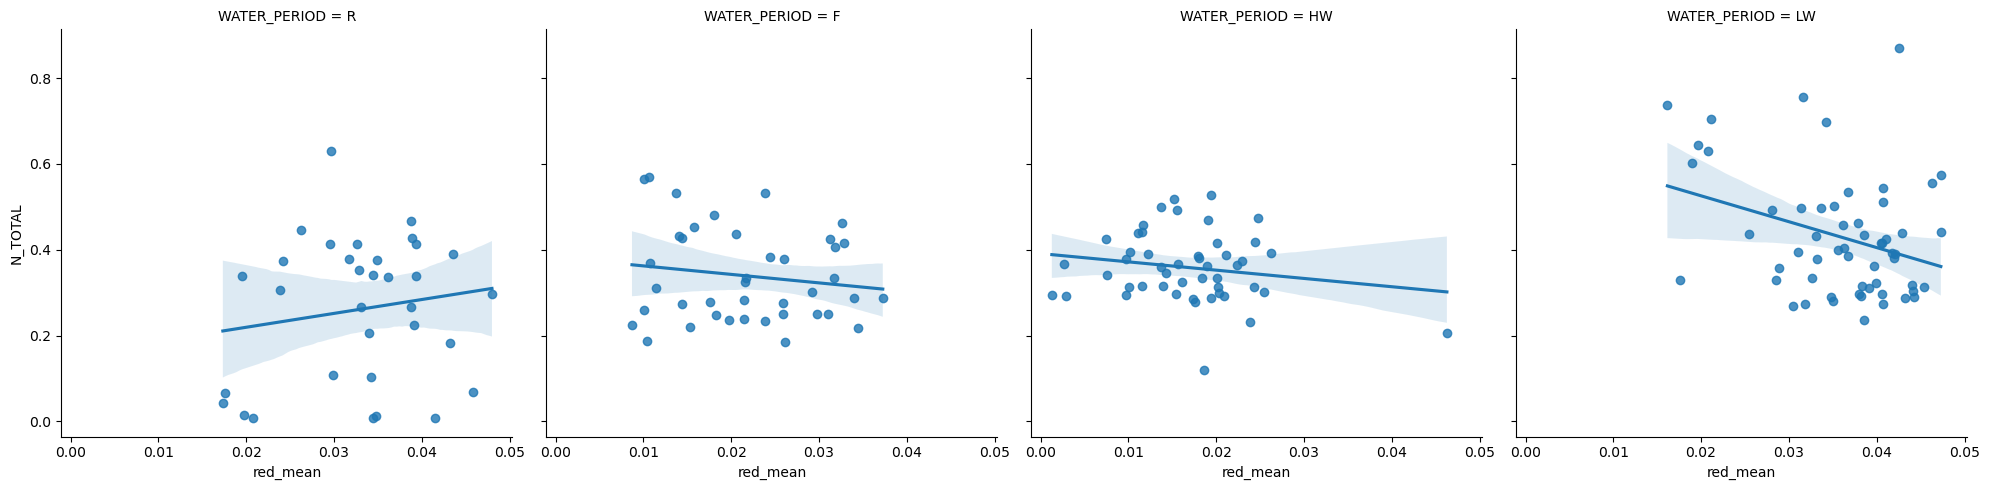

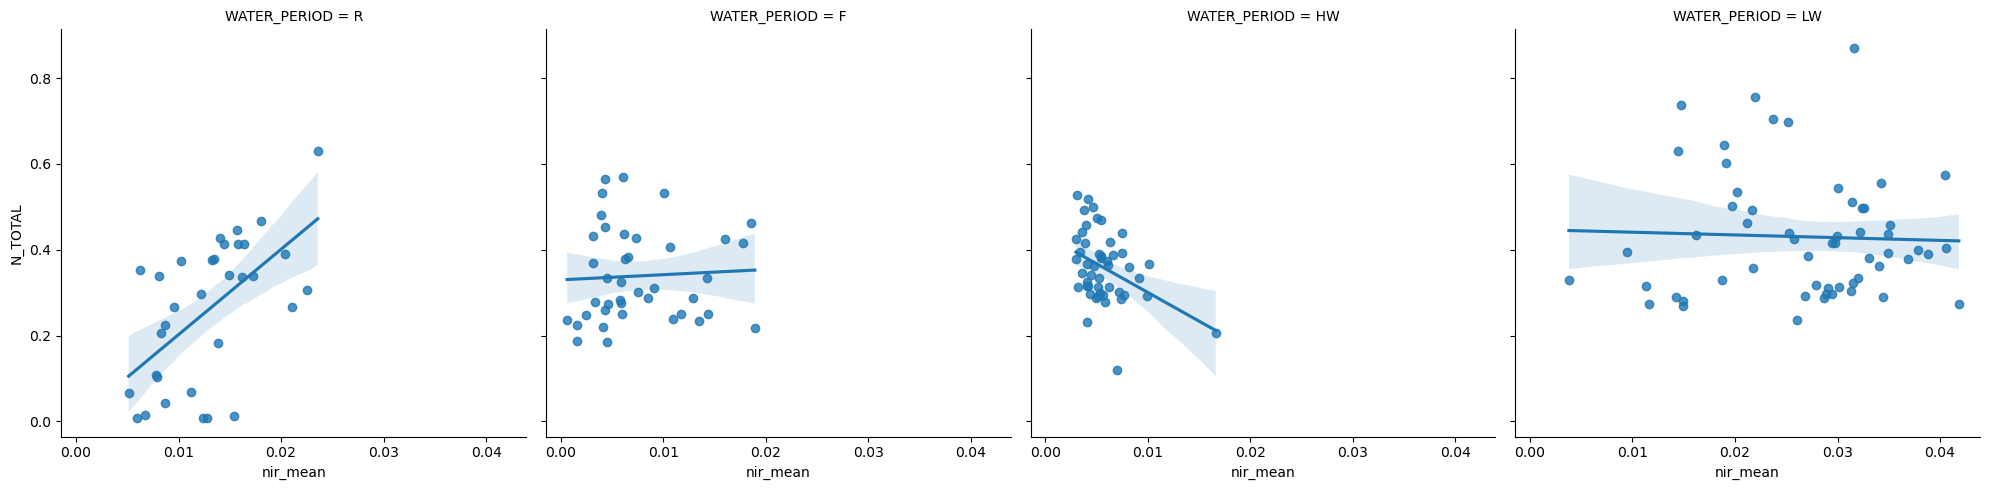

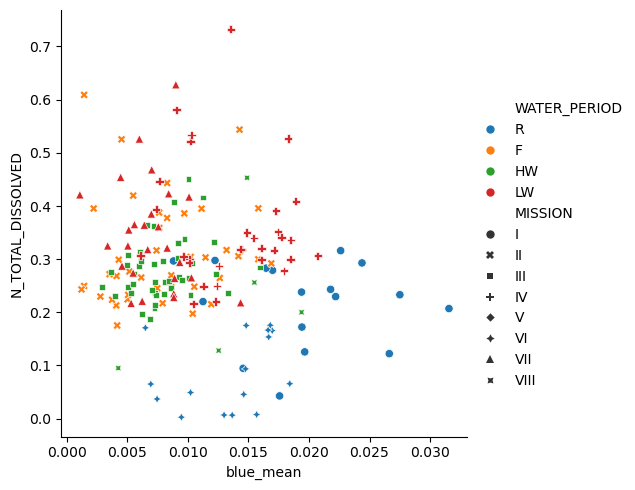

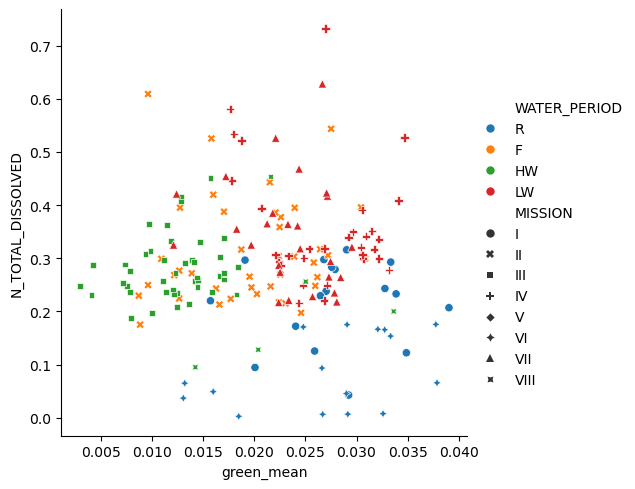

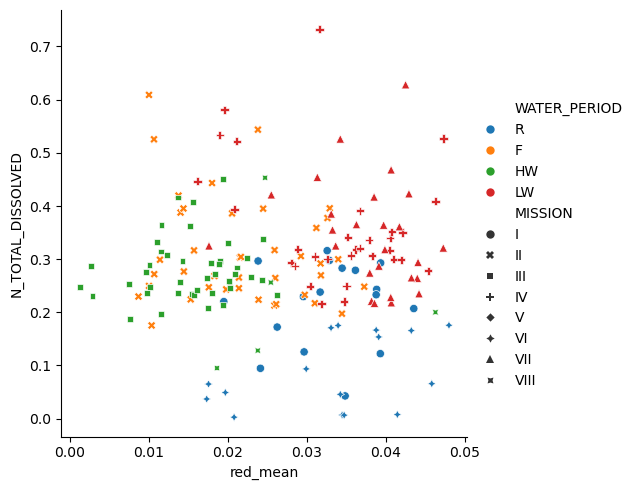

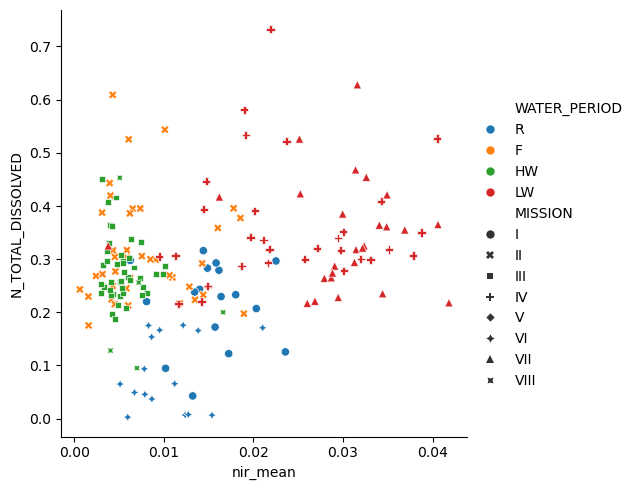

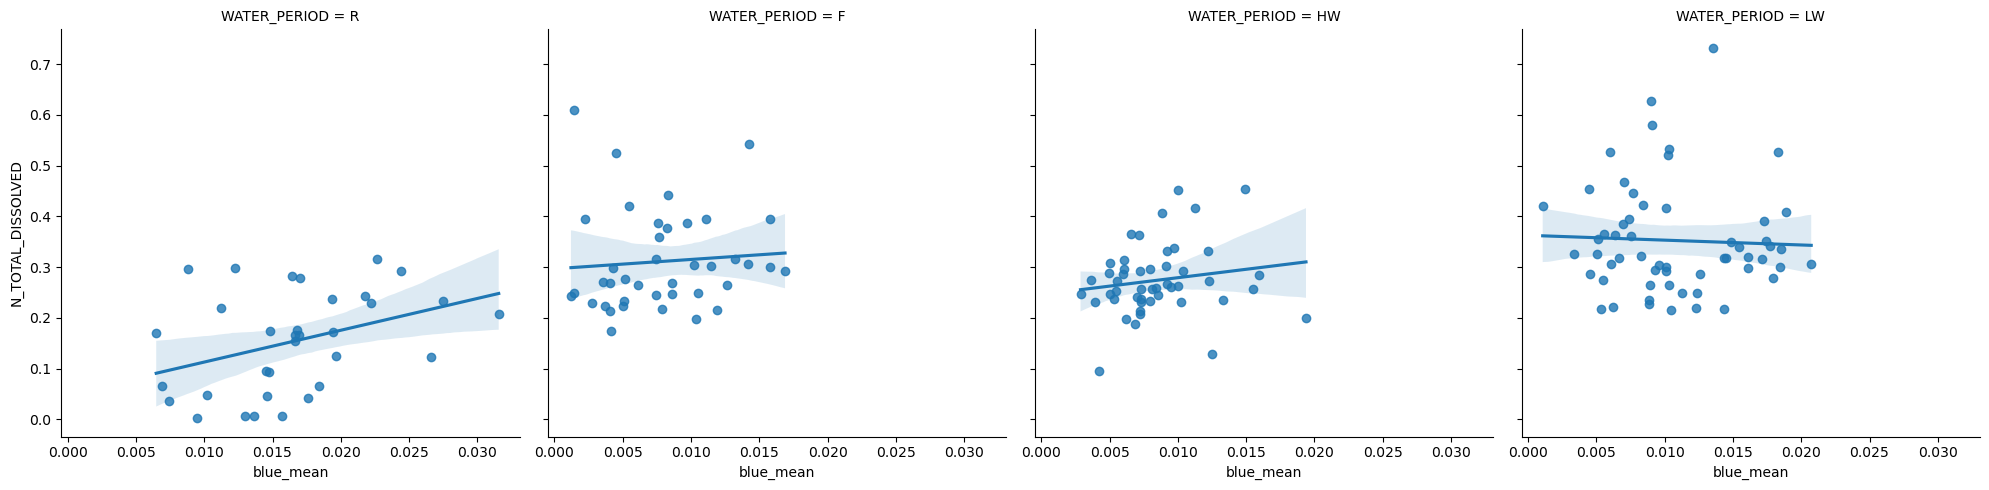

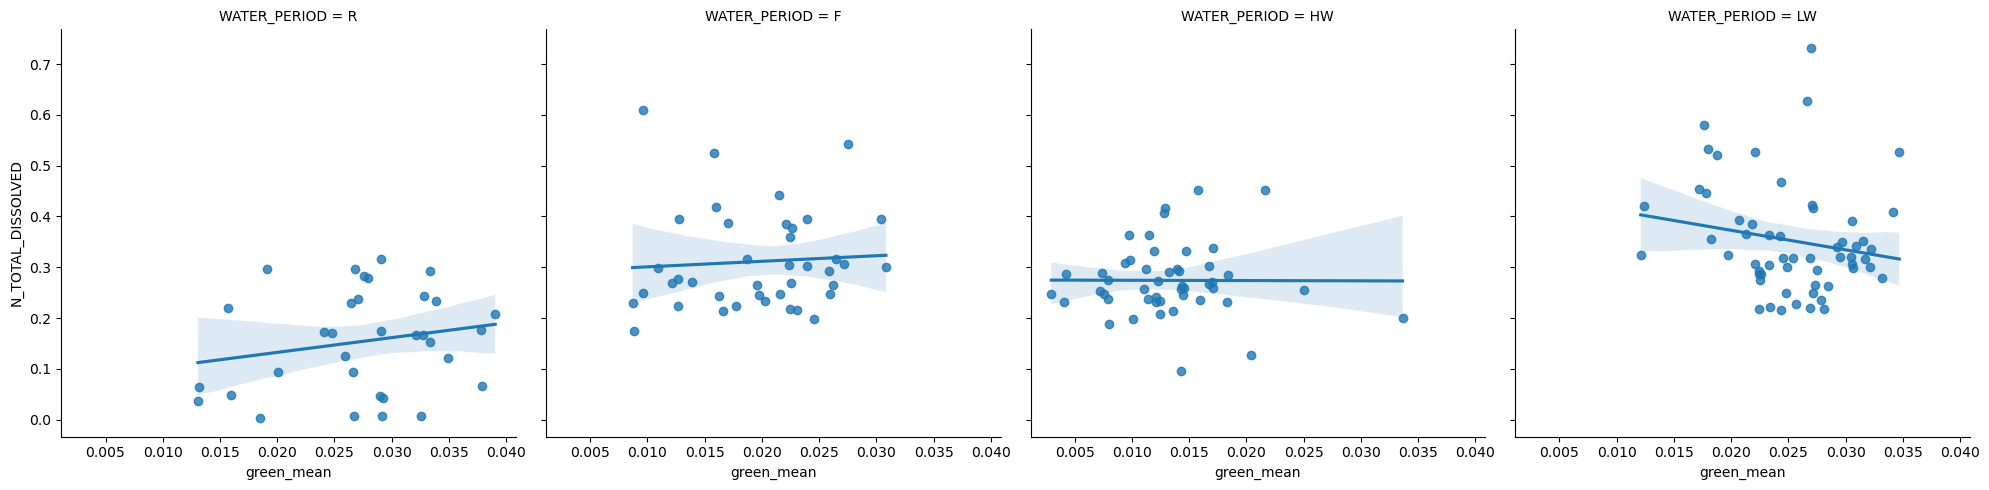

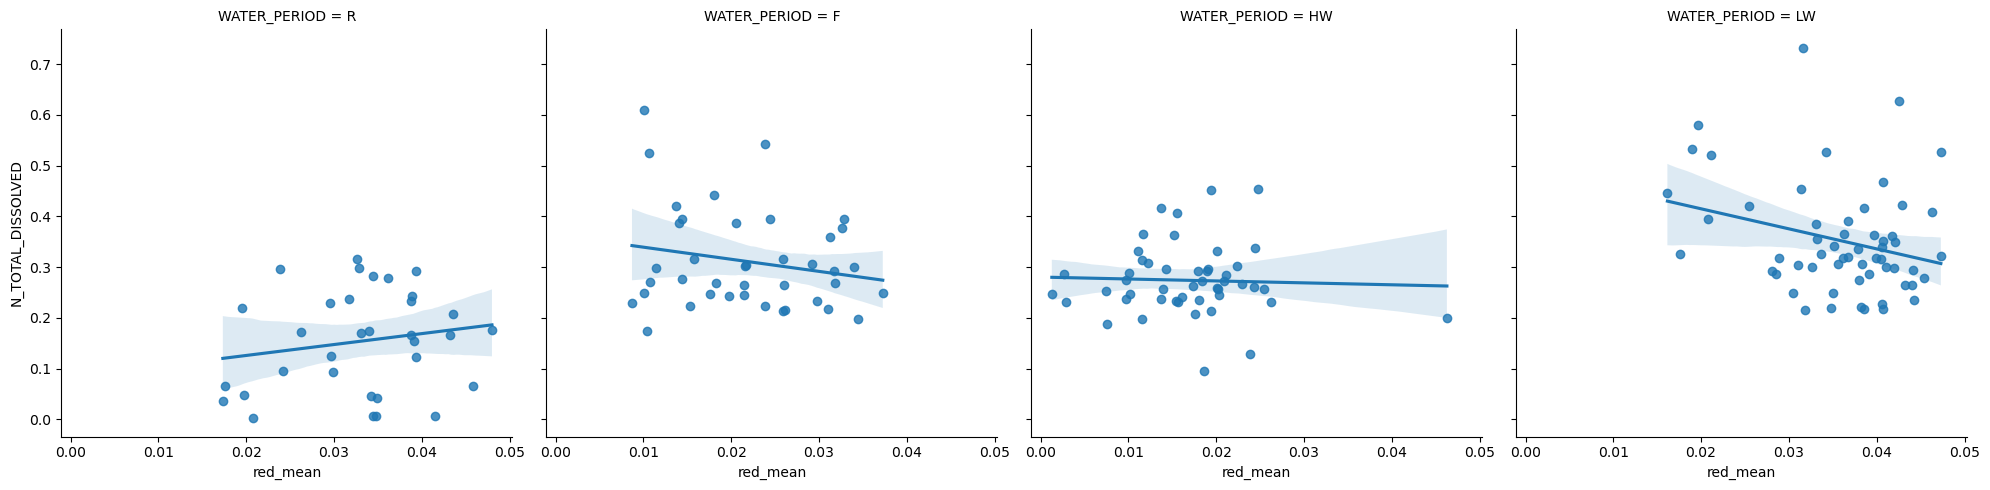

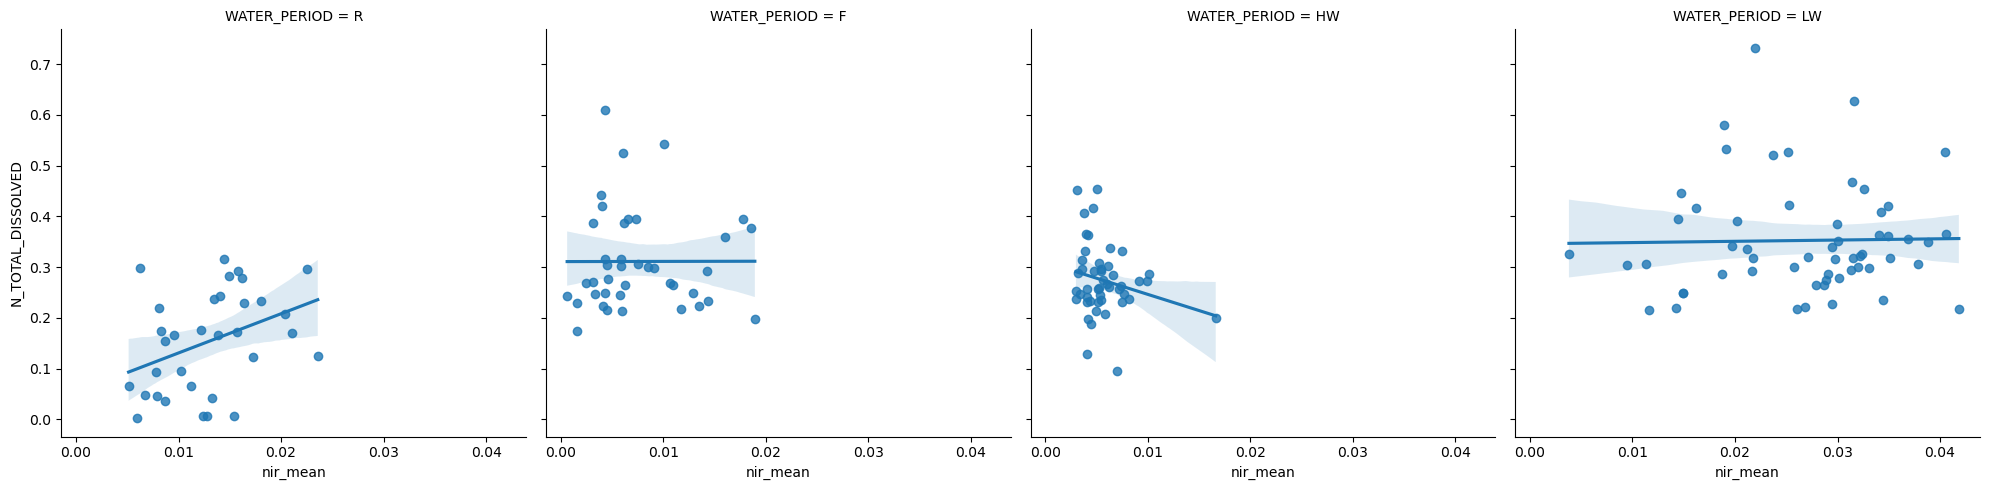

In [111]:
cols = ['N_TOTAL', 'N_TOTAL_DISSOLVED']

for i in cols:
    sns.relplot(data=df_minDate_clean, x="blue_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.relplot(data=df_minDate_clean, x="green_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.relplot(data=df_minDate_clean, x="red_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.relplot(data=df_minDate_clean, x="nir_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.lmplot(data=df_minDate_clean, x="blue_mean", y=i,order=1, col="WATER_PERIOD")
    sns.lmplot(data=df_minDate_clean, x="green_mean", y=i,order=1, col="WATER_PERIOD")
    sns.lmplot(data=df_minDate_clean, x="red_mean", y=i,order=1, col="WATER_PERIOD")
    sns.lmplot(data=df_minDate_clean, x="nir_mean", y=i,order=1, col="WATER_PERIOD")

# Fósforo

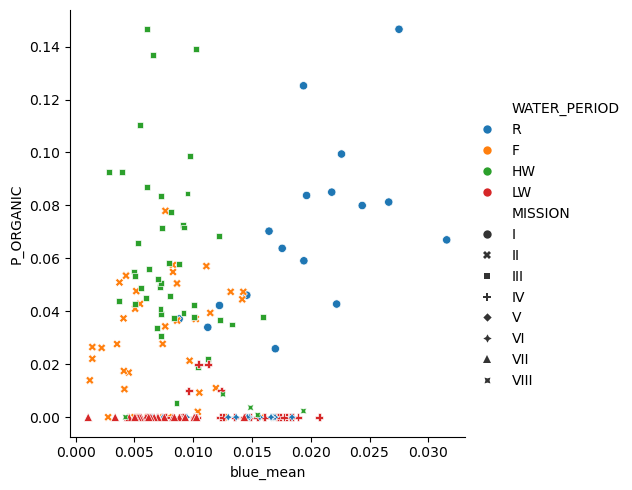

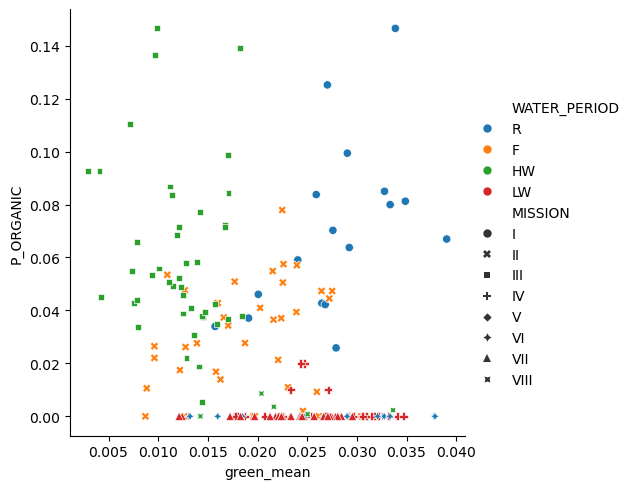

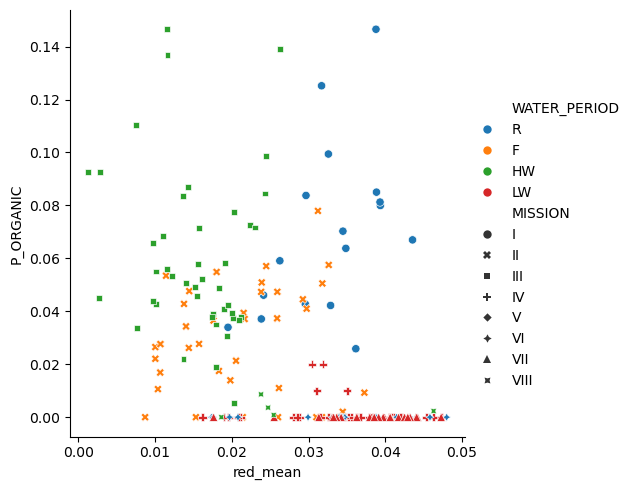

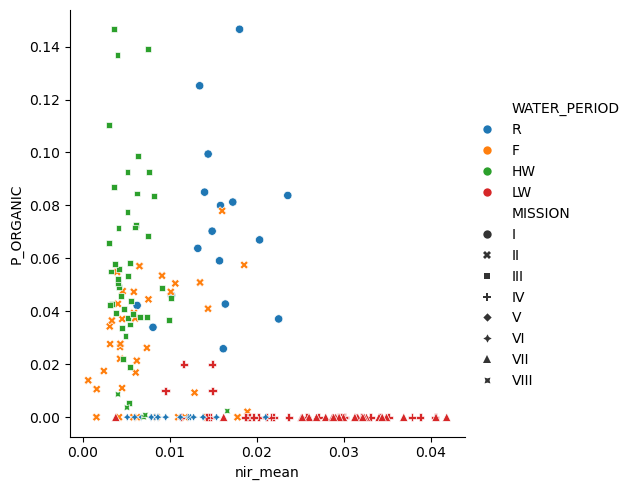

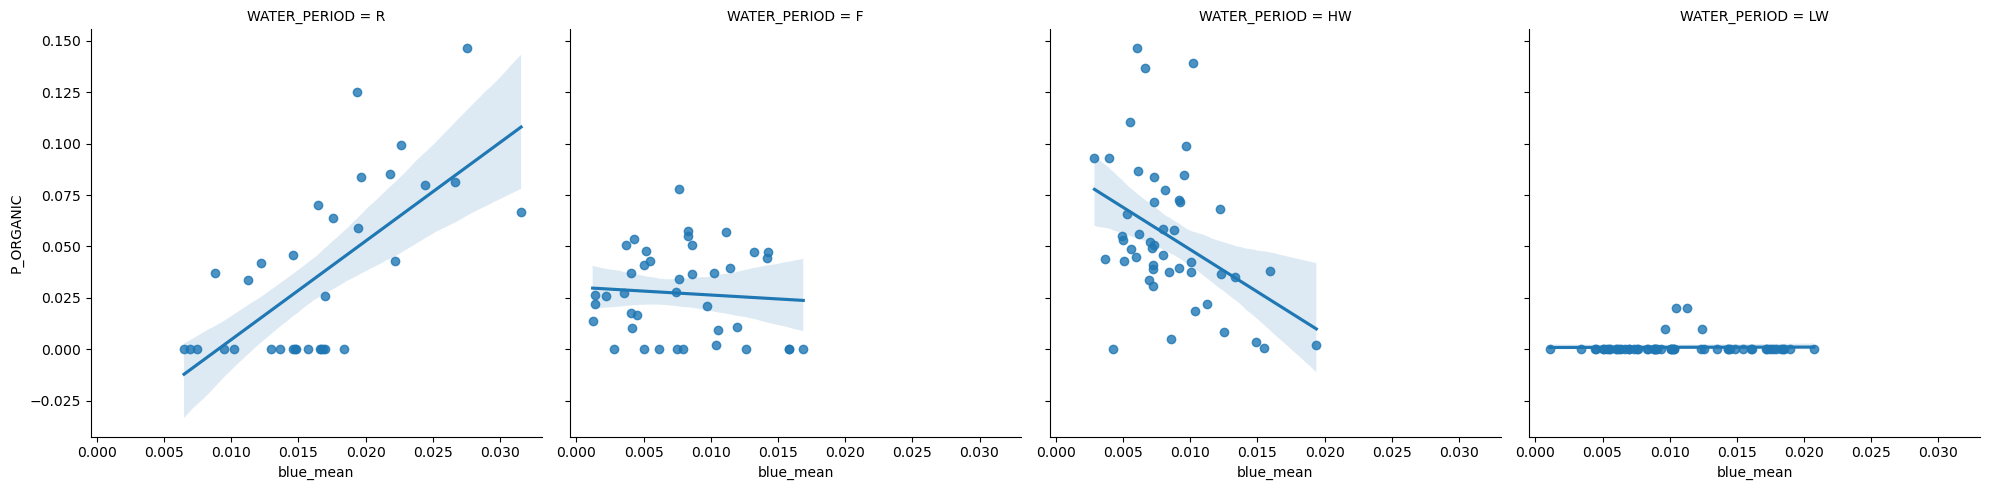

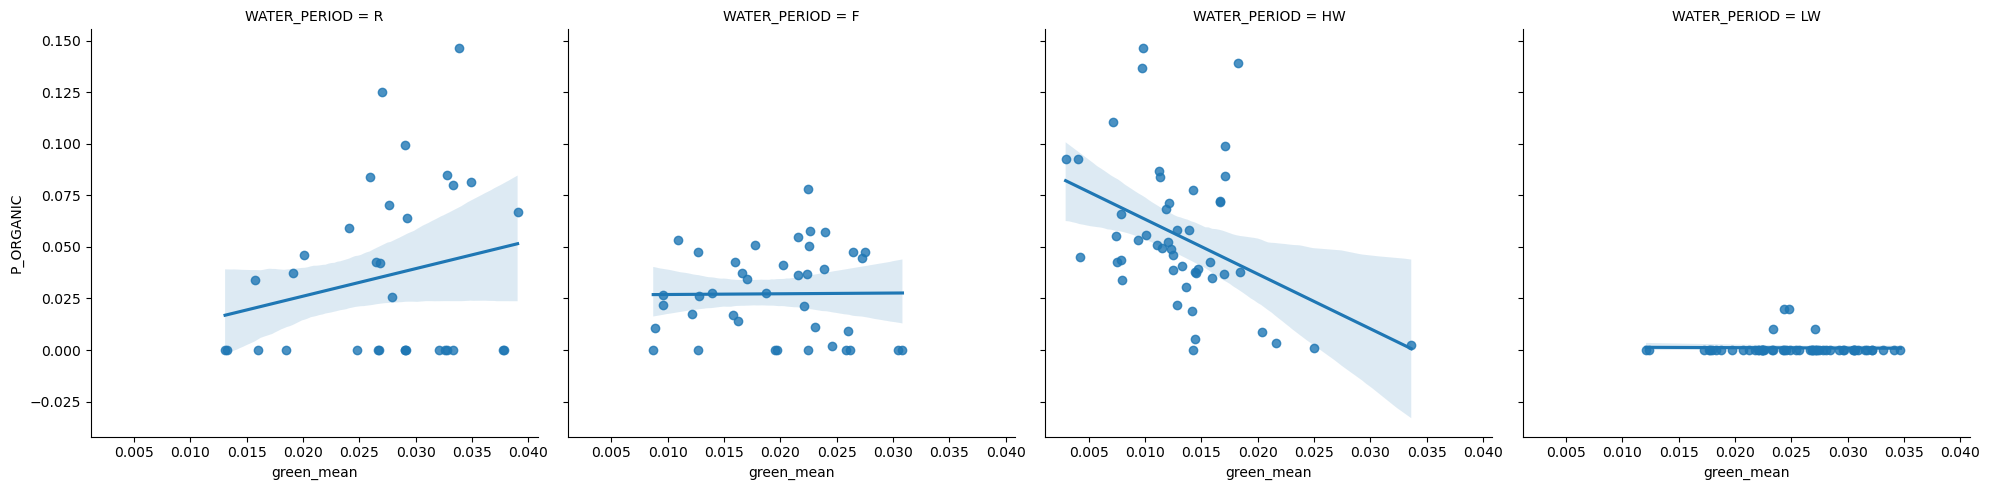

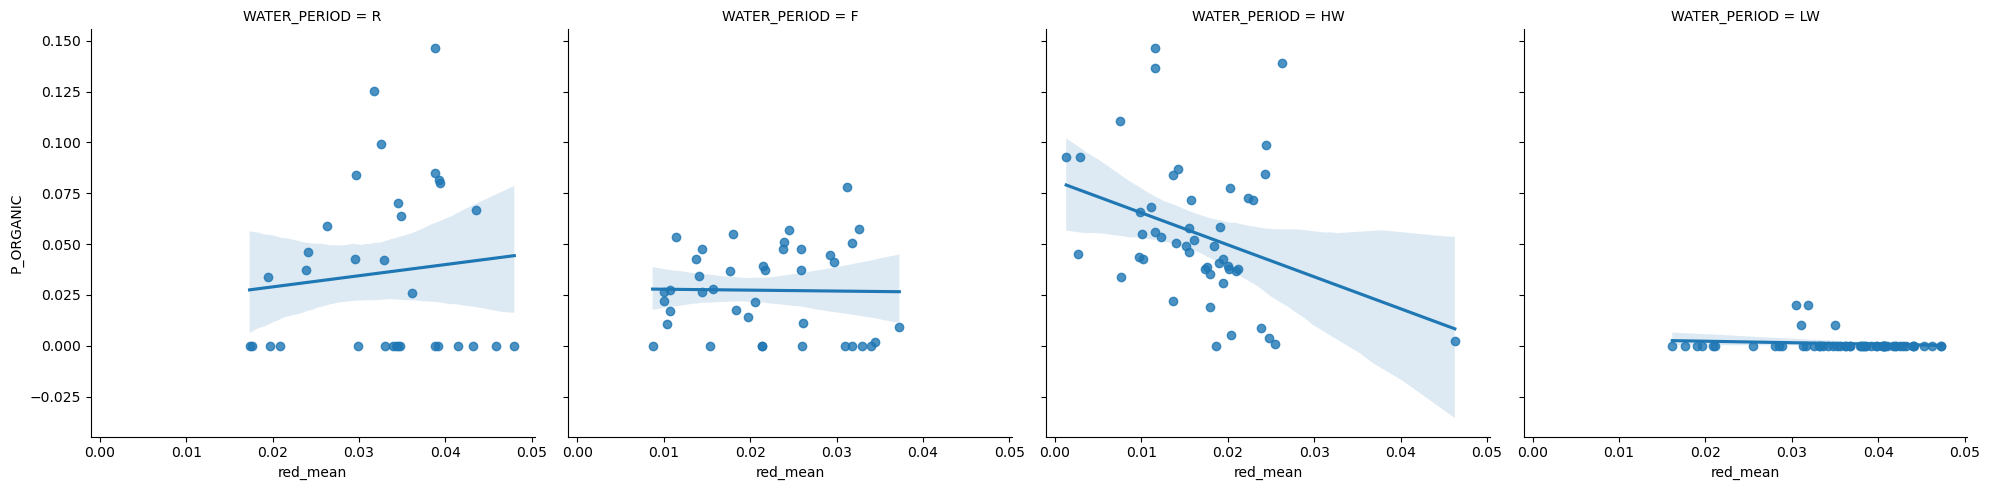

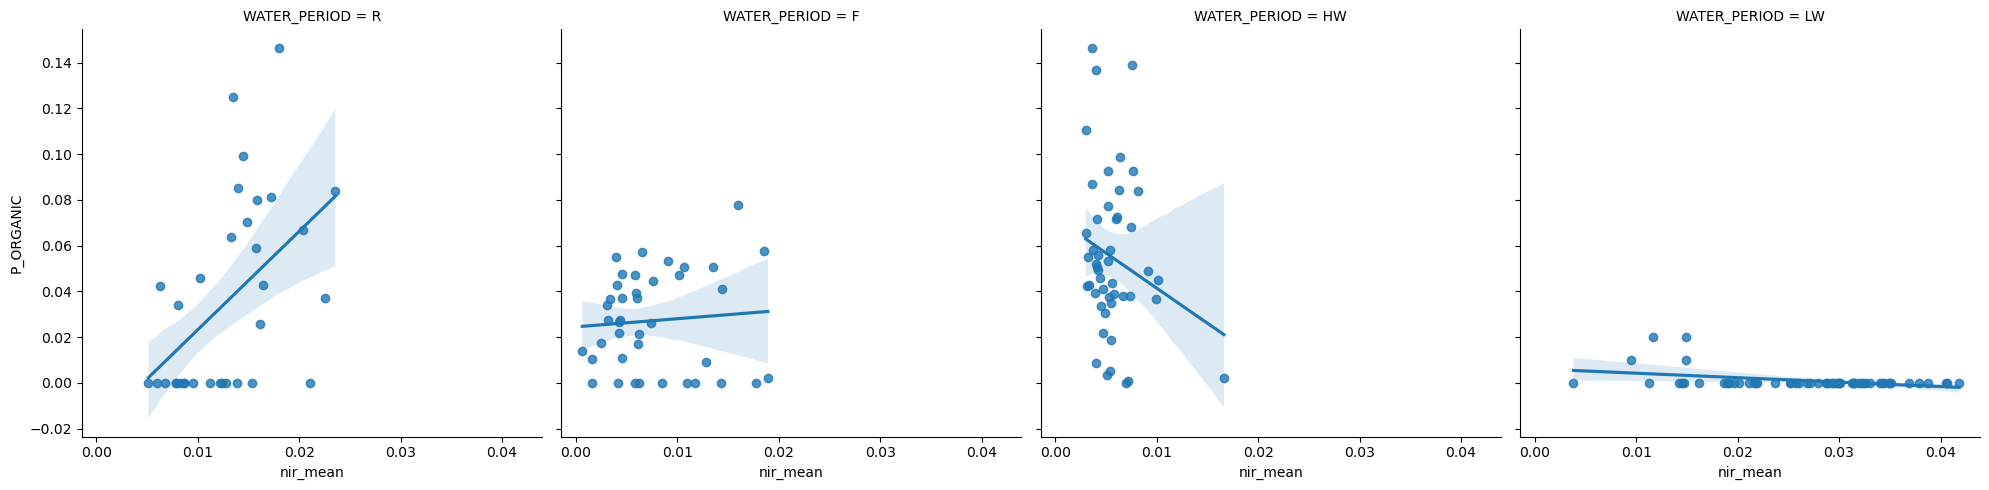

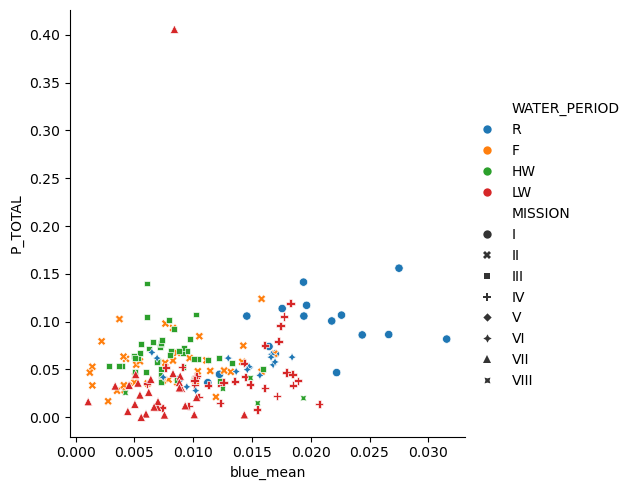

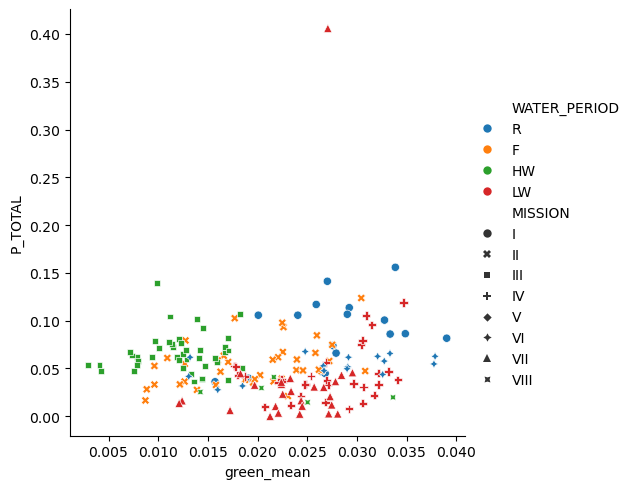

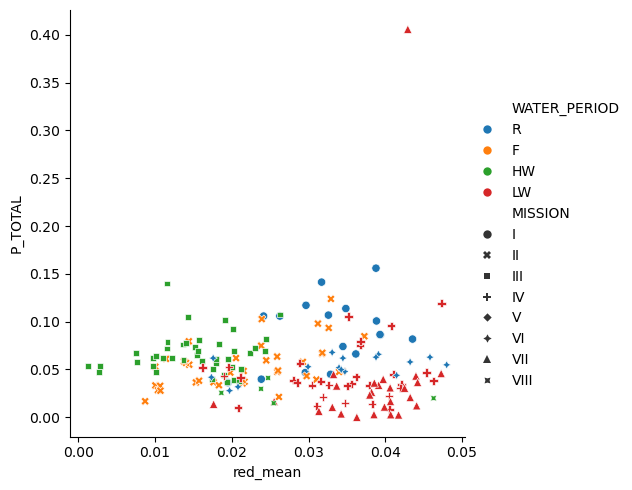

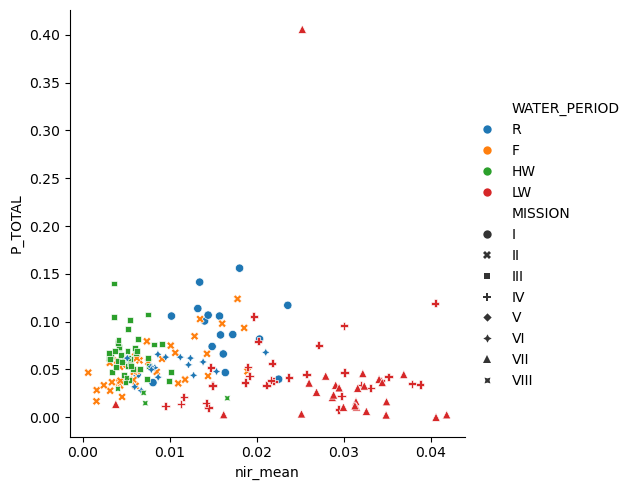

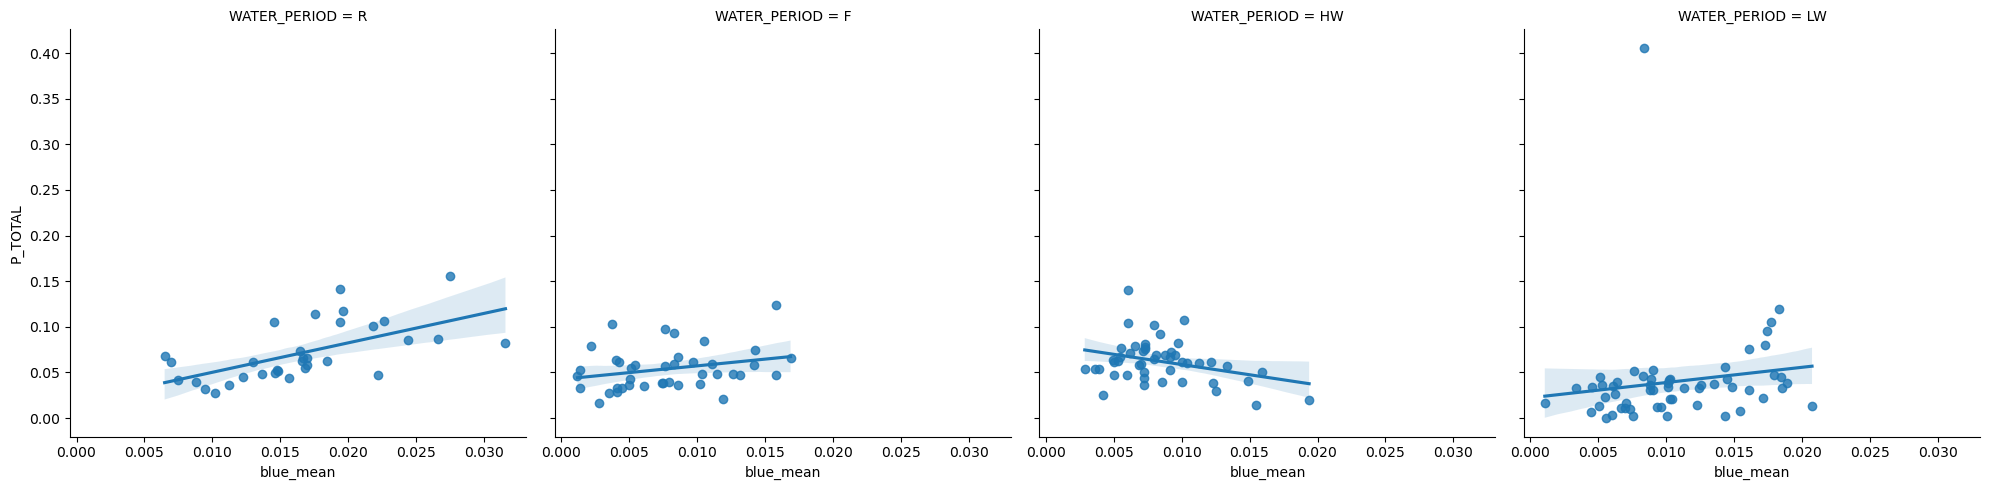

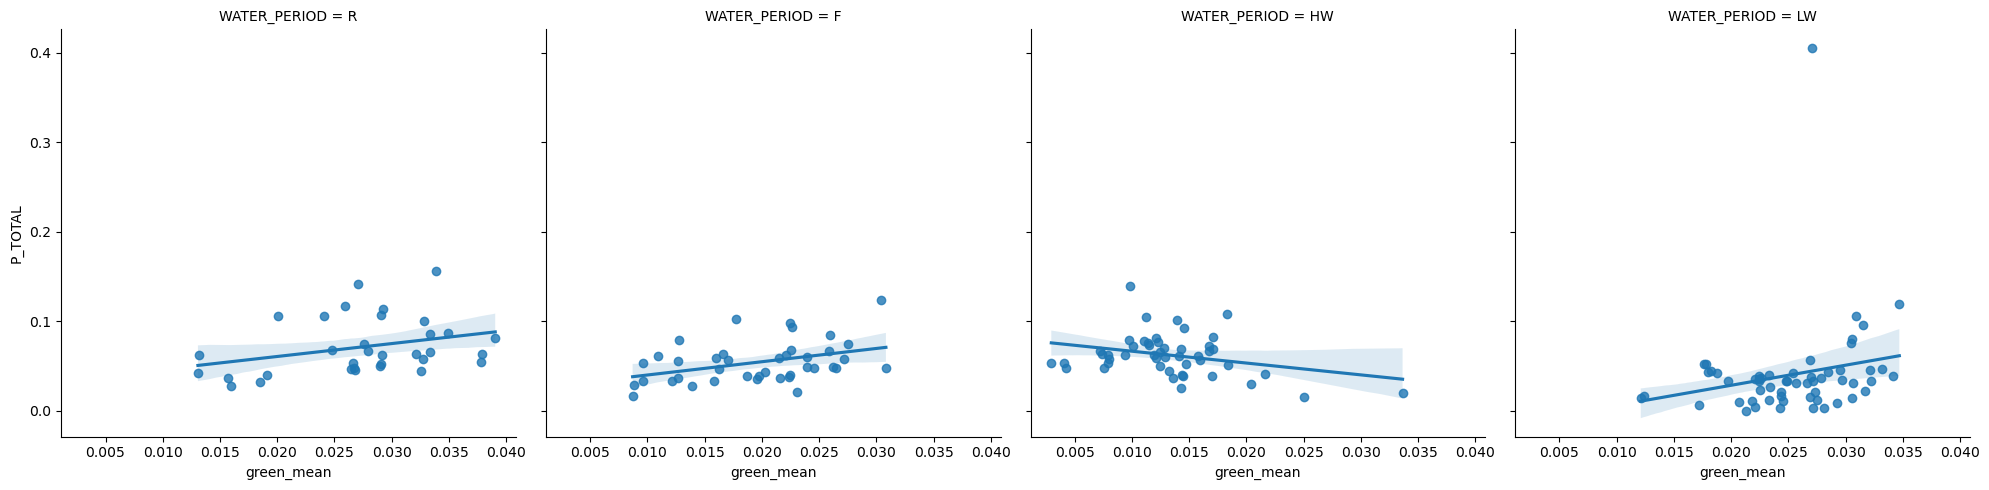

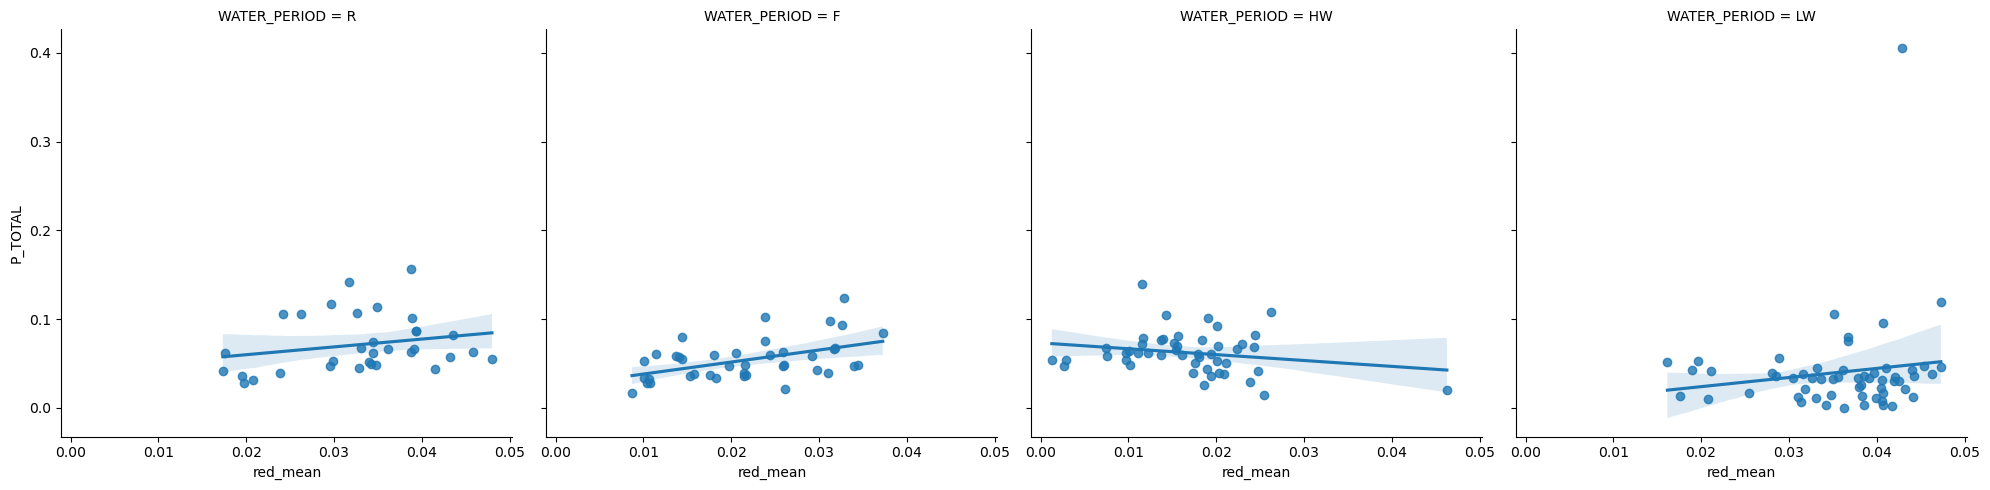

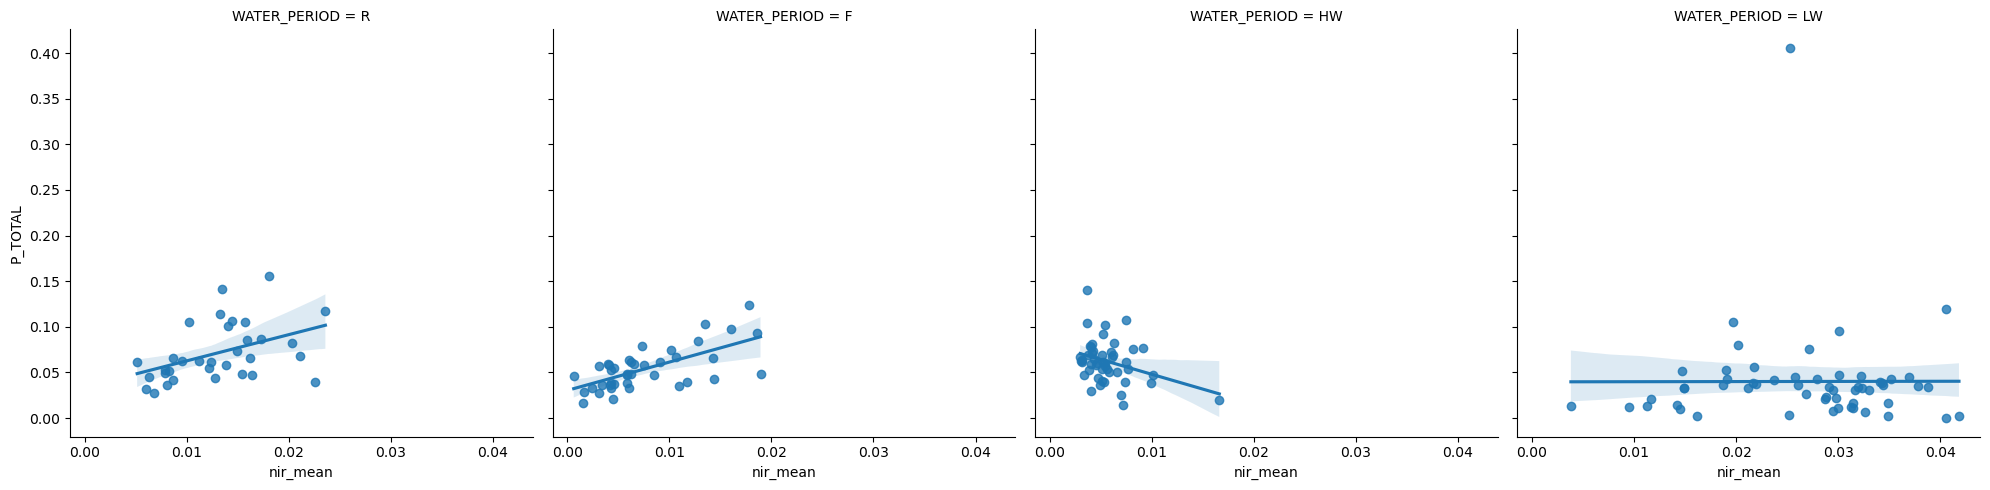

In [112]:
cols = ['P_ORGANIC','P_TOTAL']

for i in cols:
    sns.relplot(data=df_minDate_clean, x="blue_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.relplot(data=df_minDate_clean, x="green_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.relplot(data=df_minDate_clean, x="red_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.relplot(data=df_minDate_clean, x="nir_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.lmplot(data=df_minDate_clean, x="blue_mean", y=i,order=1, col="WATER_PERIOD")
    sns.lmplot(data=df_minDate_clean, x="green_mean", y=i,order=1, col="WATER_PERIOD")
    sns.lmplot(data=df_minDate_clean, x="red_mean", y=i,order=1, col="WATER_PERIOD")
    sns.lmplot(data=df_minDate_clean, x="nir_mean", y=i,order=1, col="WATER_PERIOD")

# Silica e Turbidez

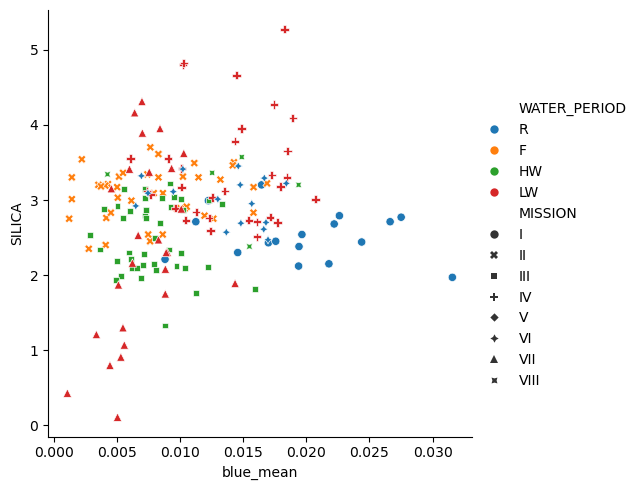

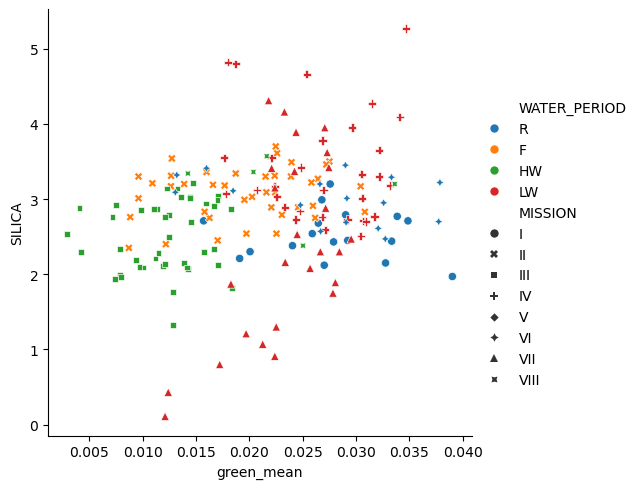

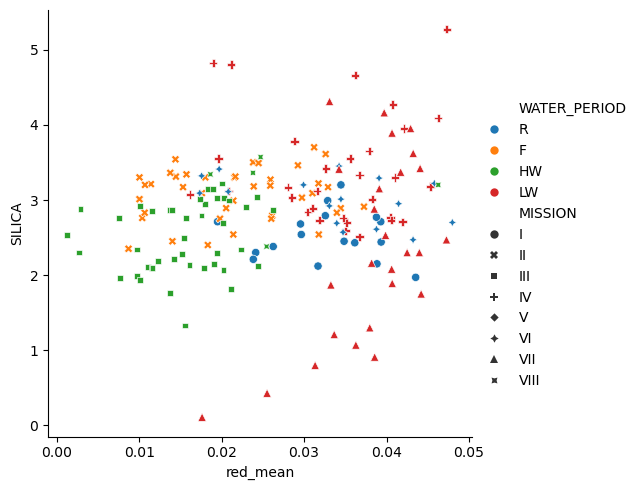

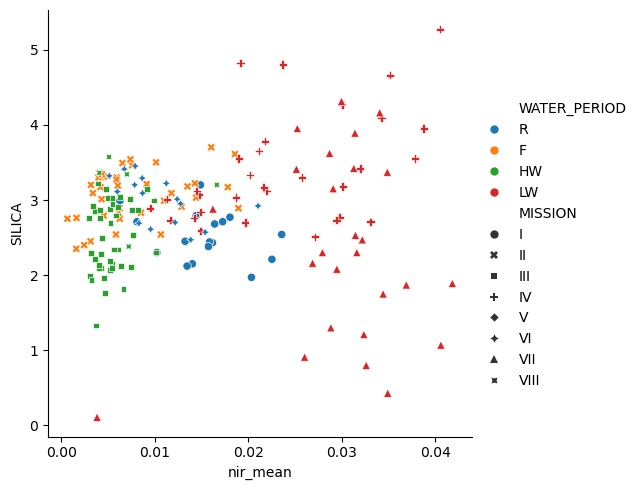

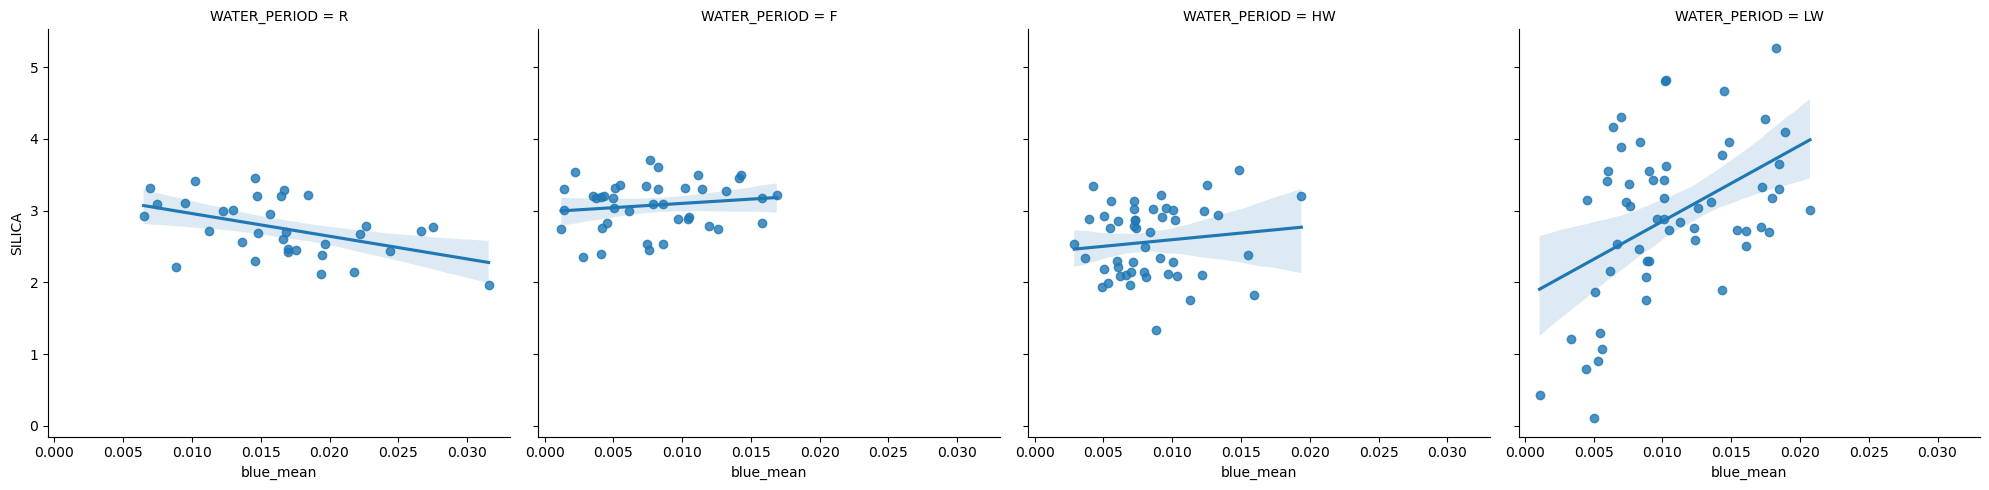

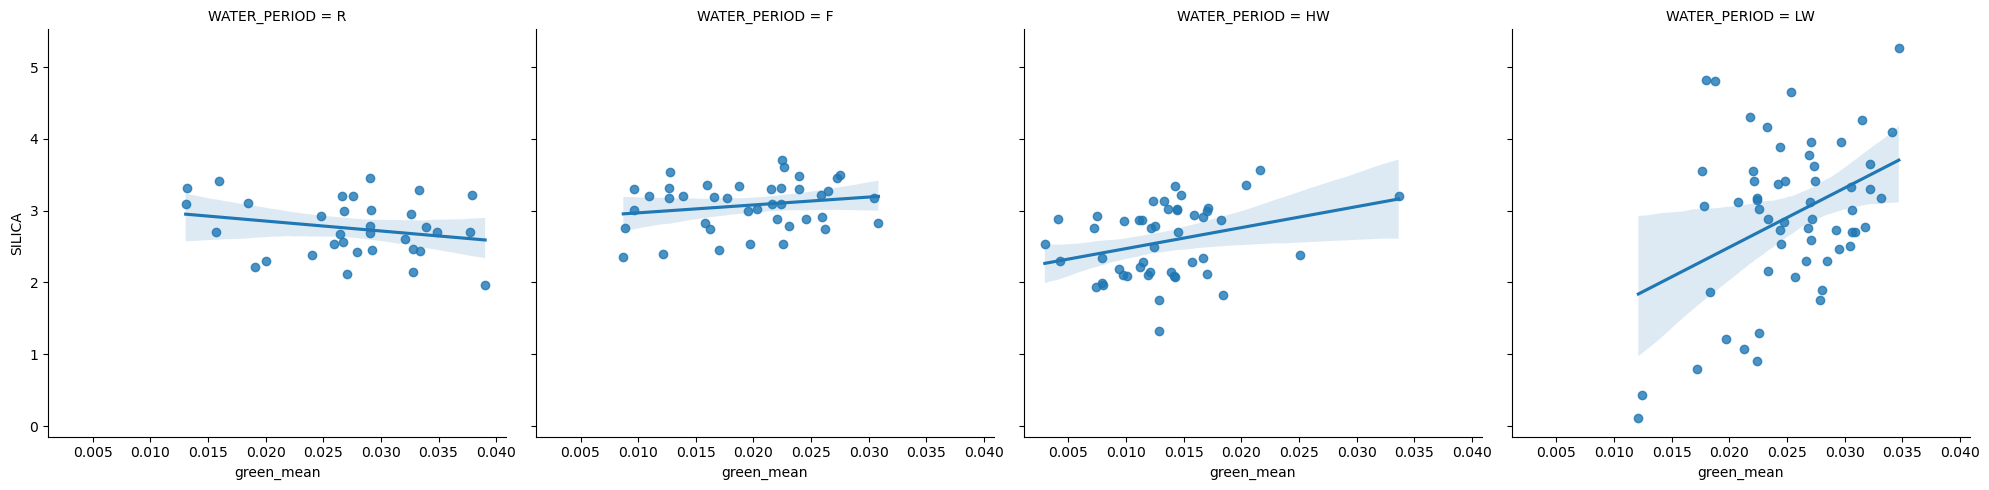

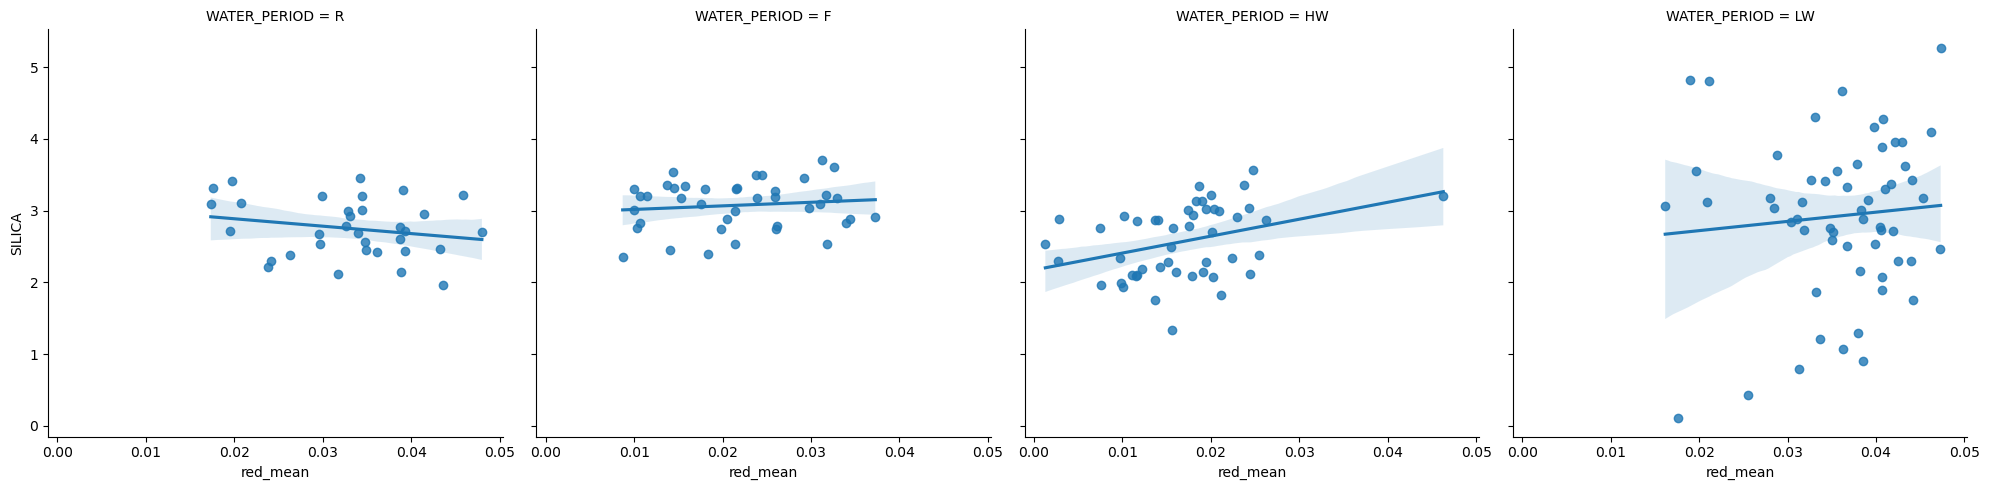

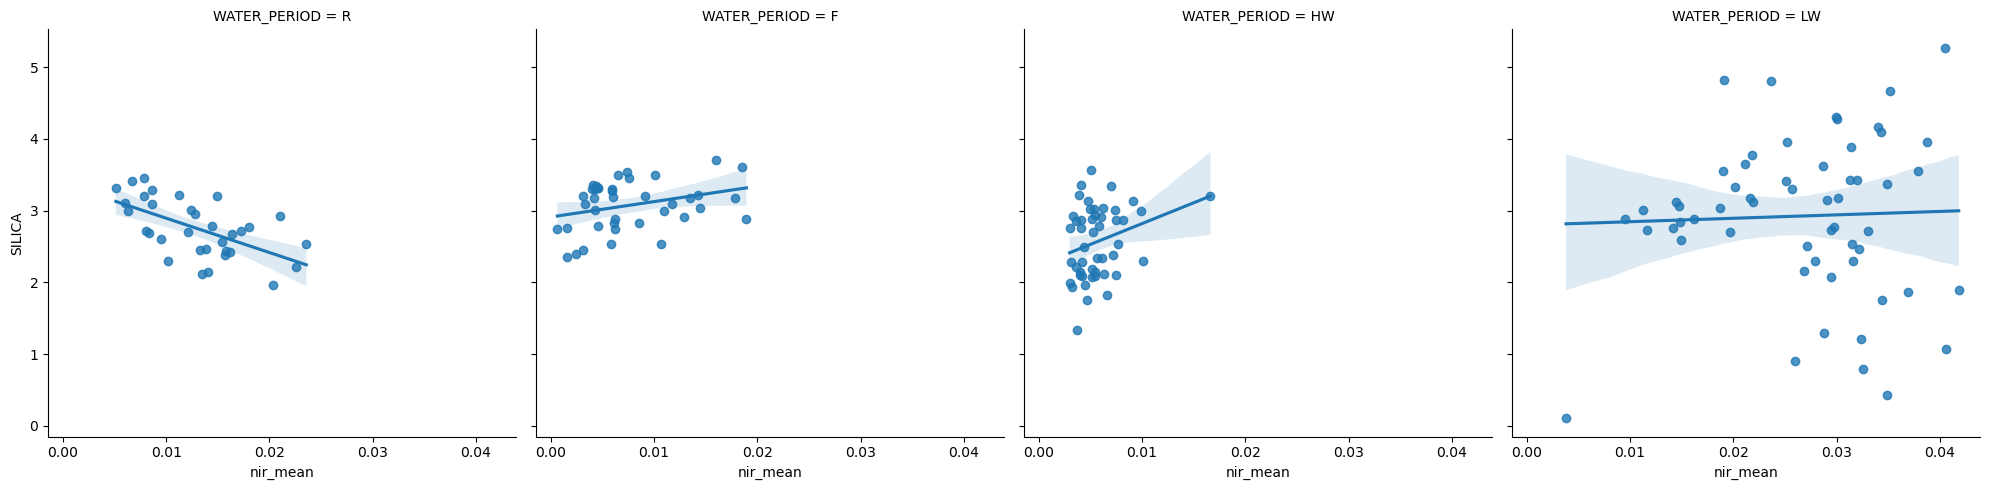

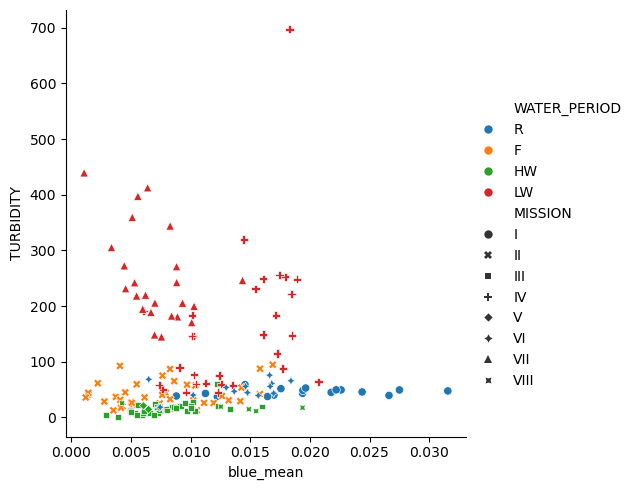

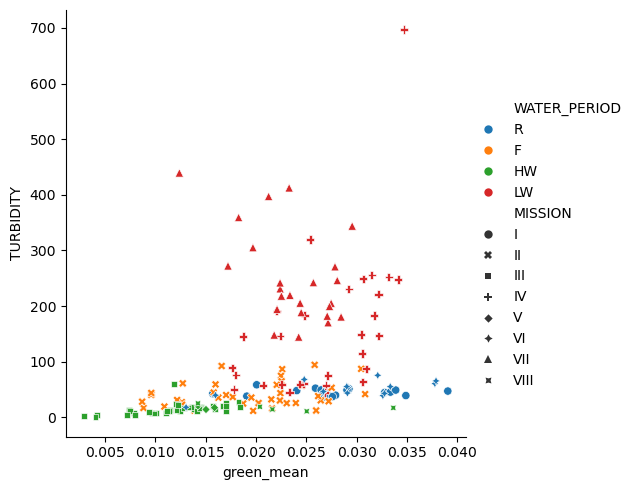

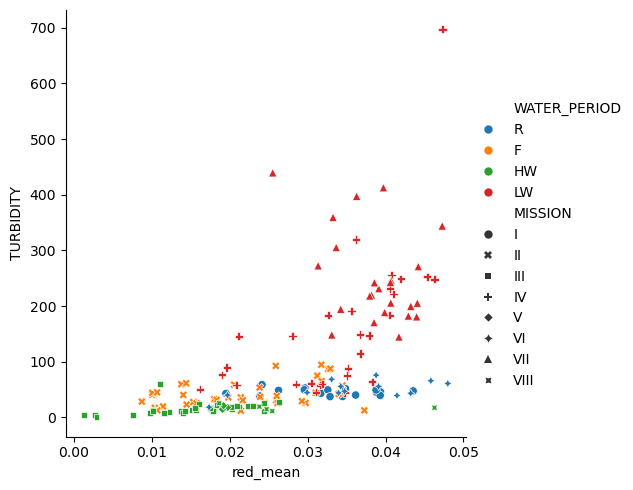

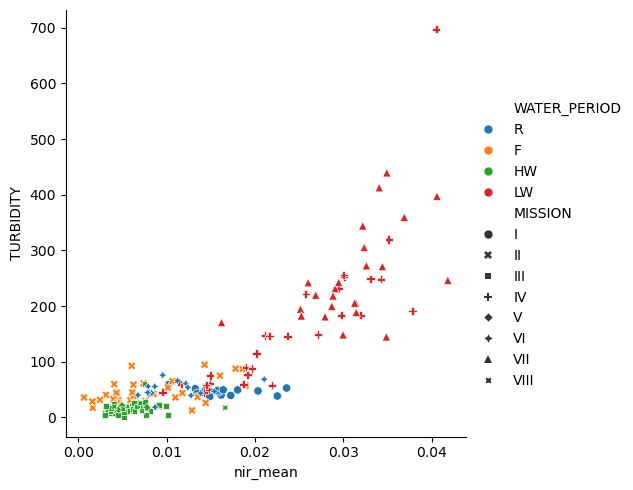

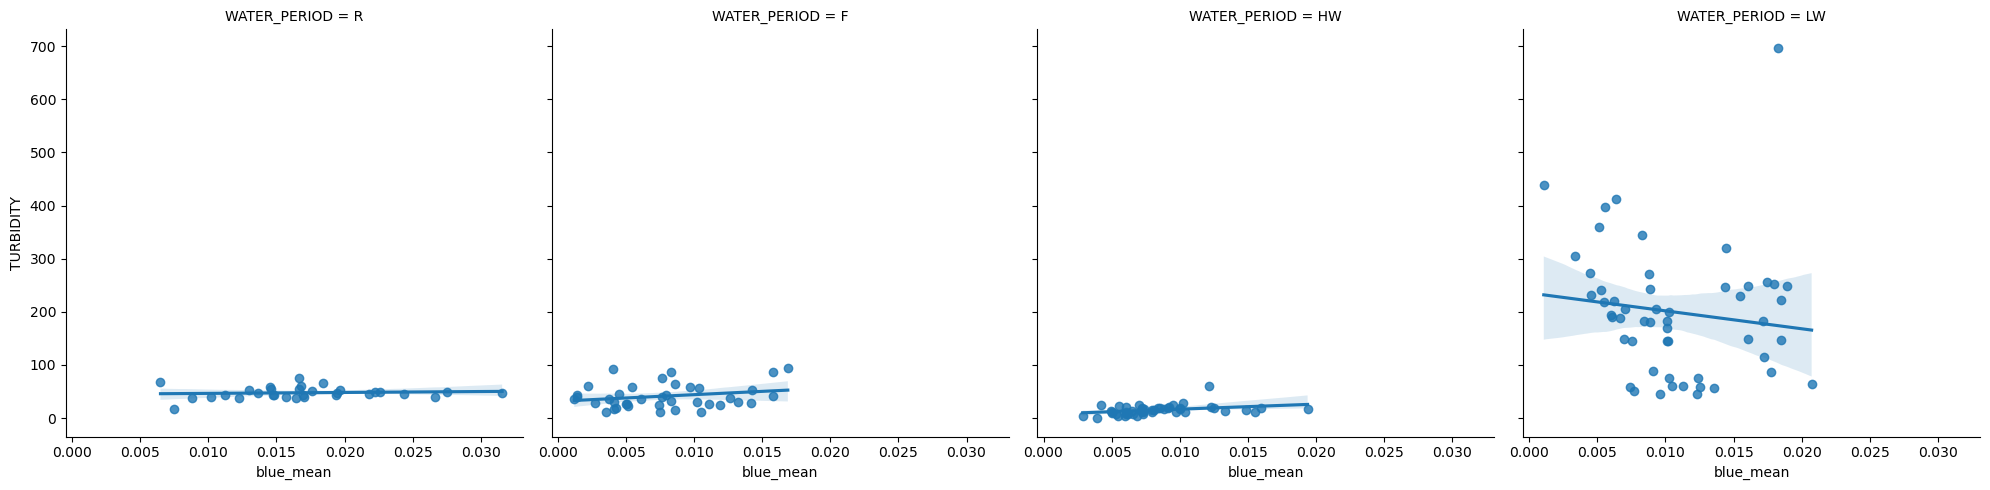

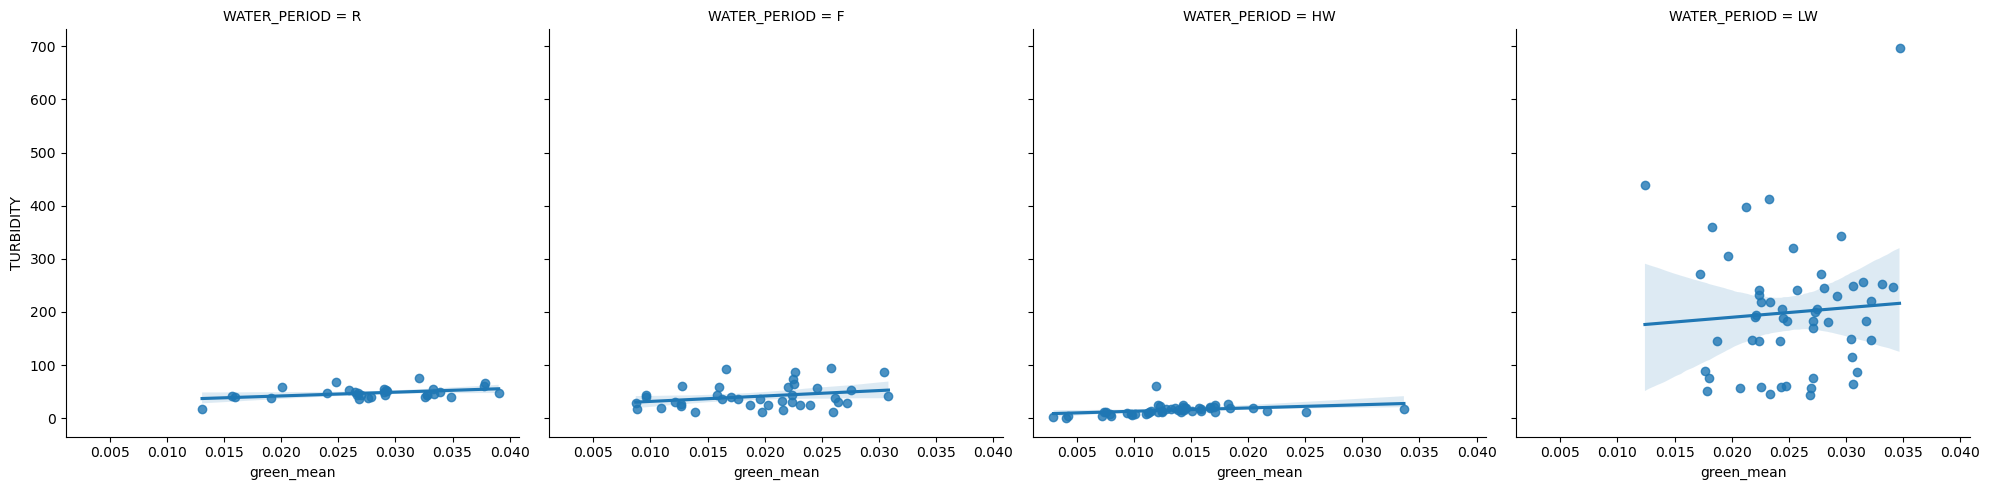

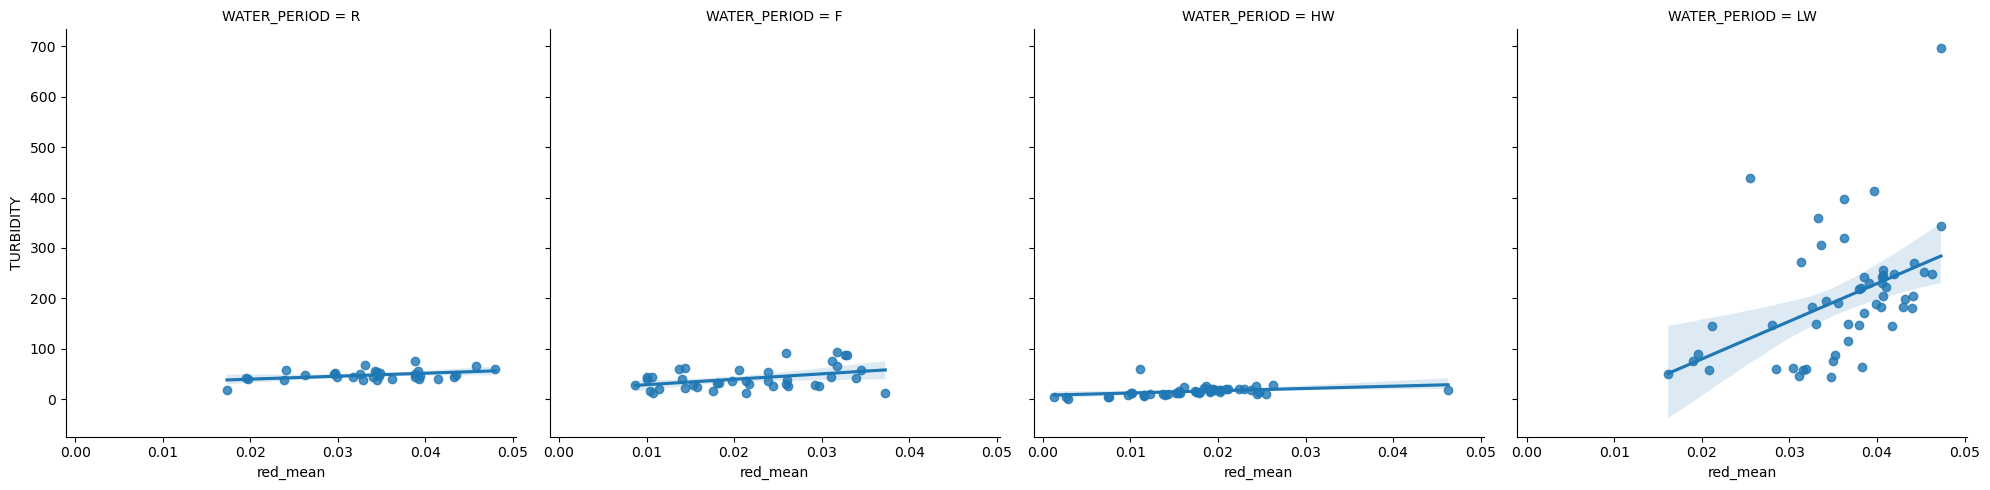

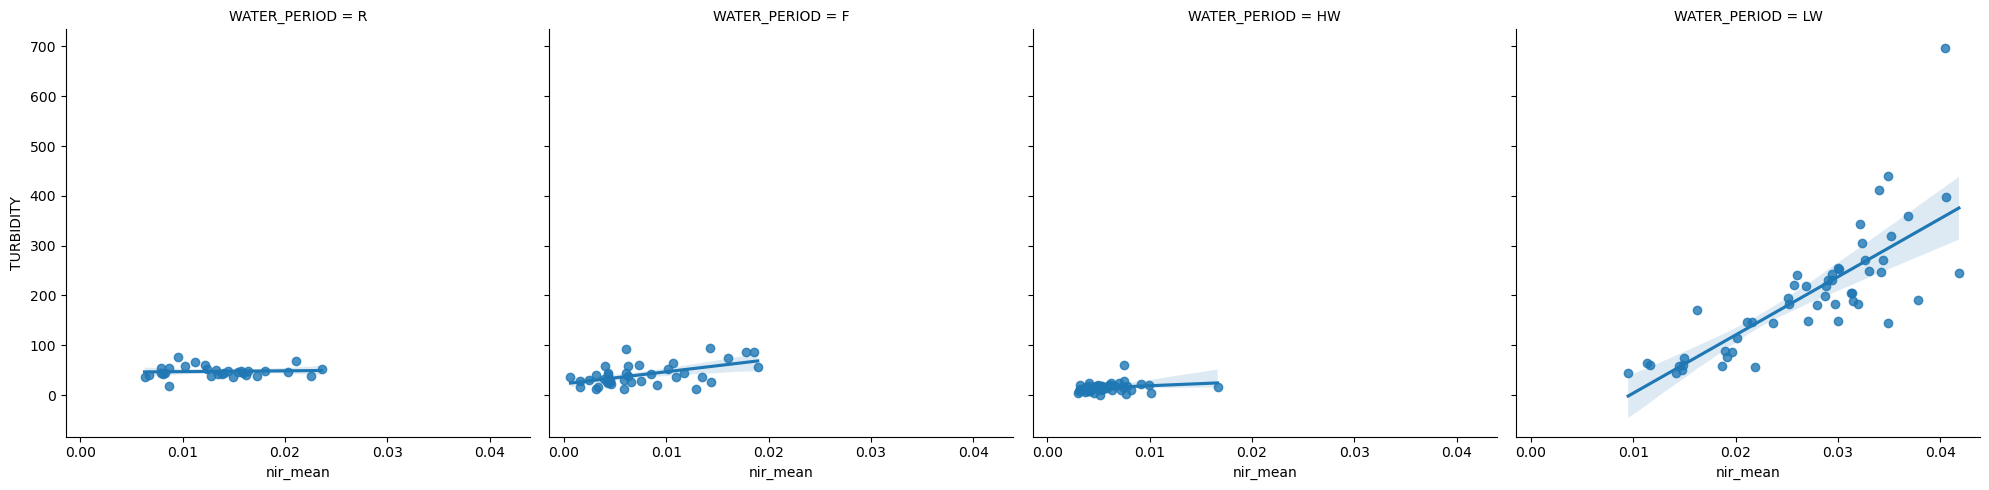

In [113]:
cols = ['SILICA','TURBIDITY']

for i in cols:
    sns.relplot(data=df_minDate_clean, x="blue_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.relplot(data=df_minDate_clean, x="green_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.relplot(data=df_minDate_clean, x="red_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.relplot(data=df_minDate_clean, x="nir_mean", y=i, hue="WATER_PERIOD", style='MISSION')
    sns.lmplot(data=df_minDate_clean, x="blue_mean", y=i,order=1, col="WATER_PERIOD")
    sns.lmplot(data=df_minDate_clean, x="green_mean", y=i,order=1, col="WATER_PERIOD")
    sns.lmplot(data=df_minDate_clean, x="red_mean", y=i,order=1, col="WATER_PERIOD")
    sns.lmplot(data=df_minDate_clean, x="nir_mean", y=i,order=1, col="WATER_PERIOD")